# **Previsão da Potência Gerada em Parques Eólicos no Brasil**


**Nome:** Gabriel Sant'Clair Alves dos Santos

**Orientadora:** Janaína Santanna Gomide

---
### **Resumo**
* **Objetivo**: previsão da potência média diária usando modelos de Machine Learning

* **Dados de entrada**: 
  * Potência gerada nos parques em análise - *diária*
  * Velocidade do vento - *diária*
  * Direção do vento - *diária*
  * Rajada máxima do vento - *diária*
  * Umidade relativa do ar - *diária*
  * Temperatura do ar (bulbo seco) - *diária*
  * Pressão atmosférica ao nível da estação - *diária*

* **Métodos**:
  * Regressão Linear (RL)
  * Márquinas de Vetores de Suporte (SVR)
  * Rede Neural Artificial (RNA)
  * **OBS:** treinamento para diferentes alternativas de dados de entradas, um modelo para cada parque


Para a execução desse trabalho foram usados outros códigos complementares, com o objetivo de obter as médias diárias dos dados citados acima - assim como o desvio padrão diário das medidas mencionadas. 

# 0) Bibliotecas

In [5]:
# importando o pandas para mexer com DataFrames - pq lidam melhor com quantidades grandes de dados
import pandas as pd

# pra plotar gráficos
import matplotlib.pyplot as plt


# biblioteca matemática e um pouco mais
import numpy as np

# MLPRegressor para gerar as redes neurais
from sklearn.neural_network import MLPRegressor

# 
from sklearn.pipeline import FeatureUnion

# para preencher dados ausentes nos dados do DataFrame e indicar que tinha dado ausente
from sklearn.impute import SimpleImputer, MissingIndicator

# para normalizar os dados - algoritmo converja mais rápido
from sklearn.preprocessing import MinMaxScaler

# para dividir os dados que serão usados em `teste` e `treino`
from sklearn.model_selection import train_test_split

# nem cheguei a usar, mas também serve para gerar a rede neural
# import tensorflow as tf
# from tensorflow import keras

# métricas utilizadas para avaliar o quão bem o modelo obtido (rede neural) performou com os dados
# coeficiente de determinação
from sklearn.metrics import r2_score
# Erro Absoluto Médio - MAE
from sklearn.metrics import mean_absolute_error
# Erro Médio Quadrático - MSE
from sklearn.metrics import mean_squared_error

# `datetime` para saber o dia em que estou rodando os códigos
from datetime import datetime

# `openpyxl` para gerar os arquivos excel com os resultados
from openpyxl import Workbook
from openpyxl import load_workbook

# Para saber quanto tempo demora pra rodar um modelo....
import time as tm

# Para editar os arquivos Excel mudando a cor da fonte, tamanho, preenchimento da célula, borda...
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font

# Para Regressão Linear
from sklearn.linear_model import LinearRegression

# Para Árvore de Decisão para Regressão
from sklearn.tree import DecisionTreeRegressor

# Importando sistema operacional
import os

# Validação progressiva
from sklearn.model_selection import TimeSeriesSplit

# Transormar número em letra - e.g.: 1 -> A; 10 -> J
from openpyxl.utils import get_column_letter


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score

from sklearn.ensemble import ExtraTreesClassifier


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

**<font color='red'>Obs:** Foram importados **todos** os dados meterológicos e de potência para justificar os números apresentados na metodologia do Trabalho de Conclusão de Curso: *PREVISÃO DA POTÊNCIA GERADA EM PARQUES EÓLICOS DO BRASIL UTILIZANDO APRENDIZADO DE MÁQUINA*

# 1) Dados de potência


Importando os dados de potência gerada nos parques eólicos considerados. Foram importadas as médias diárias de potência gerada para cada parque contemplado na presente análise, além dos desvios padrões, apesar de **não** utilizados. Foram considerados, **inicialmente**, os seguintes Parques Eólicos:



In [6]:
# Parques considerados inicialmente
Parques=['MINUANO I',
         'VERACE 34',
         'CAETITE C',
         'VERACE VIII',
         'VERACE 5',
         'CAETITE B',
         'MINUANO II',
         'VERACE 35',
         'CHUI IX',
         'EOL DELTA 3 07',
         'EOL DELTA 3 02',
         'VERACE III',
         'VERACE II',
         'ENACEL',
         'VERACE VI',
         'VERACE IX',
         'VERACE 36',
         'CAETITE A',
         'EOL DELTA 3 06',
         'SERAIMA',
         'VERACE I',
         'ELEBRAS CIDREIRA 1',
         'VERACE 31',
         'VERACE 30',
         'QUIXABA',
         'CHUI V',
         'EOL DELTA 3 05',
         'CHUI IV',
         'CHUI II',
         'VERACE 29',
         'CHUI I',
         'PINDAI',
         'VERACE 10',
         'USRNLANCHI',
         'CAETITE 1',
         'VERACE VII',
         'VERACE 27',
         'LICINIO DE ALMEIDA',
         'DELTA 3 VIII',
         'EOL DELTA 3 03',
         'CANDIBA',
         'VERACE 28',
         'VERACE IV',
         'VERACE 26',
         'GUIRAPA',
         'OSORIO 3',
         'VERACE 25',
         'REB CASSINO 1 2LFA',
         'REB CASSINO 3 2LFA',
         'REB CASSINO 2 2LFA',
         'VERACE 24',
         'CAETITE 2',
         'EOL DELTA 3 IV',
         'OSORIO 2',
         'RIACHAO VI',
         'EOL DELTA 3 01',
         'AMETISTA',
         'VITORIA',
         'SERRA DO SALTO',
         'TANQUE 3LER',
         'BONS VENTOS',
         'MIASSABA 3',
         'GUANAMBI',
         'MARON',
         'INDIOS',
         'V DO NORDESTE 3LER',
         'LAGOA DO MATO',
         'SANGRADOURO',
         'SANTO CRISTO',
         'MORRAO',
         'OSORIO',
         'RIO VERDE',
         'EOL SAO RAIMUNDO',
         'CAETITE 3',
         'ALVORADA',
         'VENTOS DO SAO PAULO',
         'PAJEU DO VENTO',
         'COELHOS III',
         'MATARACA',
         'SANTO INACIO III',
         'PRESIDENTE',
         'COELHOS IV',
         'ATLANTICA',
         'CAMURIM',
         'COELHOS I',
         'SANGRADOURO III',
         'CARAVELA',
         'MANGUE SECO 5',
         'ALBATROZ',
         'COELHOS II',
         'Santo Inácio IV',
         'EOL SAO JOAO',
         'SANGRADOURO II',
         'PLANALTI',
         'INDIOS 2',
         'VENT DA ST ESPERANCA',
         'INDIOS 3',
         'EOL GARROTE',
         'CARNAUBAS',
         'MILLENNIUM',
         'ARIZONA 1',
         'MIASSABA 2',
         'RIO DO FOGO',
         'CORRUPIAO',
         'B COQUEIROS (ENERG)',
         'ANGICAL',
         'ALEGRIA II',
         'DA PRATA',
         'VENTOS DA STA DULCE',
         'REDUTO',
         'EOL TIANGUA',
         'XAVANTE POMBOS',
         'VENTO FORMOSO',
         'EMILIANA',
         'VENTOS DE SAO ABRAAO',
         'MANGUE SECO 3',
         'ALEGRIA I',
         'TAMANDUA MIRIM',
         'EOL MORRO DO CHAPEU',
         'CRISTALANDIA III']

In [7]:
len(Parques)

120

In [8]:
# O nome dos parques nos arquivos excel não tem espaço, só underline
for i in range(0,len(Parques)):
    Parques[i] = Parques[i].replace(' ','_')

# caminhos no PC
caminho = 'C:/Users/Gabriel/Downloads/UFRJ/IC/2- Dados/2- Potencia/3- Geral/3- Reduzidos/'

# Criando dicionário com dados de potência
Dados_Potencia = {}

# criando DataFrames para cada dado importado
for parque in Parques:
    caminho_completo = caminho+parque+'_reduzido.xlsx'
    aux = pd.read_excel(caminho_completo, sheet_name='Sheet', header=0, usecols="F,G")
    Dados_Potencia[parque] = aux

# Renomeando as colunas para que fiquem menores, muitas colunas eu nem importei (informação irrelevante)
for parque in Parques:
    Dados_Potencia[parque] = Dados_Potencia[parque].rename(columns={'Geração no Centro de Gravidade - MW médios (Gp,j) - MWh':'Potência','Sigla Parcela - Usina':'Usina','std':'Potência_Std'})

In [9]:
Dados_Potencia['CAETITE_C'].tail()

,Dia,Potência
1546,2022-03-27,64.590136
1547,2022-03-28,117.496698
1548,2022-03-29,97.243902
1549,2022-03-30,56.727779
1550,2022-03-31,107.297098


Dados importados do dia **01/01/2018** ao dia **30/06/2021** (considerando base de dados completa).


*   **1551 dias** = 365 + 365 + 366 (bissexto) + 365 + 90




In [10]:
# Checando pra ver se todos os parques têm o mesmo tamanho - no caso 1551
controle = True
for i in range(0,len(Parques)):
    if Dados_Potencia[Parques[i]].shape[0] != 1551:
        controle = False
        if len(Parques[i])<6:
            print(Parques[i]+': \t\t\t\t'+str(Dados_Potencia[Parques[i]].shape))
        elif len(Parques[i])<14:
            print(Parques[i]+': \t\t\t'+str(Dados_Potencia[Parques[i]].shape))
        else:
            print(Parques[i]+':  \t\t'+str(Dados_Potencia[Parques[i]].shape))
if controle:
    print("Tudo ok")

Tudo ok


# 2) Dados das estações meteorológicas

Importando os dados das estações meteorológicas automáticas e convencionais próximas aos parques em análise:


*   **82596_H** 
*   **83096_H** 
*   **83184_H** 
*   **83997_H** 
*   **A218_H** 
*   **A317_H** 
*   **A318_H** 
*   **A352_H** 
*   **A368_H** 
*   **A409_H** 
*   **A426_H** 
*   **A433_H** 
*   **A802_H** 
*   **A834_H** 
*   **A899_H** 

Para prever a potência os dados de entrada considerados foram:

*   **Pressão atmosférica** *diária média* (ao nível da estação) - **com desvio padrão**
*   **Temperatura do ar** *diária média* (bulbo seco) - **com desvio padrão**
*   **Umidade relativa do ar** *média diária* - **com desvio padrão**
*   **Direção do vento** *média diária* - **com desvio padrão**
*   **Rajada máxima de vento** *média diária* - **com desvio padrão** <font color='red'>**(somente presente para estações automáticas)**</font>
*   **Velocidade do vento** *média diária* - **com desvio padrão**

**<font color='red'>OBS: a depender do modelo utilizado nem todos os dados de entrada foram considerados.</font>**

Outros dados obtidos **não** foram considerados como **dados de entrada**. Como a Altitude da estação em análise, que poderia ser utilizada caso se fosse ser aplicada a ideia de `transfer learning`.

In [11]:
Todas_Estacoes = ['82594_H',
                  '82596_H',
                  '82691_H',
                  '82897_H',
                  '83096_H',
                  '83184_H',
                  '83339_H',
                  '83994_H',
                  '83997_H',
                  'A218_H',
                  'A317_H',
                  'A318_H',
                  'A344_H',
                  'A352_H',
                  'A368_H',
                  'A409_H',
                  'A426_H',
                  'A433_H',
                  'A802_H',
                  'A834_H',
                  'A899_H']

In [12]:
len(Todas_Estacoes)

21

Tendo em vista que a estação **82491_H** não possuia dados, a mesma não foi considerada em momento algum.

In [13]:
# caminhos no meu Drive e criando DataFrames para cada dado importado
caminho = 'C:/Users/Gabriel/Downloads/UFRJ/IC/2- Dados/3- Vento/2- Reduzidos/'

Dados_Vento = {}

# criando DataFrames para cada dado importado
for estacao in Todas_Estacoes:
    if 'A' in estacao:
        caminho_completo = caminho+estacao+'_reduzido.xlsx'
        aux = pd.read_excel(caminho_completo, sheet_name='Sheet', index_col=0, header=0, usecols="A,C,D,E,F,G,H,I,J,K,L,M,N")
        Dados_Vento[estacao] = aux
    else:
        # caso estação convencional, não havia a presença de dados da rajada máxima horária
        caminho_completo = caminho+estacao+'_reduzido.xlsx'
        aux = pd.read_excel(caminho_completo, sheet_name='Sheet', index_col=0, header=0, usecols="A,C,D,E,F,G,H,I,J,K,L")
        Dados_Vento[estacao] = aux

# Renomeando as colunas para que fiquem menores, muitas colunas eu nem importei (informação irrelevante)
for estacao in Todas_Estacoes:
    Dados_Vento[estacao] = Dados_Vento[estacao].rename(columns={'Data Medicao':'Dia','Hora Medicao':'Hora','PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)':'Pressão Atm','TEMPERATURA DO AR - BULBO SECO, HORARIA(Â°C)':'Temp, bs','VENTO, DIRECAO HORARIA (gr)(Â° (gr))':'Vent Dir','VENTO, VELOCIDADE HORARIA(m/s)':'Vento','UMIDADE RELATIVA DO AR, HORARIA(%)':'Umidade','VENTO, RAJADA MAXIMA(m/s)':'Rajada'})
    if "A" not in estacao:
        Dados_Vento[estacao] = Dados_Vento[estacao].rename(columns={'VENTO, DIRECAO HORARIA(codigo)':'Vent Dir'})

In [14]:
Dados_Vento['82596_H'].head()

,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Vento,std_vent
Data Medicao,,,,,,,,,,
2018-01-01,1004.6,0.0,25.6,0.0,93.0,0.0,14.0,0.0,0.8,0.0
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
Dados_Vento['A426_H'].head()

,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent
Data Medicao,,,,,,,,,,,,
2018-01-01,949.114286,1.759136,29.100000,3.260587,47.000000,9.899495,129.333333,51.205778,5.414286,1.763731,2.433333,0.948851
2018-01-02,947.552381,1.093974,27.942857,2.409618,55.238095,10.004307,194.857143,108.169305,4.514286,2.467172,1.933333,1.154838
2018-01-03,948.152632,0.759063,26.057895,2.341910,66.473684,9.224501,115.894737,83.043993,3.957895,3.196432,1.647368,1.498198
2018-01-04,950.326087,1.353327,25.856522,2.613980,70.913043,14.799862,220.782609,95.490021,3.734783,1.247470,1.552174,0.609254
2018-01-05,951.495652,1.367473,27.121739,3.320550,54.434783,14.306660,100.217391,95.554199,5.934783,2.267274,2.630435,1.232331


In [16]:
Dados_Vento[estacao].shape[0]

1551

Verificando se todas as estações possuem **1551** dados diários, para as caraceterísticas a serem consideradas. **Obs:** nesse momento não estamos diferenciando dados `Null` de dados "reais"

In [17]:
print("Acima de 1000 dados: \n")
for estacao in Todas_Estacoes:
    if Dados_Vento[estacao].shape[0] >= 1000:
        data_inicio = Dados_Vento[estacao].index.values[0]
        data_inicio = pd.to_datetime(str(data_inicio))
        data_fim = Dados_Vento[estacao].index.values[Dados_Vento[estacao].shape[0]-1]
        data_fim = pd.to_datetime(str(data_fim))
        print(estacao+': '+str(Dados_Vento[estacao].shape)+'\t'+data_inicio.strftime('%d/%m/%Y')+
              '\t'+data_fim.strftime('%d/%m/%Y'))

print("\n\nCom menos de 1000 dados: \n")
for estacao in Todas_Estacoes:
    if Dados_Vento[estacao].shape[0] < 1000:
        data_inicio = Dados_Vento[estacao].index.values[0]
        data_inicio = pd.to_datetime(str(data_inicio))
        data_fim = Dados_Vento[estacao].index.values[Dados_Vento[estacao].shape[0]-1]
        data_fim = pd.to_datetime(str(data_fim))
        print(estacao+': '+str(Dados_Vento[estacao].shape)+'\t'+data_inicio.strftime('%d/%m/%Y')+
              '\t'+data_fim.strftime('%d/%m/%Y'))

Acima de 1000 dados: 

82596_H: (1551, 10)	01/01/2018	31/03/2022
82897_H: (1551, 10)	01/01/2018	31/03/2022
83096_H: (1096, 10)	01/01/2018	31/12/2020
83184_H: (1551, 10)	01/01/2018	31/03/2022
83994_H: (1551, 10)	01/01/2018	31/03/2022
83997_H: (1551, 10)	01/01/2018	31/03/2022
A218_H: (1551, 12)	01/01/2018	31/03/2022
A317_H: (1551, 12)	01/01/2018	31/03/2022
A318_H: (1551, 12)	01/01/2018	31/03/2022
A344_H: (1551, 12)	01/01/2018	31/03/2022
A352_H: (1551, 12)	01/01/2018	31/03/2022
A368_H: (1479, 12)	14/03/2018	31/03/2022
A409_H: (1551, 12)	01/01/2018	31/03/2022
A426_H: (1551, 12)	01/01/2018	31/03/2022
A433_H: (1551, 12)	01/01/2018	31/03/2022
A802_H: (1551, 12)	01/01/2018	31/03/2022
A834_H: (1551, 12)	01/01/2018	31/03/2022
A899_H: (1551, 12)	01/01/2018	31/03/2022


Com menos de 1000 dados: 

82594_H: (212, 10)	01/01/2018	31/07/2018
82691_H: (151, 10)	01/01/2018	31/05/2018
83339_H: (577, 10)	01/01/2018	31/07/2019


# 3) Preenchendo dados faltantes

É importante ter o cuidado de saber quantos dados faltantes existem no DataFrame. Para isso vamos ver quantos dados são do tipo **nulo** (`null`) para cada estação meteorológica sob análise. Lembrando que os dados de potência **não** possuem valores faltantes.

Foram definidas as `Estações de Interesse` como aquelas citadas na **Tabela 5** do Trabalho de Conclusão de Curso: *PREVISÃO DA POTÊNCIA GERADA EM PARQUES EÓLICOS DO BRASIL UTILIZANDO APRENDIZADO DE MÁQUINA*

In [18]:
Interesse = ["83184_H",
             "A317_H", "A368_H", "A409_H", "A426_H", "A433_H", "A802_H", "A899_H"]

### QUANTIDADE DE <font color='red'>NULL</font> POR ESTAÇÃO

Contando a quantidade de dados que são <font color='red'> **NULL** </font> para cada estação meteorológica.

In [19]:
# como os dados da estação A433 não possuem valores null, já sabemos que a quantidade total de dados 
# é a quantidade total de dados NÃO nulos dessa estação

Colunas = ["Pressão Atm", "Temp, bs", "Umidade", "Vent Dir", "Vento", "Rajada"]

cabecalho = '\t\t\t'
for j in range(0, len(Colunas)):
    if Colunas[j] == "Vent Dir":
        cabecalho += "V Dir" + '\t\t'
    else:
        cabecalho += Colunas[j][:4] + '\t\t'


print("Estações com bastantes dados...\n")
print(cabecalho)
for estacao in Todas_Estacoes:
    if "A" in estacao:
        frase = ''
        for j in range(0, len(Colunas)):
            qt_1 = Dados_Vento[estacao][Colunas[j]].notnull().sum()
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            x = 100*(qt_2)/(qt_1+qt_2)
            aux = str(round(x))
            if len(aux)<2:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t\t'
            else:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t'

    else:
        frase = ''
        for j in range(0, len(Colunas)-1):
            qt_1 = Dados_Vento[estacao][Colunas[j]].notnull().sum()
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            x = 100*(qt_2)/(qt_1+qt_2)
            aux = str(round(x))
            if len(aux)<2:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t\t'
            else:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t'

    if estacao in Interesse:
        if estacao == '82897_H':
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t\t'+frase)
        else:
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
        

print("\n\nNem tantos dados...\n")
print(cabecalho)
for estacao in Todas_Estacoes:
    if "A" in estacao:
        frase = ''
        for j in range(0, len(Colunas)):
            qt_1 = Dados_Vento[estacao][Colunas[j]].notnull().sum()
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            x = 100*(qt_2)/(qt_1+qt_2)
            aux = str(round(x))
            if len(aux)<2:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t\t'
            else:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t'


    else:
        frase = ''
        for j in range(0, len(Colunas)-1):
            qt_1 = Dados_Vento[estacao][Colunas[j]].notnull().sum()
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            x = 100*(qt_2)/(qt_1+qt_2)
            aux = str(round(x))
            if len(aux)<2:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t\t'
            else:
                frase += str(Dados_Vento[estacao][Colunas[j]].isnull().sum())+' ('+aux+' %)\t'

    if estacao not in Interesse:
        if estacao == '82897_H':
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
        else:
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)

Estações com bastantes dados...

			Pres		Temp		Umid		V Dir		Vent		Raja		
83184_H (1551, 10)	1 (0 %)		1 (0 %)		1 (0 %)		1 (0 %)		1 (0 %)		
A317_H (1551, 12)	554 (36 %)	549 (35 %)	549 (35 %)	549 (35 %)	549 (35 %)	550 (35 %)	
A368_H (1479, 12)	325 (22 %)	325 (22 %)	325 (22 %)	480 (32 %)	480 (32 %)	479 (32 %)	
A409_H (1551, 12)	118 (8 %)		118 (8 %)		421 (27 %)	118 (8 %)		118 (8 %)		118 (8 %)		
A426_H (1551, 12)	64 (4 %)		64 (4 %)		64 (4 %)		64 (4 %)		64 (4 %)		68 (4 %)		
A433_H (1551, 12)	0 (0 %)		0 (0 %)		0 (0 %)		0 (0 %)		0 (0 %)		0 (0 %)		
A802_H (1551, 12)	17 (1 %)		17 (1 %)		17 (1 %)		17 (1 %)		17 (1 %)		17 (1 %)		
A899_H (1551, 12)	243 (16 %)	243 (16 %)	243 (16 %)	243 (16 %)	243 (16 %)	244 (16 %)	


Nem tantos dados...

			Pres		Temp		Umid		V Dir		Vent		Raja		
82594_H (212, 10)	29 (14 %)	29 (14 %)	29 (14 %)	29 (14 %)	29 (14 %)	
82596_H (1551, 10)	677 (44 %)	675 (44 %)	675 (44 %)	675 (44 %)	675 (44 %)	
82691_H (151, 10)	30 (20 %)	30 (20 %)	30 (20 %)	30 (20 %)	30 (20 %)	
82897_H (1551

### QUANTIDADE DE ZERO POR ESTAÇÃO

Contando a quantidade de dados que são <font color='red'> **0** </font> (zero) para dada estação

In [20]:
Colunas = ["Pressão Atm", "Temp, bs", "Umidade", "Vent Dir", "Vento", "Rajada"]

cabecalho = '\t\t\t'
for j in range(0, len(Colunas)):
    if Colunas[j] == "Vent Dir":
        cabecalho += "V Dir" + '\t\t'
    else:
        cabecalho += Colunas[j][:4] + '\t\t'

tam = 8
        
print("Estações com bastantes dados...\n")
print(cabecalho)
for estacao in Todas_Estacoes:
    if "A" in estacao:
        frase = ''
        for j in range(0, len(Colunas)):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            x = str(100*(qt_1)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            check = str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            frase += str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    else:
        frase = ''
        for j in range(0, len(Colunas)-1):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            x = str(100*(qt_1)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            frase += str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            check = str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    if estacao in Interesse:
        if estacao == '82897_H':
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t\t'+frase)
        else:
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
    
print("\n\nNem tantos dados...\n")
print(cabecalho)
for estacao in Todas_Estacoes:
    if "A" in estacao:
        frase = ''
        for j in range(0, len(Colunas)):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            x = str(100*(qt_1)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            frase += str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            check = str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    else:
        frase = ''
        for j in range(0, len(Colunas)-1):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            x = str(100*(qt_1)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            frase += str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)\t'
            check = str(qt_1) + '('+aux[0]+'.'+aux[1][:2]+'%)\t'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    if estacao not in Interesse:
        if estacao == '82897_H':
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
        else:
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
    


Estações com bastantes dados...

			Pres		Temp		Umid		V Dir		Vent		Raja		
83184_H (1551, 10)	0(0.0%)		0(0.0%)		0(0.0%)		4(0.25%)	4(0.25%)	
A317_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A368_H (1479, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A409_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A426_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A433_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A802_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A899_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		


Nem tantos dados...

			Pres		Temp		Umid		V Dir		Vent		Raja		
82594_H (212, 10)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
82596_H (1551, 10)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
82691_H (151, 10)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
82897_H (1551, 10)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
83096_H (1096, 10)	0(0.0%)		

### JUNTANDO <font color='red'> ZERO </font> COM <font color='red'> NULL </font>

Contando a quantidade de dados que são <font color='red'> **NULL** </font> **ou** <font color='red'> **0** </font> (soma) para cada estação

In [21]:
Colunas = ["Pressão Atm", "Temp, bs", "Umidade", "Vent Dir", "Vento", "Rajada"]

cabecalho = '\t\t\t'
for j in range(0, len(Colunas)):
    if Colunas[j] == "Vent Dir":
        cabecalho += "V Dir" + '\t\t'
    else:
        cabecalho += Colunas[j][:4] + '\t\t'

tam = 8
        
print("Estações com bastantes dados...\n")
print(cabecalho)
for estacao in Todas_Estacoes:
    if "A" in estacao:
        frase = ''
        for j in range(0, len(Colunas)):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            qt = qt_1 + qt_2
            x = str(100*(qt)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            check = str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            frase += str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    else:
        frase = ''
        for j in range(0, len(Colunas)-1):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            qt = qt_1 + qt_2
            x = str(100*(qt)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            check = str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            frase += str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    if estacao in Interesse:
        if estacao == '82897_H':
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t\t'+frase)
        else:
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
    
print("\nNem tantos dados...\n")
print(cabecalho)
for estacao in Todas_Estacoes:
    if "A" in estacao:
        frase = ''
        for j in range(0, len(Colunas)):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            qt = qt_1 + qt_2
            x = str(100*(qt)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            check = str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            frase += str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    else:
        frase = ''
        for j in range(0, len(Colunas)-1):
            qt_1 = Dados_Vento[estacao][Dados_Vento[estacao][Colunas[j]] == 0].shape[0]
            qt_2 = Dados_Vento[estacao][Colunas[j]].isnull().sum()
            qt = qt_1 + qt_2
            x = str(100*(qt)/(Dados_Vento[estacao][Colunas[j]].shape[0]))
            aux = x.split('.')
            check = str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            frase += str(qt) + '('+aux[0]+'.'+aux[1][:2]+'%)'
            if len(check) < tam:
                frase += '\t\t'
            else:
                frase += '\t'

    if estacao not in Interesse:
        if estacao == '82897_H':
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
        else:
            print(estacao+' '+str(Dados_Vento[estacao].shape)+'\t'+frase)
    


Estações com bastantes dados...

			Pres		Temp		Umid		V Dir		Vent		Raja		
83184_H (1551, 10)	1(0.06%)	1(0.06%)	1(0.06%)	5(0.32%)	5(0.32%)	
A317_H (1551, 12)	554(35.71%)	549(35.39%)	549(35.39%)	549(35.39%)	549(35.39%)	550(35.46%)	
A368_H (1479, 12)	325(21.97%)	325(21.97%)	325(21.97%)	480(32.45%)	480(32.45%)	479(32.38%)	
A409_H (1551, 12)	118(7.60%)	118(7.60%)	421(27.14%)	118(7.60%)	118(7.60%)	118(7.60%)	
A426_H (1551, 12)	64(4.12%)	64(4.12%)	64(4.12%)	64(4.12%)	64(4.12%)	68(4.38%)	
A433_H (1551, 12)	0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		0(0.0%)		
A802_H (1551, 12)	17(1.09%)	17(1.09%)	17(1.09%)	17(1.09%)	17(1.09%)	17(1.09%)	
A899_H (1551, 12)	243(15.66%)	243(15.66%)	243(15.66%)	243(15.66%)	243(15.66%)	244(15.73%)	

Nem tantos dados...

			Pres		Temp		Umid		V Dir		Vent		Raja		
82594_H (212, 10)	29(13.67%)	29(13.67%)	29(13.67%)	29(13.67%)	29(13.67%)	
82596_H (1551, 10)	677(43.64%)	675(43.52%)	675(43.52%)	675(43.52%)	675(43.52%)	
82691_H (151, 10)	30(19.86%)	30(19.86%)	30(19.86%)	30(

Em seguinda temos uma função para preencher os dados faltantes e também sinalizar (criar uma nova coluna - característica) que recebe o valor `1` caso o dado tenha sido ausente e `0` caso o dado **não** haja sido preenchido artificialmente. 

Assim, espera-se que os algoritmos de Machine Learning a serem implementados consigam interpretar melhor os dados (uma vez que esses "saberão" quais dados são reais e quais foram "forjados" - preenchidos pelo valor anterior da série histórica).

Como são **6** dados de entrada (*Pressão, Temperatura, Umidade, Direção Vento, Rajada Vento, Velocidade Vento*), serão **6 colunas a mais**. Considerando que caso o dia possua média diária válida consequentemente esse terá valor válido para o desvio padrão também - possivelmente 0 (zero).

In [22]:
# definindo uma função a ser chamada para preencher os dados ausentes
# recebe um DataFrame como entrada

def preenchimento(df):
    # cria um novo DataFrame que será editado - para não perder os dados originais
    df_N = df.copy()

    # Armazenamos os nomes das colunas, tendo em vista que o uso do método `FeatureUnion`
    # nos faz perder os metadados (dados sobre dados) de origem do DataFrame
    colunas = df.columns
    
    # variável para armazenarmos os valores das colunas
    Colunas = []

    # Lembrando que serão criadas colunas novas - para armazenar os valores de sinalização
    # valores de sinalização = sinalização se o dado é real ou artificial
    # Como são sempre 2 dados para cada entrada, precisamos de 1.5 x número de colunas originais
    # Ex: 8 colunas de entrada, nos darão 12 colunas finais
    # os dados de entrada estão em pares pois representam média diária e desvio padrão diário
    for i in range(0,int((3/2)*len(colunas))):
        aux=[]
        Colunas.append(aux)
  
    # Lista que armazena os índicies do DataFrame original
    Lista=df.index

    # Método padrão, apenas implementado
    # no caso, preenchemos os valores ausentes (`null`) pela variável de sinalização -1000
    transformer = FeatureUnion(
    transformer_list=[('features', SimpleImputer(strategy='constant', fill_value= float(-1000))),
                      ('indicators', MissingIndicator())])
    # Aplicando o procedimento no novo DataFrame
    transformer = transformer.fit(df_N)
    df_2 = transformer.transform(df_N)
    
    # Adicionando os valores transformados à variável Colunas
    # para, depois, passar esses valores para um DataFrame com os metadados originais
    for item in df_2:
        for i in range(0,len(Colunas)):
            Colunas[i].append(item[i])
  
    # Recuperando os metadados do DataFrame original para o DataFrame transformado
    # recuperando nome das colunas
    df_N = pd.DataFrame({'Dia':Lista,
                     colunas[0]:Colunas[0]})
  
    # Recuperando os metadados de maneira automática (idependente da quantidade de colunas)
    for i in range(1,len(colunas)):
        df_N[colunas[i]]=Colunas[i]

    # Nomeando as colunas de dados de sinalização para: 1, 2, 3.... (dependendo da quantidade de dados de entrada)
    # Ex: se forem 12 colunas de entrada, serão 6 colunas de sinalização
    # e portanto surgirão as colunas: 1, 2, 3, 4, 5 e 6
    for i in range(1,int((3/2)*len(colunas)-len(colunas))+1):
        df_N[int(i)]=Colunas[i+len(colunas)-1]

    return (df_N)

Assim, aplicaremos a função às seguintes estações meteorológicas:



*   **A426**
*   **A834**

Lembrando que **desistimos da estação A218** e que a estação **A802 NÃO possui dados faltantes**.

In [23]:
Dados_Vento_Preenchido = {}

Foi criada uma lista auxiliar, onde os itens dessa lista são as estações meteorológicas que são de interesse mas que **não** possuem dados ausentes. 

Caso a função `preenchimento()` fosse chamada para preencher dados ausentes de um DataFrame **sem** dados ausentes, seria retornado um erro.

In [24]:
Completos = ['A433_H']

In [25]:
for estacao in Interesse:
    if estacao not in Completos:
        Dados_Vento_Preenchido[estacao] = preenchimento(Dados_Vento[estacao])

Como todos os dados de entrada devem ter o mesmo tamanho (dimensão) é necessário que a estação **A433** também receba as colunas (características) sinalizando quais dados são ausentes. Como não tem **NENHUM** dado faltante, foram criadas colunas com **todos** os valores registrados como `0`.

In [26]:
for estacao in Completos:
    L=[]
    for i in range(0,len(Dados_Vento[estacao])):
        L.append(float(0))
    Dados_Vento_Preenchido[estacao] = Dados_Vento[estacao]
    colunas = Dados_Vento[estacao].columns
    for i in range(1,int((3/2)*len(colunas)-len(colunas))+1):
        Dados_Vento_Preenchido[estacao][i] = L
    Dados_Vento_Preenchido[estacao] = Dados_Vento_Preenchido[estacao].reset_index()
    Dados_Vento_Preenchido[estacao] = Dados_Vento_Preenchido[estacao].rename(columns={'Data Medicao':'Dia'})

In [27]:
 Dados_Vento_Preenchido['A426_H'].head()

,Dia,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,1,2,3,4,5,6
0,2018-01-01,949.114286,1.759136,29.100000,3.260587,47.000000,9.899495,129.333333,51.205778,5.414286,1.763731,2.433333,0.948851,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,947.552381,1.093974,27.942857,2.409618,55.238095,10.004307,194.857143,108.169305,4.514286,2.467172,1.933333,1.154838,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,948.152632,0.759063,26.057895,2.341910,66.473684,9.224501,115.894737,83.043993,3.957895,3.196432,1.647368,1.498198,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-04,950.326087,1.353327,25.856522,2.613980,70.913043,14.799862,220.782609,95.490021,3.734783,1.247470,1.552174,0.609254,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-05,951.495652,1.367473,27.121739,3.320550,54.434783,14.306660,100.217391,95.554199,5.934783,2.267274,2.630435,1.232331,0.0,0.0,0.0,0.0,0.0,0.0


# 4) Juntando potência com dados das estações meteorológicas

Criando um DataFrame contendo **TODAS** as informações. Mas antes, confirmamos que todos os dados estão corretos, com mesmas dimensões e etc.

In [28]:
controle = False
tamanho = tuple([1551,2])
for parque in Parques:
    if Dados_Potencia[parque].shape != tamanho:
        print(parque + '\t\t' + str(Dados_Potencia[parque].shape))
        controle = True
if controle:
    print("Teve um com tamanho errado")
else:
    print("Tudo ok")

Tudo ok


In [29]:
for estacao in Interesse:
    print(estacao + ': ' + str(Dados_Vento_Preenchido[estacao].shape))

83184_H: (1551, 16)
A317_H: (1551, 19)
A368_H: (1479, 19)
A409_H: (1551, 19)
A426_H: (1551, 19)
A433_H: (1551, 19)
A802_H: (1551, 19)
A899_H: (1551, 19)


Agora, iremos juntar todos os dados num novo DataFrame, renomeando as colunas para nomes menores para maior facilidade de visualização.

In [30]:
# Parques analisados
Parques = ["VENTOS_DO_SAO_PAULO",
        "VENT_DA_ST_ESPERANCA",
        "VENTOS_DA_STA_DULCE",
        "VENTOS_DE_SAO_ABRAAO",
        "MIASSABA_3",
        "MANGUE_SECO_5",
        "MIASSABA_2",
        "ALEGRIA_II",
        "MANGUE_SECO_3",
        "ALEGRIA_I",
        "EOL_TIANGUA",
        "VENTO_FORMOSO",
        "EOL_MORRO_DO_CHAPEU",
        "B_COQUEIROS_(ENERG)",
        "SERAIMA",
        "PINDAI",
        "LICINIO_DE_ALMEIDA",
        "CANDIBA",
        "GUIRAPA",
        "SERRA_DO_SALTO",
        "GUANAMBI",
        "MORRAO",
        "RIO_VERDE",
        "ALVORADA",
        "V_DO_NORDESTE_3LER",
        "AMETISTA",
        "TANQUE_3LER",
        "MARON",
        "CORRUPIAO",
        "ANGICAL",
        "TAMANDUA_MIRIM",
        "PAJEU_DO_VENTO",
        "CRISTALANDIA_III",
        "REB_CASSINO_2_2LFA",
        "REB_CASSINO_1_2LFA",
        "REB_CASSINO_3_2LFA",
        "MINUANO_I",
        "MINUANO_II",
        "CHUI_IX",
        "CHUI_V",
        "CHUI_IV",
        "CHUI_II",
        "CHUI_I",
        "VERACE_27",
        "VERACE_26",
        "VERACE_28",
        "VERACE_25",
        "VERACE_24",
        "VERACE_29",
        "VERACE_30",
        "VERACE_31",
        "VERACE_36",
        "VERACE_35",
        "VERACE_10",
        "VERACE_IX",
        "VERACE_34",
        "VERACE_VIII",
        "VERACE_VII",
        "VERACE_VI",
        "VERACE_5"]

In [31]:
len(Parques)

60

In [32]:
Combinacao = {"VENTOS_DO_SAO_PAULO" : "83184_H",
            "VENT_DA_ST_ESPERANCA" : "83184_H",
            "VENTOS_DA_STA_DULCE" : "83184_H",
            "VENTOS_DE_SAO_ABRAAO" : "83184_H",
            "MIASSABA_3" : "A317_H",
            "MANGUE_SECO_5" : "A317_H",
            "MIASSABA_2" : "A317_H",
            "ALEGRIA_II" : "A317_H",
            "MANGUE_SECO_3" : "A317_H",
            "ALEGRIA_I" : "A317_H",
            "EOL_TIANGUA" : "A368_H",
            "VENTO_FORMOSO" : "A368_H",
            "EOL_MORRO_DO_CHAPEU" : "A368_H",
            "B_COQUEIROS_(ENERG)" : "A409_H",
            "SERAIMA" : "A426_H",
            "PINDAI" : "A426_H",
            "LICINIO_DE_ALMEIDA" : "A426_H",
            "CANDIBA" : "A426_H",
            "GUIRAPA" : "A426_H",
            "SERRA_DO_SALTO" : "A426_H",
            "GUANAMBI" : "A426_H",
            "MORRAO" : "A426_H",
            "RIO_VERDE" : "A426_H",
            "ALVORADA" : "A426_H",
            "V_DO_NORDESTE_3LER" : "A426_H",
            "AMETISTA" : "A426_H",
            "TANQUE_3LER" : "A426_H",
            "MARON" : "A426_H",
            "CORRUPIAO" : "A426_H",
            "ANGICAL" : "A426_H",
            "TAMANDUA_MIRIM" : "A426_H",
            "PAJEU_DO_VENTO" : "A426_H",
            "CRISTALANDIA_III" : "A433_H",
            "REB_CASSINO_2_2LFA" : "A802_H",
            "REB_CASSINO_1_2LFA" : "A802_H",
            "REB_CASSINO_3_2LFA" : "A802_H",
            "MINUANO_I" : "A899_H",
            "MINUANO_II" : "A899_H",
            "CHUI_IX" : "A899_H",
            "CHUI_V" : "A899_H",
            "CHUI_IV" : "A899_H",
            "CHUI_II" : "A899_H",
            "CHUI_I" : "A899_H",
            "VERACE_27" : "A899_H",
            "VERACE_26" : "A899_H",
            "VERACE_28" : "A899_H",
            "VERACE_25" : "A899_H",
            "VERACE_24" : "A899_H",
            "VERACE_29" : "A899_H",
            "VERACE_30" : "A899_H",
            "VERACE_31" : "A899_H",
            "VERACE_36" : "A899_H",
            "VERACE_35" : "A899_H",
            "VERACE_10" : "A899_H",
            "VERACE_IX" : "A899_H",
            "VERACE_34" : "A899_H",
            "VERACE_VIII" : "A899_H",
            "VERACE_VII" : "A899_H",
            "VERACE_VI" : "A899_H",
            "VERACE_5" : "A899_H"}

In [33]:
len(Combinacao)

60

In [34]:
Dados_Completos = {}

In [35]:
for parque in Parques:
    estacao = Combinacao[parque]
    
    if "A" in estacao:
        Colunas = ['Dia', 'Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi',
                   'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 1, 2, 3, 4, 5, 6]
    else:
        Colunas = ['Dia', 'Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi',
                   'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent', 1, 2, 3, 4, 5]
    
    tamanho = Dados_Vento_Preenchido[estacao].shape
    
    Dados_Completos[parque] = Dados_Potencia[parque].copy()
    
    # Somente os dados da estação A368_H não começavam em 01.Jan.2018
    # para essa estação os dados começavam em 14.Mar.2018
    if Combinacao[parque] == 'A368_H':
        inicio = 72
    else:
        inicio = 0
    
    Dados_Completos[parque] = Dados_Completos[parque].loc[inicio:inicio+tamanho[0]-1,:]
    
    for coluna in Colunas:
        try:
            aux = int(coluna)
            Dados_Completos[parque]['C'+str(aux)] = list(Dados_Vento_Preenchido[estacao][aux])
        except:
            Dados_Completos[parque][coluna] = list(Dados_Vento_Preenchido[estacao][coluna])

In [36]:
Dados_Completos['AMETISTA'].describe()

,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,221.421256,870.971546,-40.009106,-16.338105,-38.293835,10.039934,-29.155034,73.452556,-13.461306,-36.804335,-41.912673,-37.887335,-40.025975,0.041264,0.041264,0.041264,0.041264,0.041264,0.041264
std,143.080607,388.285737,199.224219,204.146390,199.581659,209.966231,201.503420,224.814514,206.158981,206.331512,205.225317,199.668883,199.220923,0.198964,0.198964,0.198964,0.198964,0.198964,0.198964
min,0.539296,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.616484,949.440399,1.101664,24.313889,2.561091,44.020833,10.497602,98.369318,11.315869,5.128571,1.562216,2.288333,0.971499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,220.112704,950.850000,1.282809,25.909091,3.159705,51.826087,12.673175,108.833333,18.768513,7.282609,1.934298,3.404762,1.236925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,336.701709,953.129106,1.479827,27.242663,3.609151,60.687500,14.777487,128.708333,38.365725,9.006431,2.391106,4.423370,1.530009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,566.943637,962.400000,2.417123,33.840000,5.393425,89.333333,24.014975,291.954545,129.448188,15.900000,5.070414,10.300000,2.907291,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
Dados_Completos['AMETISTA'].head()

,Dia,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
0,2018-01-01,53.591434,949.114286,1.759136,29.100000,3.260587,47.000000,9.899495,129.333333,51.205778,5.414286,1.763731,2.433333,0.948851,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,20.075307,947.552381,1.093974,27.942857,2.409618,55.238095,10.004307,194.857143,108.169305,4.514286,2.467172,1.933333,1.154838,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,14.788201,948.152632,0.759063,26.057895,2.341910,66.473684,9.224501,115.894737,83.043993,3.957895,3.196432,1.647368,1.498198,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-04,9.601330,950.326087,1.353327,25.856522,2.613980,70.913043,14.799862,220.782609,95.490021,3.734783,1.247470,1.552174,0.609254,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-05,133.216825,951.495652,1.367473,27.121739,3.320550,54.434783,14.306660,100.217391,95.554199,5.934783,2.267274,2.630435,1.232331,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
Dados_Completos['AMETISTA'].tail()

,Dia,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
1546,2022-03-27,135.381311,949.466667,1.375884,27.458333,3.532930,51.500000,14.637281,112.375000,15.159740,6.741667,1.934967,3.175000,1.020314,0.0,0.0,0.0,0.0,0.0,0.0
1547,2022-03-28,405.096372,950.541667,1.385616,27.120833,2.126025,55.375000,10.290823,107.208333,11.146671,9.050000,3.152380,4.541667,2.002481,0.0,0.0,0.0,0.0,0.0,0.0
1548,2022-03-29,364.465603,950.387500,1.434780,26.720833,3.306178,51.041667,12.869470,105.000000,6.557439,8.525000,2.477103,4.191667,1.497753,0.0,0.0,0.0,0.0,0.0,0.0
1549,2022-03-30,147.264954,948.978261,1.373968,27.104348,3.495896,49.391304,14.205752,115.478261,15.024240,7.000000,1.742811,3.200000,1.130986,0.0,0.0,0.0,0.0,0.0,0.0
1550,2022-03-31,280.394790,949.070833,1.268687,27.725000,3.370614,49.875000,15.141864,109.583333,13.256812,7.166667,2.011149,3.508333,1.208276,0.0,0.0,0.0,0.0,0.0,0.0


###  QUANTIDADE DE <font color='red'>NULL</font>

Faz sentido dar tudo  <font color='red'>0</font> pois os valores null foram trocados por `-1000`

In [39]:
for estacao in Interesse:
    print(estacao+' null: '+str(Dados_Vento_Preenchido[estacao].isnull().sum().sum()))

83184_H null: 0
A317_H null: 0
A368_H null: 0
A409_H null: 0
A426_H null: 0
A433_H null: 0
A802_H null: 0
A899_H null: 0


###  QUANTIDADE DE <font color='red'>-1000</font>

A quantidade de `-1000` deve ser **igual** a quantidade de nulls que tinha

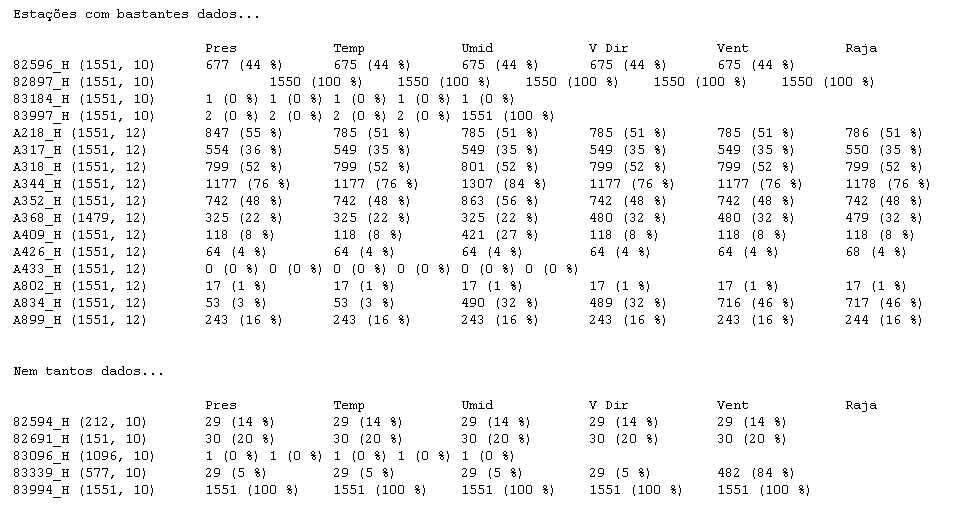


In [40]:
Colunas = ["Pressão Atm", "Temp, bs", "Umidade", "Vent Dir", "Vento", "Rajada"]

for estacao in Interesse:
    for j in range(0, len(Colunas)-1):
        if j == 0:
            print(estacao+' -1000: '+str(Dados_Vento_Preenchido[estacao][Dados_Vento_Preenchido[estacao][Colunas[j]] == float(-1000)].shape[0])+' ', end='')
            print('\t',end='')
        else:
            print(str(Dados_Vento_Preenchido[estacao][Dados_Vento_Preenchido[estacao][Colunas[j]] == float(-1000)].shape[0]), end='')
            print('\t',end='')
    print()

83184_H -1000: 1 	1	1	1	1	
A317_H -1000: 554 	549	549	549	549	
A368_H -1000: 325 	325	325	480	480	
A409_H -1000: 118 	118	421	118	118	
A426_H -1000: 64 	64	64	64	64	
A433_H -1000: 0 	0	0	0	0	
A802_H -1000: 17 	17	17	17	17	
A899_H -1000: 243 	243	243	243	243	


In [41]:
Dados_Completos_Preenchidos = {}

Trocando `-1000` por `Null`

In [42]:
for parque in Parques:
    
    estacao = Combinacao[parque]
        
    Dados_Completos_Preenchidos[parque] = Dados_Completos[parque].copy()
    for coluna in Dados_Completos[parque].columns:
        Dados_Completos_Preenchidos[parque].loc[Dados_Completos_Preenchidos[parque][coluna] == -1000, coluna] = None

In [43]:
Dados_Completos_Preenchidos["AMETISTA"].head()

,Dia,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
0,2018-01-01,53.591434,949.114286,1.759136,29.100000,3.260587,47.000000,9.899495,129.333333,51.205778,5.414286,1.763731,2.433333,0.948851,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,20.075307,947.552381,1.093974,27.942857,2.409618,55.238095,10.004307,194.857143,108.169305,4.514286,2.467172,1.933333,1.154838,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,14.788201,948.152632,0.759063,26.057895,2.341910,66.473684,9.224501,115.894737,83.043993,3.957895,3.196432,1.647368,1.498198,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-04,9.601330,950.326087,1.353327,25.856522,2.613980,70.913043,14.799862,220.782609,95.490021,3.734783,1.247470,1.552174,0.609254,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-05,133.216825,951.495652,1.367473,27.121739,3.320550,54.434783,14.306660,100.217391,95.554199,5.934783,2.267274,2.630435,1.232331,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
controle = False
for parque in Parques:
    estacao = Combinacao[parque]
        
    aux = Dados_Completos_Preenchidos[parque].isnull().sum().sum()
    if aux >0:
        controle = True
        print(parque+' null: '+str(Dados_Completos_Preenchidos[parque].isnull().sum().sum()))
if not controle:
    print('Tudo ok')

VENTOS_DO_SAO_PAULO null: 10
VENT_DA_ST_ESPERANCA null: 10
VENTOS_DA_STA_DULCE null: 10
VENTOS_DE_SAO_ABRAAO null: 10
MIASSABA_3 null: 6600
MANGUE_SECO_5 null: 6600
MIASSABA_2 null: 6600
ALEGRIA_II null: 6600
MANGUE_SECO_3 null: 6600
ALEGRIA_I null: 6600
EOL_TIANGUA null: 4828
VENTO_FORMOSO null: 4828
EOL_MORRO_DO_CHAPEU null: 4828
B_COQUEIROS_(ENERG) null: 2022
SERAIMA null: 776
PINDAI null: 776
LICINIO_DE_ALMEIDA null: 776
CANDIBA null: 776
GUIRAPA null: 776
SERRA_DO_SALTO null: 776
GUANAMBI null: 776
MORRAO null: 776
RIO_VERDE null: 776
ALVORADA null: 776
V_DO_NORDESTE_3LER null: 776
AMETISTA null: 776
TANQUE_3LER null: 776
MARON null: 776
CORRUPIAO null: 776
ANGICAL null: 776
TAMANDUA_MIRIM null: 776
PAJEU_DO_VENTO null: 776
REB_CASSINO_2_2LFA null: 204
REB_CASSINO_1_2LFA null: 204
REB_CASSINO_3_2LFA null: 204
MINUANO_I null: 2918
MINUANO_II null: 2918
CHUI_IX null: 2918
CHUI_V null: 2918
CHUI_IV null: 2918
CHUI_II null: 2918
CHUI_I null: 2918
VERACE_27 null: 2918
VERACE_26 null: 2

In [45]:
Dados_Completos_Preenchidos_AUX = {}

In [46]:
cols = ['Pressão Atm', 'std_press','Temp, bs','std_temp','Umidade','std_umi','Vent Dir','std_ven_dir','Rajada',
        'std_ven_raj']

In [47]:
Colunas = ["Pressão Atm", "Temp, bs", "Umidade", "Vent Dir", "Vento", "Rajada"]

lista_parques = ['VENTOS_DO_SAO_PAULO',
                 'MIASSABA_2',
                 'EOL_TIANGUA',
                 'B_COQUEIROS_(ENERG)',
                 'SERAIMA',
                 'REB_CASSINO_2_2LFA',
                 'CHUI_V',
                 'CRISTALANDIA_III']


for parque in lista_parques:
    estacao = Combinacao[parque]
    
    for j in range(0, len(Colunas)-1):
        if j == 0:
            print(estacao+' -1000: '+str(Dados_Completos_Preenchidos[parque][Colunas[j]].isnull().sum().sum())+' ', end='')
            print('\t',end='')
        else:
            print(str(Dados_Completos_Preenchidos[parque][Colunas[j]].isnull().sum().sum()), end='')
            print('\t',end='')
    print()

83184_H -1000: 1 	1	1	1	1	
A317_H -1000: 554 	549	549	549	549	
A368_H -1000: 325 	325	325	480	480	
A409_H -1000: 118 	118	421	118	118	
A426_H -1000: 64 	64	64	64	64	
A802_H -1000: 17 	17	17	17	17	
A899_H -1000: 243 	243	243	243	243	
A433_H -1000: 0 	0	0	0	0	


In [48]:
for parque in Parques:
    estacao = Combinacao[parque]
    
    if 'A' in estacao:
        cols = ['Pressão Atm', 'std_press','Temp, bs','std_temp','Umidade','std_umi','Vent Dir','std_ven_dir','Rajada',
                'std_ven_raj']
        Dados_Completos_Preenchidos_AUX[parque] = Dados_Completos_Preenchidos[parque]
        Dados_Completos_Preenchidos_AUX[parque].loc[:,cols] = Dados_Completos_Preenchidos_AUX[parque].loc[:,cols].fillna(axis=0, method='ffill')
    else:
        cols = ['Pressão Atm', 'std_press','Temp, bs','std_temp','Umidade','std_umi','Vent Dir','std_ven_dir']
        Dados_Completos_Preenchidos_AUX[parque] = Dados_Completos_Preenchidos[parque]
        Dados_Completos_Preenchidos_AUX[parque].loc[:,cols] = Dados_Completos_Preenchidos_AUX[parque].loc[:,cols].fillna(axis=0, method='ffill')        

Ainda existem estações que possuem dados **<font color='red'>null</font>**, o que nos leva a crer que o `null` se apresentava **desde o início da série histórica**

In [49]:
Colunas = ["Pressão Atm", "Temp, bs", "Umidade", "Vent Dir", "Vento", "Rajada"]

lista_parques = ['VENTOS_DO_SAO_PAULO',
                 'MIASSABA_2',
                 'EOL_TIANGUA',
                 'B_COQUEIROS_(ENERG)',
                 'SERAIMA',
                 'REB_CASSINO_2_2LFA',
                 'CHUI_V',
                 'CRISTALANDIA_III']

for parque in lista_parques:
    
    estacao = Combinacao[parque]
    
    for j in range(0, len(Colunas)-1):
        if j == 0:
            print(estacao+' -1000: '+str(Dados_Completos_Preenchidos_AUX[parque][Colunas[j]].isnull().sum().sum())+' ', end='')
            print('\t',end='')
        else:
            print(str(Dados_Completos_Preenchidos_AUX[parque][Colunas[j]].isnull().sum().sum()), end='')
            print('\t',end='')
    print()

#Dados_Completos_Preenchidos_AUX

83184_H -1000: 0 	0	0	0	1	
A317_H -1000: 0 	0	0	0	549	
A368_H -1000: 1 	1	1	1	480	
A409_H -1000: 0 	0	0	0	118	
A426_H -1000: 0 	0	0	0	64	
A802_H -1000: 0 	0	0	0	17	
A899_H -1000: 0 	0	0	0	243	
A433_H -1000: 0 	0	0	0	0	


**<font color='red'>Estações com dados `Null` foram preenchidas com `0`</font>**

In [50]:
Dados_Completos_Preenchidos_2 = {}

In [51]:
for parque in Parques:
    estacao = Combinacao[parque]
    
    Dados_Completos_Preenchidos_2[parque] = Dados_Completos_Preenchidos_AUX[parque][Dados_Completos_Preenchidos_AUX[parque]['Vento'].notna()]

In [52]:
Dados_Completos_Preenchidos_2["AMETISTA"].head()

,Dia,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
0,2018-01-01,53.591434,949.114286,1.759136,29.100000,3.260587,47.000000,9.899495,129.333333,51.205778,5.414286,1.763731,2.433333,0.948851,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,20.075307,947.552381,1.093974,27.942857,2.409618,55.238095,10.004307,194.857143,108.169305,4.514286,2.467172,1.933333,1.154838,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,14.788201,948.152632,0.759063,26.057895,2.341910,66.473684,9.224501,115.894737,83.043993,3.957895,3.196432,1.647368,1.498198,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-04,9.601330,950.326087,1.353327,25.856522,2.613980,70.913043,14.799862,220.782609,95.490021,3.734783,1.247470,1.552174,0.609254,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-05,133.216825,951.495652,1.367473,27.121739,3.320550,54.434783,14.306660,100.217391,95.554199,5.934783,2.267274,2.630435,1.232331,0.0,0.0,0.0,0.0,0.0,0.0


Analisando somente **um** parque relacionado a cada estação meteorológica (uma vez que os dados meteorológicos serão os mesmos para cada parque relacionado a mesmas estação). 

Essa análise se restringe ao **tamanho da série histórica** considerada para cada estação meteorológica, ou seja, a quantidade de dias em que há dados a serem considerados

In [53]:
lista_parques = ['VENTOS_DO_SAO_PAULO',
                 'MIASSABA_2',
                 'EOL_TIANGUA',
                 'B_COQUEIROS_(ENERG)',
                 'SERAIMA',
                 'REB_CASSINO_2_2LFA',
                 'CHUI_V',
                 'CRISTALANDIA_III']

for item in lista_parques:
    print(Combinacao[item]+' : '+str(len(Dados_Completos_Preenchidos_2[item])))

83184_H : 1550
A317_H : 1002
A368_H : 999
A409_H : 1433
A426_H : 1487
A802_H : 1534
A899_H : 1308
A433_H : 1551


In [54]:
controle = False

for parque in Parques:
    estacao = Combinacao[parque]
    
    aux = Dados_Completos_Preenchidos_2[parque].isnull().sum().sum()
    if aux >0:
        controle = True
        print(parque+' null: '+str(Dados_Completos_Preenchidos_2[parque].isnull().sum().sum()))
if not controle:
    print('Tudo ok')

Tudo ok


In [55]:
Dados_Completos_Preenchidos_2['AMETISTA'].head()

,Dia,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
0,2018-01-01,53.591434,949.114286,1.759136,29.100000,3.260587,47.000000,9.899495,129.333333,51.205778,5.414286,1.763731,2.433333,0.948851,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,20.075307,947.552381,1.093974,27.942857,2.409618,55.238095,10.004307,194.857143,108.169305,4.514286,2.467172,1.933333,1.154838,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,14.788201,948.152632,0.759063,26.057895,2.341910,66.473684,9.224501,115.894737,83.043993,3.957895,3.196432,1.647368,1.498198,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-04,9.601330,950.326087,1.353327,25.856522,2.613980,70.913043,14.799862,220.782609,95.490021,3.734783,1.247470,1.552174,0.609254,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-05,133.216825,951.495652,1.367473,27.121739,3.320550,54.434783,14.306660,100.217391,95.554199,5.934783,2.267274,2.630435,1.232331,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
Dados_Completos_Preenchidos_2['AMETISTA'].describe()

,Potência,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.0,1487.0,1487.0,1487.0,1487.0,1487.0
mean,217.938549,951.497557,1.308592,25.998385,3.097688,53.511727,12.629820,119.653607,28.999000,7.375068,2.013580,3.521684,1.290997,0.0,0.0,0.0,0.0,0.0,0.0
std,143.540273,2.650715,0.298613,2.065092,0.838614,12.476837,3.362744,30.892352,24.718268,2.374066,0.628864,1.377153,0.417065,0.0,0.0,0.0,0.0,0.0,0.0
min,0.539296,944.379167,0.000000,20.395000,0.000000,18.500000,0.000000,76.583333,0.000000,2.186957,0.000000,0.887500,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,87.144833,949.623370,1.130011,24.537500,2.642857,45.041667,10.835824,100.171196,12.331342,5.397917,1.614302,2.428220,1.004914,0.0,0.0,0.0,0.0,0.0,0.0
50%,214.478965,950.990909,1.294513,26.012500,3.199108,52.375000,12.877562,109.391304,19.588641,7.434783,1.967544,3.487500,1.258306,0.0,0.0,0.0,0.0,0.0,0.0
75%,334.883263,953.206250,1.486925,27.304348,3.629398,61.158333,14.878384,130.456439,39.333633,9.070833,2.421185,4.466667,1.544153,0.0,0.0,0.0,0.0,0.0,0.0
max,566.943637,962.400000,2.417123,33.840000,5.393425,89.333333,24.014975,291.954545,129.448188,15.900000,5.070414,10.300000,2.907291,0.0,0.0,0.0,0.0,0.0,0.0


# 5) Normalizando dados

Para que o algoritmo convirja mais rapidamente é necessário que se normalize os dados, além disso garante-se que uma característica não prevaleça sobre as outras (o algoritmo poderia "pensar" que uma característica com altos valores é mais relevante que uma com baixos valores). Assim, foram normalizados **todos** os dados de entrada ao invervalo `0` e `1` (devido à escala escolhida `min-max`)

In [57]:
Dados_Completos_Normalizados = {}

DataFrame utilizado para que os dados de potência gerada nos parques eólicos **não** sejam normalizados

In [58]:
Dados_Completos_Preenchidos_3 = {}

In [59]:
# Importanto o método pré-definido
scaler = MinMaxScaler()

for parque in Parques:
    estacao = Combinacao[parque]
    
    Dados_Completos_Preenchidos_3[parque] = Dados_Completos_Preenchidos_2[parque].drop(columns=['Dia','Potência'])

# Removi os dados de dia do ano e os dados do desvio padrão da potência - tendo em vista que seria informação "inútil"
for parque in Parques:
    estacao = Combinacao[parque]
    
    Dados_Completos_Normalizados[parque] = pd.DataFrame(scaler.fit_transform(Dados_Completos_Preenchidos_3[parque]),
                                                                             columns=Dados_Completos_Preenchidos_3[parque].columns,
                                                                             index=Dados_Completos_Preenchidos_3[parque].index)


Criando o DataFrame **FINAL** (que será usado para treinar e testar os modelos). Lembrando que a variável a ser prevista é a **potência** (chamada de `pot`), portanto, essa informação não deve ser normalizada.

In [60]:
for parque in Parques:
    estacao = Combinacao[parque]
    Dados_Completos_Normalizados[parque]['Pot'] = Dados_Completos[parque]['Potência']

In [61]:
Dados_Completos_Normalizados['AMETISTA'].head()

,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6,Pot
0,0.262758,0.727781,0.647453,0.604549,0.402353,0.412222,0.244926,0.395570,0.235347,0.347848,0.164232,0.326369,0.0,0.0,0.0,0.0,0.0,0.0,53.591434
1,0.176086,0.452594,0.561388,0.446770,0.518655,0.416586,0.549163,0.835619,0.169716,0.486582,0.111111,0.397221,0.0,0.0,0.0,0.0,0.0,0.0,20.075307
2,0.209395,0.314036,0.421190,0.434216,0.677276,0.384115,0.182529,0.641523,0.129143,0.630408,0.080730,0.515324,0.0,0.0,0.0,0.0,0.0,0.0,14.788201
3,0.330003,0.559892,0.406212,0.484661,0.739949,0.616276,0.669538,0.737670,0.112873,0.246029,0.070616,0.209561,0.0,0.0,0.0,0.0,0.0,0.0,9.601330
4,0.394903,0.565744,0.500315,0.615666,0.507315,0.595739,0.109736,0.738166,0.273304,0.447157,0.185172,0.423876,0.0,0.0,0.0,0.0,0.0,0.0,133.216825


In [62]:
Dados_Completos_Normalizados['AMETISTA'].describe()

,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6,Pot
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.0,1487.0,1487.0,1487.0,1487.0,1487.0,1487.000000
mean,0.395009,0.541384,0.416763,0.574345,0.494283,0.525914,0.199982,0.224020,0.378334,0.397123,0.279860,0.444055,0.0,0.0,0.0,0.0,0.0,0.0,217.938549
std,0.147092,0.123541,0.153596,0.155488,0.176144,0.140027,0.143438,0.190951,0.173125,0.124026,0.146311,0.143455,0.0,0.0,0.0,0.0,0.0,0.0,143.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.539296
25%,0.291008,0.467503,0.308107,0.490015,0.374706,0.451211,0.109522,0.095261,0.234154,0.318377,0.163689,0.345653,0.0,0.0,0.0,0.0,0.0,0.0,87.144833
50%,0.366894,0.535559,0.417813,0.593150,0.478235,0.536230,0.152332,0.151324,0.382689,0.388044,0.276228,0.432810,0.0,0.0,0.0,0.0,0.0,0.0,214.478965
75%,0.489827,0.615163,0.513897,0.672930,0.602235,0.619546,0.250141,0.303856,0.501995,0.477512,0.380257,0.531131,0.0,0.0,0.0,0.0,0.0,0.0,334.883263
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,566.943637


Terminou em **1550** pois começou no índice **0**.

# -------------------------------------------------------------------------------------------------------------------------------------------------


# 6) Gerando modelos de Machine Learning (prever para o próximo dia)

In [68]:
Modelos = {1:['Vento', 'std_vent', 'C6'],
           2:['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6'],
           3:['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
          }

## 6.1) Função `criando_RNA_2`


A função `criando_RNA_2` cria e treina a RNA de forma parametrizada.

**Camadas**

- **Camdas ocultas**: 1, 4, 10, 20, 50 e 70
- **Neurônios na camada oculta**: 10, 20, 50, 80 e 100
- **Função de ativação da camada oculta**: relu
- **Função de ativação da camada de saída**: relu
- **Otimizador**: ADAM

**Treinamento**

- Divisão dos dados: os dados serão divididos com múltiplos `train/test split` - mais precisamente 5 -, de modo que a quantidade de dados de `treino` sempre aumente e os dados de `teste` "andem" no tempo. Exemplo:
        - Jan/2018 a Jun/2018 para treino 
            - Jul/2018 a Dez/2018 para teste
        - Jan/2018 a Dez/2018 para treino 
            - Jan/2019 a Jun/2019 para teste
        - Jan/2018 a Jun/2019 para treino 
            - Jul/2019 a Dez/2019 para teste
        - Jan/2018 a Dez/2019 para treino 
            - Jan/2020 a Jun/2020 para teste
        - Jan/2018 a Jun/2020 para treino 
            - Jul/2020 a Dez/2020 para teste
- Normalização dos dados
- Parada antecipada com 30 `epochs` de paciência
- Cada arquitetura é treinada 30 (`rep`) vezes


**Métricas de Desempenho**

*   Erro médio absoluto (MSE)
*   Erro médio quadrático (MAE)
*   Coeficiente de Determinação (r2)

In [66]:
def criando_RNA_2 (explicacao, num_modelo, parque, dados, col, col_y, n_camada, n_neuronios,
                   camadas_neuronios, rept = 50, func_act = 'relu',
                   max_interacoes = 10000, func_solver = 'adam', pacience = 30, tempo = 0, Verbose = False,
                   stoping = True, dias = 90):
  
  '''Essa função define e treina uma RNA, dados os parâmetros:
  
  - `neuronios` (list): Quantidade de neurônios de cada camada oculta 
  - `camadas` (int ou list): Quantidade de camadas ocultas
  - `num_modelo`: Numero da alternativa de dados de entrada
  - `parque`: Nome do parque em análise
  - `dados`: df que reúne os todos os dados possíveis de serem usados
  - `col_y`: Nome da coluna com a variável alvo
  - `paciencia`: patience do callback. Default: 30
  - `activation`: Nome da função da ativação. Default: 'relu'
  - `epochs`: Numero máximo de epochs. Default: 2000
  - `rept` (int): Numero de repetições de treinamento para cada arquitetura. Default: 50
  -  `cols` (list): colunas do DataFrame `dados` que serão consideradas como input
  '''
  
  # Caminho do meu Drive onde os resultados obtidos serão salvos em formato `.xlsx`
  #path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/Turbinas Eólicas/Resultados/Resultados/'
  path = 'C:/Users/gasantos/Documents/IC/Resultados/Resultados/'
  # Armazenando a data em que o código está sendo rodado - fará parte do nome do arquivo a ser salvo
  data = datetime.now().strftime("%m-%d")    
  
  # Atribuindo a novas variáveis os dados que serão usados para treino e teste e o dado a ser previsto (potência)
  X, y = dados[col], dados[col_y]

  # Criando listas para armazenar os valores dos resultados, que depois serão salvos em um arquivo `.xlsx`
  # esses resultados também poderão ser impressos no presente código
  # `in` representa os resultados de treino
  # `out` representa os resultados de teste

  # Aqui só estamos criando uma lista para armazenar o melhor valor de resposta para o determinado modelo
  resultados_modelo_in = []
  # Aqui só estamos criando uma lista para armazenar o melhor valor de resposta para o determinado modelo
  resultados_modelo_out = []
  
  # Configurando para o batch ter tamanho específico, no caso 90 dias
  num_in_test = dias # 90 dias o batch de teste
  test_size = float(num_in_test) / len(X)
  n_splits = int((1//test_size)-1)

  # Usando biblioteca padrão para separa os dados no tempo, considerando n_splits (número de divisões - 5)
  splits = TimeSeriesSplit(n_splits=n_splits, max_train_size=dias)

  # Variável auxiliar para imprimir na tela em qual split está, relacionado este à quantidade de dados de treino e teste
  # Também para dar o nome do modelo
  rept_test_split = 0
  for train_index, test_index in splits.split(X):
      
      # Imprimir o tamanho do conjunto de treino e de teste
      print('Parque ' + parque + ' modelo ' + str(num_modelo) + ' repetição ' + str(rept_test_split) + ' : ' + str(train_index[-1]) + ' , ' + str(test_index[-1]))
        
      # Defasando a potência em relação as variáveis meteorológicas
      X_train, y_train = X[train_index[0]:train_index[-1]+1], y[train_index[0]:train_index[-1]+1]
      X_test, y_test = X[test_index[0]:test_index[-1]], y[test_index[0]:test_index[-1]]

      # Lista para armazenar os resultados das métricas obtidas - lembrando que iremos rodar 50 modelos
      # para cada combinação de Camada + Neurônios
      # Faremos uma lista de lista pois temos interesse na média e no desvio padrão obtido do conjunto dos 50 modelos
      metricas=[[],[],[],[],[]]

      # A função de ativação fará parte da combinação para nomear o modelo
      # no caso, só usamos `relu` mas outras poderiam ser usadas
      if func_act == 'relu':
        nome_modelo = 'M'+str(num_modelo)+'_'+parque+'_R_'+'WF_'+str(rept_test_split)+'t_'+str(tempo)+'_C'+str(n_camada)+'N'+str(n_neuronios)
      elif func_act == 'identity':
        nome_modelo = 'M'+str(num_modelo)+'_'+parque+'_I_'+'WF_'+str(rept_test_split)+'t_'+str(tempo)+'_C'+str(n_camada)+'N'+str(n_neuronios)
      elif func_act == 'logistic':
        nome_modelo = 'M'+str(num_modelo)+'_'+parque+'_L_'+'WF_'+str(rept_test_split)+'t_'+str(tempo)+'_C'+str(n_camada)+'N'+str(n_neuronios)
      elif func_act == 'tanh':
        nome_modelo = 'M'+str(num_modelo)+'_'+parque+'_T_'+'WF_'+str(rept_test_split)+'t_'+str(tempo)+'_C'+str(n_camada)+'N'+str(n_neuronios)

      # 30 modelos para cada combinação... (por padrão)
      for i in range(0,rept):

        regr_model = MLPRegressor(activation = func_act, max_iter = max_interacoes, hidden_layer_sizes = camadas_neuronios, solver = func_solver,
                                  verbose = Verbose, early_stopping = stoping, n_iter_no_change = pacience).fit(X_train, y_train)

        # Armazenando os resultados
        y_pred = regr_model.predict(X_test)
        y_pred_in = regr_model.predict(X_train)

        # Armazenando as métricas obtidas
        metricas[0].append(r2_score(y_test, y_pred))
        metricas[1].append(mean_absolute_error(y_test, y_pred))
        metricas[2].append(mean_absolute_error(y_train, y_pred_in))
        metricas[3].append(mean_squared_error(y_test, y_pred))
        metricas[4].append(mean_squared_error(y_train, y_pred_in))

        # Armazenando a previsão da potência do MELHOR resultado obtido (consirando o r2 como métrica do "melhor")
        if len(metricas[0])>1:
          if r2_score(y_test, y_pred)>np.max(metricas[0]):
            resultados_modelo_in = y_pred_in
            Y_resp_in = y_train
            resultados_modelo_out = y_pred
            Y_resp_out = y_test
        else:
          resultados_modelo_in = y_pred_in
          Y_resp_in = y_train
          resultados_modelo_out = y_pred
          Y_resp_out = y_test

      # Aqui, começamos a criar o arquivo excel
      # criamos um arquivo
      arquivo_excel = Workbook()
      # Escolhemos a planilha a ser utilizada
      sheet1 = arquivo_excel.active

      # Na primeira planilha, armazenarei as métricas obtidas
      # assim, na primeira linha criei um cabeçalho com o número da repetição (1,2..., 50 - por padrão)
      # a numeração de linha e coluna começa em 1...
      for i in range(0,rept):
        sheet1.cell(row=1, column=i+2, value='n = '+str(i+1))

      # Legenda das linhas, qual linha representa qual métrica
      # no caso, estamos armazenando valores
      sheet1.cell(row=2, column=1, value='r2')
      sheet1.cell(row=3, column=1, value='mae')
      sheet1.cell(row=4, column=1, value='mae_in')
      sheet1.cell(row=5, column=1, value='mse')
      sheet1.cell(row=6, column=1, value='mse_in')

      # Armazenando os valores obtidos em cada métrica para cara repetição (1,2..., 30 - por padrão)
      for i in range(0,rept):
        sheet1.cell(row=2, column=i+2, value=metricas[0][i])
        sheet1.cell(row=3, column=i+2, value=metricas[1][i])
        sheet1.cell(row=4, column=i+2, value=metricas[2][i])
        sheet1.cell(row=5, column=i+2, value=metricas[3][i])
        sheet1.cell(row=6, column=i+2, value=metricas[4][i])

      # Criando o cabeçalho da Média e do Desvio Padrão
      sheet1.cell(row=1, column=rept+2, value='MEDIA')
      sheet1.cell(row=1, column=rept+3, value='STD')

      # Para tornar o armazenamento dos dados "automático", lembrando que as métricas começam a ser armazenadas na linha 2
      # pois a linha 1 tem o cabeçalho
      linha = 2
      # Variáveis auxiliares para obter a média e o desvio padrão de cada métrica
      Mean = []
      Std = []

      # Para cada métrica, obteremos a média e o desvio padrão
      for item in metricas:
        media = 0
        std_aux = 0
        for valor in item:
          media += valor
          std_aux += valor**2
        media = media/len(item)
        # Desvio padrão também pode ser obtido por essa fórmula (média dos quadrados menos quadrado da média)
        # mas não sei provar pq, rsrs
        std = (std_aux/len(item) - media**2)**(1/2)

        # Armazenando os resultados no excel
        sheet1.cell(row = linha, column = rept+2, value = media)
        # Variável para poder imprimir os resultados no código
        Mean.append(media)
        # Armazenando os resultados no excel
        sheet1.cell(row = linha, column = rept+3, value = std)
        # Variável para poder imprimir os resultados no código
        Std.append(std)

        linha +=1

      # Só para checar se foi tudo certo, se realmente tinham 50 respostas...
      sheet1.cell(row=7, column=1, value=len(metricas[0]))

      # Criando uma nova planilha no mesmo arquivo - para armazenar os resultados obtidos - melhor
      sheet2 = arquivo_excel.create_sheet('Resultados')
      # Dizendo ao programa que usaremos agora a segunda planilha (a que foi criada)
      # se fosse terceira planilha do arquivo usaríamos 2 e assim sucessivamente
      arquivo_excel.active = 1

      # Cabeçalho das linhas, tendo em vista que os valores serão armazenados na horizontal, NÃO na vertical
      sheet2.cell(row = 2, column = 2, value = 'IN')
      sheet2.cell(row = 3, column = 1, value = 'Prev_in_best')
      sheet2.cell(row = 4, column = 1, value = 'Real_in')
      sheet2.cell(row = 6, column = 2, value = 'OUT')
      sheet2.cell(row = 7, column = 1, value = 'Prev_out_best')
      sheet2.cell(row = 8, column = 1, value = 'Real_out')

      # Armazenando os resultados em suas respectivas linhas
      coluna = 0
      for valor in resultados_modelo_in:
        sheet2.cell(row = 3, column = coluna+2, value = valor)
        coluna += 1

      coluna = 0
      for item in Y_resp_in:
        sheet2.cell(row = 4, column = coluna+2, value = item)
        coluna += 1

      coluna = 0
      for valor in resultados_modelo_out:
        sheet2.cell(row = 7, column = coluna+2, value = valor)
        coluna += 1

      coluna = 0
      for item in Y_resp_out:
        sheet2.cell(row = 8, column = coluna+2, value = item)
        coluna += 1

      # Os resultados são salvos em pastas para cada dia (e.g.: 06/25 - 25 de Junho)
      # Caso a pasta do dia não exista ela é criada
      os.chdir(path)
      pastas = os.listdir()
      if data not in pastas:
        os.mkdir(data)

      # Escolhendo o nome do arquivo - lembrar do `path` (onde será salvo no PC)
      nome = path+data+'/'+explicacao+data+'-'+nome_modelo+'-RNA-SO-(t).xlsx'

      # Salvando com o nome escolhido
      arquivo_excel.save(nome)
      # Fechando para não gastar muita RAM
      arquivo_excel.close()
        
      rept_test_split += 1

Para cada parque iremos criar modelos que combinem diferentes dados de entrada (*Pressão, Temperatura, Umidade, Direção do vento, rajada máxima, velocidade do vento*). E, para cada combinação de dados de entrada serão criados modelos com as seguintes combinações de Neurônios e Camadas Ocultas:



*   **Neurônios**: 20, 50, 80, 100
*   **Camadas Ocultas**: 1, 4, 10, 20, 50, 70



Aqui descrevo quais dados de entrada - meteorológicos - serão considerados para cada um dos "modelos"

Criando um dicionário que armazena os nomes das variáveis que serão consideradas em cada "modelo"

In [ ]:
Tempos = []

explicacao = "(NOVO_PROG_TODOS)_"
delta = 0

regr_model = MLPRegressor()

Camadas = [1, 2, 4, 8]
Neuronios = [5, 10, 20]


combinacao = []
for neuronio in Neuronios:
    for camada in Camadas:
        size = []
        for i in range(0,camada):
            size.append(neuronio)
        combinacao.append(size)

param_grid = [
    {'hidden_layer_sizes': combinacao, 'verbose': [False], 'early_stopping': [True],
     'activation': ['relu'], 'n_iter_no_change': [30], 'solver': ['adam'], 'max_iter': [10000]},
]
        
for Parque in Parques:
    if Parque == 'VENTOS_DO_SAO_PAULO' or Parque == 'VENT_DA_ST_ESPERANCA' or Parque == 'VENT_DA_ST_ESPERANCA' or Parque == 'VENTOS_DA_STA_DULCE' or Parque == 'VENTOS_DE_SAO_ABRAAO':
            continue
    Parque = Parque.replace(' ','_')
    
    t1 = tm.time()
    
    grid_search = GridSearchCV(regr_model, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=False)
    
    if 'A' in Combinacao[Parque]:
        grid_search.fit(Dados_Completos_Normalizados[Parque][Modelos[3]], Dados_Completos_Normalizados[Parque]['Pot'])
    else:
        grid_search.fit(Dados_Completos_Normalizados[Parque][['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5']], Dados_Completos_Normalizados[Parque]['Pot'])
    
    texto = ''

    for item in grid_search.best_params_:
        if item == 'hidden_layer_sizes':
            texto += 'Camadas: '+str(len(grid_search.best_params_[item]))+' Neuronios: '+str(grid_search.best_params_[item][0])+ ' ; '
        elif item == 'activation' or item == 'max_iter' or item == 'n_iter_no_change' or item == 'solver':
            texto += str(item)+': '+str(grid_search.best_params_[item]) + ' ; '

    print(Parque + ' : ' + texto)
    
    t2 = tm.time()
    x = str((t2-t1)/60)
    print('Parque ' + Parque + ' - ' + x.split('.')[0]+' min e '+str(float('0.'+x.split('.')[1])*60).split('.')[0]+' segundos')
    
    for Num_modelo in [1,2,3]:
        if 'A' not in Combinacao[Parque]:
            if Num_modelo == 2 or Num_modelo == 1:
                colunas = ['Vento', 'std_vent', 'C5']
            else:
                colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5']
        else:
            colunas = Modelos[Num_modelo]
            
        t1 = tm.time()
        
        criando_RNA_2(explicacao = explicacao, col = colunas, 
                      n_camada = len(grid_search.best_params_['hidden_layer_sizes']),
                      n_neuronios = grid_search.best_params_['hidden_layer_sizes'][0], 
                      parque = Parque, num_modelo = Num_modelo, dados = Dados_Completos_Normalizados[Parque],
                      col_y = 'Pot', rept = 30, tempo = delta, dias = 180, 
                      max_interacoes = grid_search.best_params_['max_iter'],
                      camadas_neuronios = grid_search.best_params_['hidden_layer_sizes'],
                      func_act = grid_search.best_params_['activation'],
                      stoping = grid_search.best_params_['early_stopping'],
                      pacience = grid_search.best_params_['n_iter_no_change'],
                      func_solver = grid_search.best_params_['solver'],
                      Verbose = grid_search.best_params_['verbose'],
                     )

        t2 = tm.time()
        x = str((t2-t1)/60)
        Tempos.append(float(x))
        print('Parque ' + Parque + ' modelo ' + str(Num_modelo) + ' - ' + x.split('.')[0]+' min e '+str(float('0.'+x.split('.')[1])*60).split('.')[0]+' segundos')

print('Total: ' + str(Tempo).split('.')[0] + ' min e '+str(float('0.'+str(Tempo).split('.')[1])*60).split('.')[0]+' segundos')

MIASSABA_3 : activation: relu ; Camadas: 4 Neuronios: 20 ; max_iter: 10000 ; n_iter_no_change: 30 ; solver: adam ; 
Parque MIASSABA_3 - 2 min e 10 segundos
Parque MIASSABA_3 modelo 1 repetição 0 : 201 , 401
Parque MIASSABA_3 modelo 1 repetição 1 : 401 , 601
Parque MIASSABA_3 modelo 1 repetição 2 : 601 , 801
Parque MIASSABA_3 modelo 1 repetição 3 : 801 , 1001
Parque MIASSABA_3 modelo 1 - 0 min e 52 segundos
Parque MIASSABA_3 modelo 2 repetição 0 : 201 , 401
Parque MIASSABA_3 modelo 2 repetição 1 : 401 , 601
Parque MIASSABA_3 modelo 2 repetição 2 : 601 , 801
Parque MIASSABA_3 modelo 2 repetição 3 : 801 , 1001
Parque MIASSABA_3 modelo 2 - 0 min e 56 segundos
Parque MIASSABA_3 modelo 3 repetição 0 : 201 , 401
Parque MIASSABA_3 modelo 3 repetição 1 : 401 , 601
Parque MIASSABA_3 modelo 3 repetição 2 : 601 , 801
Parque MIASSABA_3 modelo 3 repetição 3 : 801 , 1001
Parque MIASSABA_3 modelo 3 - 1 min e 3 segundos
MANGUE_SECO_5 : activation: relu ; Camadas: 8 Neuronios: 20 ; max_iter: 10000 ; n_i

C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MIASSABA_2 : activation: relu ; Camadas: 8 Neuronios: 20 ; max_iter: 10000 ; n_iter_no_change: 30 ; solver: adam ; 
Parque MIASSABA_2 - 2 min e 34 segundos
Parque MIASSABA_2 modelo 1 repetição 0 : 201 , 401
Parque MIASSABA_2 modelo 1 repetição 1 : 401 , 601
Parque MIASSABA_2 modelo 1 repetição 2 : 601 , 801
Parque MIASSABA_2 modelo 1 repetição 3 : 801 , 1001
Parque MIASSABA_2 modelo 1 - 1 min e 6 segundos
Parque MIASSABA_2 modelo 2 repetição 0 : 201 , 401
Parque MIASSABA_2 modelo 2 repetição 1 : 401 , 601
Parque MIASSABA_2 modelo 2 repetição 2 : 601 , 801
Parque MIASSABA_2 modelo 2 repetição 3 : 801 , 1001
Parque MIASSABA_2 modelo 2 - 1 min e 15 segundos
Parque MIASSABA_2 modelo 3 repetição 0 : 201 , 401
Parque MIASSABA_2 modelo 3 repetição 1 : 401 , 601
Parque MIASSABA_2 modelo 3 repetição 2 : 601 , 801
Parque MIASSABA_2 modelo 3 repetição 3 : 801 , 1001
Parque MIASSABA_2 modelo 3 - 1 min e 15 segundos
ALEGRIA_II : activation: relu ; Camadas: 8 Neuronios: 10 ; max_iter: 10000 ; n_iter

C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Parque ALEGRIA_II modelo 1 repetição 2 : 601 , 801
Parque ALEGRIA_II modelo 1 repetição 3 : 801 , 1001
Parque ALEGRIA_II modelo 1 - 1 min e 27 segundos
Parque ALEGRIA_II modelo 2 repetição 0 : 201 , 401
Parque ALEGRIA_II modelo 2 repetição 1 : 401 , 601
Parque ALEGRIA_II modelo 2 repetição 2 : 601 , 801
Parque ALEGRIA_II modelo 2 repetição 3 : 801 , 1001
Parque ALEGRIA_II modelo 2 - 1 min e 3 segundos
Parque ALEGRIA_II modelo 3 repetição 0 : 201 , 401
Parque ALEGRIA_II modelo 3 repetição 1 : 401 , 601
Parque ALEGRIA_II modelo 3 repetição 2 : 601 , 801
Parque ALEGRIA_II modelo 3 repetição 3 : 801 , 1001
Parque ALEGRIA_II modelo 3 - 0 min e 58 segundos


C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MANGUE_SECO_3 : activation: relu ; Camadas: 2 Neuronios: 20 ; max_iter: 10000 ; n_iter_no_change: 30 ; solver: adam ; 
Parque MANGUE_SECO_3 - 2 min e 30 segundos
Parque MANGUE_SECO_3 modelo 1 repetição 0 : 201 , 401
Parque MANGUE_SECO_3 modelo 1 repetição 1 : 401 , 601
Parque MANGUE_SECO_3 modelo 1 repetição 2 : 601 , 801
Parque MANGUE_SECO_3 modelo 1 repetição 3 : 801 , 1001
Parque MANGUE_SECO_3 modelo 1 - 1 min e 36 segundos
Parque MANGUE_SECO_3 modelo 2 repetição 0 : 201 , 401
Parque MANGUE_SECO_3 modelo 2 repetição 1 : 401 , 601
Parque MANGUE_SECO_3 modelo 2 repetição 2 : 601 , 801
Parque MANGUE_SECO_3 modelo 2 repetição 3 : 801 , 1001
Parque MANGUE_SECO_3 modelo 2 - 1 min e 36 segundos
Parque MANGUE_SECO_3 modelo 3 repetição 0 : 201 , 401
Parque MANGUE_SECO_3 modelo 3 repetição 1 : 401 , 601
Parque MANGUE_SECO_3 modelo 3 repetição 2 : 601 , 801
Parque MANGUE_SECO_3 modelo 3 repetição 3 : 801 , 1001
Parque MANGUE_SECO_3 modelo 3 - 2 min e 2 segundos
ALEGRIA_I : activation: relu ; C

C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


EOL_TIANGUA : activation: relu ; Camadas: 8 Neuronios: 20 ; max_iter: 10000 ; n_iter_no_change: 30 ; solver: adam ; 
Parque EOL_TIANGUA - 2 min e 36 segundos
Parque EOL_TIANGUA modelo 1 repetição 0 : 202 , 401
Parque EOL_TIANGUA modelo 1 repetição 1 : 401 , 600
Parque EOL_TIANGUA modelo 1 repetição 2 : 600 , 799
Parque EOL_TIANGUA modelo 1 repetição 3 : 799 , 998
Parque EOL_TIANGUA modelo 1 - 1 min e 21 segundos
Parque EOL_TIANGUA modelo 2 repetição 0 : 202 , 401
Parque EOL_TIANGUA modelo 2 repetição 1 : 401 , 600
Parque EOL_TIANGUA modelo 2 repetição 2 : 600 , 799
Parque EOL_TIANGUA modelo 2 repetição 3 : 799 , 998
Parque EOL_TIANGUA modelo 2 - 1 min e 8 segundos
Parque EOL_TIANGUA modelo 3 repetição 0 : 202 , 401
Parque EOL_TIANGUA modelo 3 repetição 1 : 401 , 600
Parque EOL_TIANGUA modelo 3 repetição 2 : 600 , 799
Parque EOL_TIANGUA modelo 3 repetição 3 : 799 , 998
Parque EOL_TIANGUA modelo 3 - 1 min e 17 segundos
VENTO_FORMOSO : activation: relu ; Camadas: 8 Neuronios: 10 ; max_ite

C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


EOL_MORRO_DO_CHAPEU : activation: relu ; Camadas: 8 Neuronios: 20 ; max_iter: 10000 ; n_iter_no_change: 30 ; solver: adam ; 
Parque EOL_MORRO_DO_CHAPEU - 2 min e 24 segundos
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 0 : 202 , 401
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 1 : 401 , 600
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 2 : 600 , 799
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 3 : 799 , 998
Parque EOL_MORRO_DO_CHAPEU modelo 1 - 1 min e 16 segundos
Parque EOL_MORRO_DO_CHAPEU modelo 2 repetição 0 : 202 , 401
Parque EOL_MORRO_DO_CHAPEU modelo 2 repetição 1 : 401 , 600
Parque EOL_MORRO_DO_CHAPEU modelo 2 repetição 2 : 600 , 799
Parque EOL_MORRO_DO_CHAPEU modelo 2 repetição 3 : 799 , 998
Parque EOL_MORRO_DO_CHAPEU modelo 2 - 1 min e 15 segundos
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 0 : 202 , 401
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 1 : 401 , 600
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 2 : 600 , 799
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 3 : 

C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


LICINIO_DE_ALMEIDA : activation: relu ; Camadas: 8 Neuronios: 10 ; max_iter: 10000 ; n_iter_no_change: 30 ; solver: adam ; 
Parque LICINIO_DE_ALMEIDA - 2 min e 46 segundos
Parque LICINIO_DE_ALMEIDA modelo 1 repetição 0 : 191 , 376
Parque LICINIO_DE_ALMEIDA modelo 1 repetição 1 : 376 , 561
Parque LICINIO_DE_ALMEIDA modelo 1 repetição 2 : 561 , 746
Parque LICINIO_DE_ALMEIDA modelo 1 repetição 3 : 746 , 931


C:\Users\gasantos\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Parque LICINIO_DE_ALMEIDA modelo 1 repetição 4 : 931 , 1116
Parque LICINIO_DE_ALMEIDA modelo 1 repetição 5 : 1116 , 1301
Parque LICINIO_DE_ALMEIDA modelo 1 repetição 6 : 1301 , 1486
Parque LICINIO_DE_ALMEIDA modelo 1 - 2 min e 46 segundos
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 0 : 191 , 376
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 1 : 376 , 561
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 2 : 561 , 746
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 3 : 746 , 931
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 4 : 931 , 1116
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 5 : 1116 , 1301
Parque LICINIO_DE_ALMEIDA modelo 2 repetição 6 : 1301 , 1486
Parque LICINIO_DE_ALMEIDA modelo 2 - 2 min e 32 segundos
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 0 : 191 , 376
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 1 : 376 , 561
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 2 : 561 , 746
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 3 : 746 , 931
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 4 : 9

## 6.2) Função `criando_SVR`

In [122]:
def criando_SVR (explicacao, num_modelo, parque, dados, col, col_y, gam, c, ep, rep=50,
                 tempo = 0, dias = 90, data = datetime.now().strftime("%m-%d"),
                 ker = 'rbf'):

    # Caminho do meu Drive onde os resultados obtidos serão salvos em formato `.xlsx`
    #path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/Turbinas Eólicas/4- Resultados/Resultados/'
    path = 'C:/Users/gasantos/Documents/IC/Resultados/Resultados/'
    # Armazenando a data em que o código está sendo rodado - fará parte do nome do arquivo a ser salvo

    # Atribuindo a novas variáveis os dados que serão usados para treino e teste e o dado a ser previsto (potência)
    X, y = dados[col], dados[col_y]

    # Configurando para o batch ter tamanho específico, no caso 90 dias
    num_in_test = dias # 90 dias o batch de teste
    test_size = float(num_in_test) / len(X)
    n_splits = int((1//test_size)-1)+1
    
    # Usando biblioteca padrão para separa os dados no tempo, considerando n_splits (número de divisões - 5)
    splits = TimeSeriesSplit(n_splits=n_splits, max_train_size=dias)

    # Variável auxiliar para imprimir na tela em qual split está, relacionado este à quantidade de dados de treino e teste
    # Também para dar o nome do modelo
    rept_test_split = 0
    for train_index, test_index in splits.split(X):
        
        # Aqui só estamos criando uma lista para armazenar o melhor valor de resposta para o determinado modelo
        resultados_modelo_in = []
        # Aqui só estamos criando uma lista para armazenar o melhor valor de resposta para o determinado modelo
        resultados_modelo_out = []
        
        Resultados_IN = []
        Resultados_OUT = []
        
        # Imprimir o tamanho do conjunto de treino e de teste
        print('Parque ' + parque + ' modelo ' + str(num_modelo) + ' repetição ' + str(rept_test_split) + ' : ' + str(train_index[-1]) + ' , ' + str(test_index[-1]))

        # Defasando a potência em relação as variáveis meteorológicas
        X_train, y_train = X[train_index[0]:train_index[-1]+1], y[train_index[0]:train_index[-1]+1]
        X_test, y_test = X[test_index[0]:test_index[-1]], y[test_index[0]:test_index[-1]]

        nome_modelo = explicacao+'M'+str(num_modelo)+'_'+parque+'_SVR_'+str(rept_test_split)

        # Lista para armazenar os resultados das métricas obtidas - lembrando que iremos rodar 50 modelos
        # para cada combinação de Camada + Neurônios
        # Faremos uma lista de lista pois temos interesse na média e no desvio padrão obtido do conjunto dos 50 modelos
        metricas=[[],[],[],[],[]]
    
        # IMPLEMENTANDO O MODELO
        for n in range(0,rep):

            reg = SVR(kernel=ker, gamma = gam, C=c, epsilon=ep).fit(X_train, y_train)

            # Armazenando os resultados
            y_pred = reg.predict(X_test)
            y_pred_in = reg.predict(X_train)
            
            Resultados_IN.append(y_pred_in)
            Resultados_OUT.append(y_pred)
            
            # Armazenando as métricas obtidas
            metricas[0].append(r2_score(y_test, y_pred))
            metricas[1].append(mean_absolute_error(y_test, y_pred))
            metricas[2].append(mean_absolute_error(y_train, y_pred_in))
            metricas[3].append(mean_squared_error(y_test, y_pred))
            metricas[4].append(mean_squared_error(y_train, y_pred_in))

            # Armazenando a previsão da potência do MELHOR resultado obtido (consirando o r2 como métrica do "melhor")
            if len(metricas[0])>1:
                if r2_score(y_test, y_pred)>np.max(metricas[0]):
                    resultados_modelo_in = y_pred_in
                    Y_resp_in = y_train
                    resultados_modelo_out = y_pred
                    Y_resp_out = y_test
            else:
                resultados_modelo_in = y_pred_in
                Y_resp_in = y_train
                resultados_modelo_out = y_pred
                Y_resp_out = y_test

        # SALVANDO SO RESULTADOS
        # Aqui, começamos a criar o arquivo excel
        # criamos um arquivo
        arquivo_excel = Workbook()
        # Escolhemos a planilha a ser utilizada
        sheet1 = arquivo_excel.active

        # Na primeira planilha, armazenarei as métricas obtidas
        # assim, na primeira linha criei um cabeçalho com o número da repetição (1,2..., 50 - por padrão)
        # a numeração de linha e coluna começa em 1...
        for i in range(0,rep):
            sheet1.cell(row=1, column=i+2, value='n = '+str(i+1))

        # Legenda das linhas, qual linha representa qual métrica
        # no caso, estamos armazenando valores
        sheet1.cell(row=2, column=1, value='r2')
        sheet1.cell(row=3, column=1, value='mae')
        sheet1.cell(row=4, column=1, value='mae_in')
        sheet1.cell(row=5, column=1, value='mse')
        sheet1.cell(row=6, column=1, value='mse_in')

        # Armazenando os valores obtidos em cada métrica para cara repetição (1,2..., 50 - por padrão)
        for i in range(0,rep):
            sheet1.cell(row=2, column=i+2, value=metricas[0][i])
            sheet1.cell(row=3, column=i+2, value=metricas[1][i])
            sheet1.cell(row=4, column=i+2, value=metricas[2][i])
            sheet1.cell(row=5, column=i+2, value=metricas[3][i])
            sheet1.cell(row=6, column=i+2, value=metricas[4][i])

            # Criando o cabeçalho da Média e do Desvio Padrão
            sheet1.cell(row=1, column=rep+2, value='MEDIA')
            sheet1.cell(row=1, column=rep+3, value='STD')

            # Para tornar o armazenamento dos dados "automático", lembrando que as métricas começam a ser armazenadas na linha 2
            # pois a linha 1 tem o cabeçalho
            linha = 2
            # Variáveis auxiliares para obter a média e o desvio padrão de cada métrica
            Mean = []
            Std = []

        # Para cada métrica, obteremos a média e o desvio padrão
        for item in metricas:
            media = 0
            std_aux = 0
            for valor in item:
                media += valor
                std_aux += valor**2
            media = media/len(item)
            # Desvio padrão também pode ser obtido por essa fórmula (média dos quadrados menos quadrado da média)
            # mas não sei provar pq, rsrs
            if (std_aux/len(item) - media**2) < 10**(-6):
                std = 0
            else:
                std = (std_aux/len(item) - media**2)**(1/2)

            # Armazenando os resultados no excel
            sheet1.cell(row = linha, column = rep+2, value = media)
            # Variável para poder imprimir os resultados no código
            Mean.append(media)
            # Armazenando os resultados no excel
            sheet1.cell(row = linha, column = rep+3, value = std)
            # Variável para poder imprimir os resultados no código
            Std.append(std)

            linha += 1

        # Só para checar se foi tudo certo, se realmente tinham 50 respostas...
        sheet1.cell(row=7, column=1, value=len(metricas[0]))

        # Criando uma nova planilha no mesmo arquivo - para armazenar os resultados obtidos - médio e melhor
        sheet2 = arquivo_excel.create_sheet('Resultados')
        # Dizendo ao programa que usaremos agora a segunda planilha (a que foi criada)
        # se fosse terceira planilha do arquivo usaríamos 2 e assim sucessivamente
        arquivo_excel.active = 1

        # Cabeçalho das linhas, tendo em vista que os valores serão armazenados na horizontal, NÃO na vertical
        sheet2.cell(row = 2, column = 2, value = 'IN')
        sheet2.cell(row = 3, column = 1, value = 'Prev_in_best')
        sheet2.cell(row = 4, column = 1, value = 'Real_in')
        sheet2.cell(row = 6, column = 2, value = 'OUT')
        sheet2.cell(row = 7, column = 1, value = 'Prev_out_best')
        sheet2.cell(row = 8, column = 1, value = 'Real_out')

        # Armazenando os resultados em suas respectivas linhas
        coluna = 0
        for valor in resultados_modelo_in:
            sheet2.cell(row = 3, column = coluna+2, value = valor)
            coluna += 1

        coluna = 0
        for item in Y_resp_in:
            sheet2.cell(row = 4, column = coluna+2, value = item)
            coluna += 1

        coluna = 0
        for valor in resultados_modelo_out:
            sheet2.cell(row = 7, column = coluna+2, value = valor)
            coluna += 1

        coluna = 0
        for item in Y_resp_out:
            sheet2.cell(row = 8, column = coluna+2, value = item)
            coluna += 1
        
        # ARMAZENANDO TODOS OS RESULTADOS
        sheet3 = arquivo_excel.create_sheet('IN')
        for i in range(0,len(Resultados_IN)):
            sheet3.cell(row = i+1, column = 1, value = i)
            coluna = 2
            for item in Resultados_IN[i]:
                sheet3.cell(row = i+1, column = coluna, value = item)
                coluna += 1
        
        sheet4= arquivo_excel.create_sheet('OUT')
        for i in range(0,len(Resultados_OUT)):
            sheet4.cell(row = i+1, column = 1, value = i)
            coluna = 2
            for item in Resultados_OUT[i]:
                sheet4.cell(row = i+1, column = coluna, value = item)
                coluna += 1
        
        # Os resultados são salvos em pastas para cada dia (e.g.: 06/25 - 25 de Junho)
        # Caso a pasta do dia não exista ela é criada
        os.chdir(path)
        pastas = os.listdir()
        if data+'-SVR' not in pastas:
            os.mkdir(data+'-SVR')

        # Escolhendo o nome do arquivo - lembrar do `path` (onde será salvo no seu drive)
        if tempo == 0:
            nome = path+data+'-SVR'+'/'+data+'-'+nome_modelo+'.xlsx'
        else:
            nome = path+data+'-SVR'+'/'+data+'-'+nome_modelo+'_'+'(t-'+str(tempo)+').xlsx'
        # Salvando com o nome escolhido
        arquivo_excel.save(nome)
        # Fechando para não gastar muita RAM
        arquivo_excel.close()
        rept_test_split += 1

In [123]:
#Parques_de_Interesse = ['AMETISTA']

Tempos = []

regr_model = SVR()

delta = 0

explicacao = "(NOVO_PROG_TODOS)_"

date = datetime.now().strftime("%m-%d")

param_grid = [
    {'kernel': ['rbf', 'linear', 'sigmoid'],
     'gamma': ['scale', 'auto', 0.1, 0.01, 0.001], 
     'C': [0.01, 0.1, 1, 10, 40, 100, 1000, 3000, 5000]}
    ]

for Parque in Parques:
    Parque = Parque.replace(' ','_')
    estacao = Combinacao[Parque]
    
    grid_search = GridSearchCV(regr_model, param_grid,
                               scoring='neg_mean_squared_error',
                               return_train_score=False)
    
    if 'A' in estacao:
        grid_search.fit(Dados_Completos_Normalizados[Parque][Modelos[3]], Dados_Completos_Normalizados[Parque]['Pot'])
    else:
        grid_search.fit(Dados_Completos_Normalizados[Parque][['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5']], Dados_Completos_Normalizados[Parque]['Pot'])

    print(Parque + '  ' + str(grid_search.best_params_))
    t1 = tm.time()
    for Num_modelo in range(1,4):

        if 'A' not in Combinacao[Parque]:
            if Num_modelo == 2 or Num_modelo == 1:
                colunas = ['Vento', 'std_vent', 'C5']
            else:
                colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5']
        else:
            print(Num_modelo)
            colunas = Modelos[Num_modelo]
            
        print(colunas)
        
        
        criando_SVR(explicacao = explicacao, dias = 180, num_modelo = Num_modelo, parque = Parque,
                    dados = Dados_Completos_Normalizados[Parque], col = colunas, data = date,
                    col_y = 'Pot', rep = 3, tempo = delta, ep = 0.1,
                    c = grid_search.best_params_['C'],
                    gam = grid_search.best_params_['gamma'],
                    ker = grid_search.best_params_['kernel'])

        t2 = tm.time()
        x = str((t2-t1)/60)
        Tempos.append(Parque + ' ' + str(Num_modelo) + ' minutes: ' + x)
        
        print('Parque ' + Parque + ' modelo ' + str(Num_modelo) + ' -  ' + x.split('.')[0]+' min e '+str(float('0.'+x.split('.')[1])*60).split('.')[0]+' segundos')
    print('\n')
    
print('\n\n')
aux = 0
for item in Tempos:
    aux += float(item.split('minutes: ')[1])
print('Total: '+str(aux))

VENTOS_DO_SAO_PAULO  {'C': 3000, 'gamma': 'auto', 'kernel': 'rbf'}
['Vento', 'std_vent', 'C5']
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 0 : 198 , 391
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 1 : 391 , 584
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 2 : 584 , 777
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 3 : 777 , 970
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 4 : 970 , 1163
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 5 : 1163 , 1356
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 6 : 1356 , 1549
Parque VENTOS_DO_SAO_PAULO modelo 1 -  0 min e 0 segundos
['Vento', 'std_vent', 'C5']
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 0 : 198 , 391
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 1 : 391 , 584
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 2 : 584 , 777
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 3 : 777 , 970
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 4 : 970 , 1163
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 5 : 1163 , 1356
Parque VENTOS_DO_SAO_PAULO mode

Parque MANGUE_SECO_5 modelo 1 repetição 3 : 801 , 1001
Parque MANGUE_SECO_5 modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque MANGUE_SECO_5 modelo 2 repetição 0 : 201 , 401
Parque MANGUE_SECO_5 modelo 2 repetição 1 : 401 , 601
Parque MANGUE_SECO_5 modelo 2 repetição 2 : 601 , 801
Parque MANGUE_SECO_5 modelo 2 repetição 3 : 801 , 1001
Parque MANGUE_SECO_5 modelo 2 -  0 min e 1 segundos
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque MANGUE_SECO_5 modelo 3 repetição 0 : 201 , 401
Parque MANGUE_SECO_5 modelo 3 repetição 1 : 401 , 601
Parque MANGUE_SECO_5 modelo 3 repetição 2 : 601 , 801
Parque MANGUE_SECO_5 modelo 3 repetição 3 : 801 , 1001
Parque MANGUE_SECO_5 modelo 3 -  0 min e 1 segundos


MIASSABA_2  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque MIASSABA_2 mode

Parque EOL_MORRO_DO_CHAPEU modelo 2 repetição 3 : 799 , 998
Parque EOL_MORRO_DO_CHAPEU modelo 2 -  0 min e 0 segundos
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 0 : 202 , 401
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 1 : 401 , 600
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 2 : 600 , 799
Parque EOL_MORRO_DO_CHAPEU modelo 3 repetição 3 : 799 , 998
Parque EOL_MORRO_DO_CHAPEU modelo 3 -  0 min e 1 segundos


B_COQUEIROS_(ENERG)  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque B_COQUEIROS_(ENERG) modelo 1 repetição 0 : 208 , 412
Parque B_COQUEIROS_(ENERG) modelo 1 repetição 1 : 412 , 616
Parque B_COQUEIROS_(ENERG) modelo 1 repetição 2 : 616 , 820
Parque B_COQUEIROS_(ENERG) modelo 1 repetição 3 : 820 , 1024
Parque B_COQUEIROS_(ENERG) modelo 1 repetição 4 : 1024 , 

Parque CANDIBA modelo 3 repetição 3 : 746 , 931
Parque CANDIBA modelo 3 repetição 4 : 931 , 1116
Parque CANDIBA modelo 3 repetição 5 : 1116 , 1301
Parque CANDIBA modelo 3 repetição 6 : 1301 , 1486
Parque CANDIBA modelo 3 -  0 min e 2 segundos


GUIRAPA  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque GUIRAPA modelo 1 repetição 0 : 191 , 376
Parque GUIRAPA modelo 1 repetição 1 : 376 , 561
Parque GUIRAPA modelo 1 repetição 2 : 561 , 746
Parque GUIRAPA modelo 1 repetição 3 : 746 , 931
Parque GUIRAPA modelo 1 repetição 4 : 931 , 1116
Parque GUIRAPA modelo 1 repetição 5 : 1116 , 1301
Parque GUIRAPA modelo 1 repetição 6 : 1301 , 1486
Parque GUIRAPA modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque GUIRAPA modelo 2 repetição 0 : 191 , 376
Parque GUIRAPA modelo 2 repetição 1 : 376 , 561
Parque GUIRAPA modelo 2 repetição 2 : 561 , 746
Parque GUIRAPA modelo 2 repetição 3 : 746 , 931
Parque GUIRAPA modelo 2 repeti

Parque ALVORADA modelo 1 repetição 4 : 931 , 1116
Parque ALVORADA modelo 1 repetição 5 : 1116 , 1301
Parque ALVORADA modelo 1 repetição 6 : 1301 , 1486
Parque ALVORADA modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque ALVORADA modelo 2 repetição 0 : 191 , 376
Parque ALVORADA modelo 2 repetição 1 : 376 , 561
Parque ALVORADA modelo 2 repetição 2 : 561 , 746
Parque ALVORADA modelo 2 repetição 3 : 746 , 931
Parque ALVORADA modelo 2 repetição 4 : 931 , 1116
Parque ALVORADA modelo 2 repetição 5 : 1116 , 1301
Parque ALVORADA modelo 2 repetição 6 : 1301 , 1486
Parque ALVORADA modelo 2 -  0 min e 2 segundos
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque ALVORADA modelo 3 repetição 0 : 191 , 376
Parque ALVORADA modelo 3 repetição 1 : 376 , 561
Parque ALVORADA modelo 3 repetição 2 : 561 , 746
Parque ALVOR

Parque CORRUPIAO modelo 2 repetição 3 : 746 , 931
Parque CORRUPIAO modelo 2 repetição 4 : 931 , 1116
Parque CORRUPIAO modelo 2 repetição 5 : 1116 , 1301
Parque CORRUPIAO modelo 2 repetição 6 : 1301 , 1486
Parque CORRUPIAO modelo 2 -  0 min e 1 segundos
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque CORRUPIAO modelo 3 repetição 0 : 191 , 376
Parque CORRUPIAO modelo 3 repetição 1 : 376 , 561
Parque CORRUPIAO modelo 3 repetição 2 : 561 , 746
Parque CORRUPIAO modelo 3 repetição 3 : 746 , 931
Parque CORRUPIAO modelo 3 repetição 4 : 931 , 1116
Parque CORRUPIAO modelo 3 repetição 5 : 1116 , 1301
Parque CORRUPIAO modelo 3 repetição 6 : 1301 , 1486
Parque CORRUPIAO modelo 3 -  0 min e 2 segundos


ANGICAL  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque ANGICAL modelo 1 repetição 0 : 191 , 376
Parque ANGICAL modelo 1

Parque REB_CASSINO_2_2LFA modelo 2 repetição 4 : 960 , 1151
Parque REB_CASSINO_2_2LFA modelo 2 repetição 5 : 1151 , 1342
Parque REB_CASSINO_2_2LFA modelo 2 repetição 6 : 1342 , 1533
Parque REB_CASSINO_2_2LFA modelo 2 -  0 min e 2 segundos
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque REB_CASSINO_2_2LFA modelo 3 repetição 0 : 196 , 387
Parque REB_CASSINO_2_2LFA modelo 3 repetição 1 : 387 , 578
Parque REB_CASSINO_2_2LFA modelo 3 repetição 2 : 578 , 769
Parque REB_CASSINO_2_2LFA modelo 3 repetição 3 : 769 , 960
Parque REB_CASSINO_2_2LFA modelo 3 repetição 4 : 960 , 1151
Parque REB_CASSINO_2_2LFA modelo 3 repetição 5 : 1151 , 1342
Parque REB_CASSINO_2_2LFA modelo 3 repetição 6 : 1342 , 1533
Parque REB_CASSINO_2_2LFA modelo 3 -  0 min e 3 segundos


REB_CASSINO_1_2LFA  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
P

Parque CHUI_IX modelo 3 repetição 2 : 563 , 749
Parque CHUI_IX modelo 3 repetição 3 : 749 , 935
Parque CHUI_IX modelo 3 repetição 4 : 935 , 1121
Parque CHUI_IX modelo 3 repetição 5 : 1121 , 1307
Parque CHUI_IX modelo 3 -  0 min e 2 segundos


CHUI_V  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque CHUI_V modelo 1 repetição 0 : 191 , 377
Parque CHUI_V modelo 1 repetição 1 : 377 , 563
Parque CHUI_V modelo 1 repetição 2 : 563 , 749
Parque CHUI_V modelo 1 repetição 3 : 749 , 935
Parque CHUI_V modelo 1 repetição 4 : 935 , 1121
Parque CHUI_V modelo 1 repetição 5 : 1121 , 1307
Parque CHUI_V modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque CHUI_V modelo 2 repetição 0 : 191 , 377
Parque CHUI_V modelo 2 repetição 1 : 377 , 563
Parque CHUI_V modelo 2 repetição 2 : 563 , 749
Parque CHUI_V modelo 2 repetição 3 : 749 , 935
Parque CHUI_V modelo 2 repetição 4 : 935 , 1121
Parque CHUI_V modelo 2 repetição 5 : 1121 , 1

Parque VERACE_26 modelo 3 repetição 4 : 935 , 1121
Parque VERACE_26 modelo 3 repetição 5 : 1121 , 1307
Parque VERACE_26 modelo 3 -  0 min e 2 segundos


VERACE_28  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque VERACE_28 modelo 1 repetição 0 : 191 , 377
Parque VERACE_28 modelo 1 repetição 1 : 377 , 563
Parque VERACE_28 modelo 1 repetição 2 : 563 , 749
Parque VERACE_28 modelo 1 repetição 3 : 749 , 935
Parque VERACE_28 modelo 1 repetição 4 : 935 , 1121
Parque VERACE_28 modelo 1 repetição 5 : 1121 , 1307
Parque VERACE_28 modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque VERACE_28 modelo 2 repetição 0 : 191 , 377
Parque VERACE_28 modelo 2 repetição 1 : 377 , 563
Parque VERACE_28 modelo 2 repetição 2 : 563 , 749
Parque VERACE_28 modelo 2 repetição 3 : 749 , 935
Parque VERACE_28 modelo 2 repetição 4 : 935 , 1121
Parque VERACE_28 modelo 2 repetição 5 : 1121 , 1307
Parque VERACE_28 modelo 2 -  0 min e 1 segun

Parque VERACE_31 modelo 3 repetição 2 : 563 , 749
Parque VERACE_31 modelo 3 repetição 3 : 749 , 935
Parque VERACE_31 modelo 3 repetição 4 : 935 , 1121
Parque VERACE_31 modelo 3 repetição 5 : 1121 , 1307
Parque VERACE_31 modelo 3 -  0 min e 2 segundos


VERACE_36  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque VERACE_36 modelo 1 repetição 0 : 191 , 377
Parque VERACE_36 modelo 1 repetição 1 : 377 , 563
Parque VERACE_36 modelo 1 repetição 2 : 563 , 749
Parque VERACE_36 modelo 1 repetição 3 : 749 , 935
Parque VERACE_36 modelo 1 repetição 4 : 935 , 1121
Parque VERACE_36 modelo 1 repetição 5 : 1121 , 1307
Parque VERACE_36 modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque VERACE_36 modelo 2 repetição 0 : 191 , 377
Parque VERACE_36 modelo 2 repetição 1 : 377 , 563
Parque VERACE_36 modelo 2 repetição 2 : 563 , 749
Parque VERACE_36 modelo 2 repetição 3 : 749 , 935
Parque VERACE_36 modelo 2 repetição 4 : 935 , 1

Parque VERACE_VIII modelo 3 repetição 2 : 563 , 749
Parque VERACE_VIII modelo 3 repetição 3 : 749 , 935
Parque VERACE_VIII modelo 3 repetição 4 : 935 , 1121
Parque VERACE_VIII modelo 3 repetição 5 : 1121 , 1307
Parque VERACE_VIII modelo 3 -  0 min e 2 segundos


VERACE_VII  {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
1
['Vento', 'std_vent', 'C6']
Parque VERACE_VII modelo 1 repetição 0 : 191 , 377
Parque VERACE_VII modelo 1 repetição 1 : 377 , 563
Parque VERACE_VII modelo 1 repetição 2 : 563 , 749
Parque VERACE_VII modelo 1 repetição 3 : 749 , 935
Parque VERACE_VII modelo 1 repetição 4 : 935 , 1121
Parque VERACE_VII modelo 1 repetição 5 : 1121 , 1307
Parque VERACE_VII modelo 1 -  0 min e 0 segundos
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque VERACE_VII modelo 2 repetição 0 : 191 , 377
Parque VERACE_VII modelo 2 repetição 1 : 377 , 563
Parque VERACE_VII modelo 2 repetição 2 : 563 , 749
Parque VERACE_VII modelo 2 repetição 3 : 749 , 935
Parque VERACE_VII modelo 

## 6.3) Função `criando_RL`

In [116]:
def criando_RL (num_modelo, parque, dados, col, col_y, data = datetime.now().strftime("%m-%d"), rep=50, 
                dias = 90, tempo = 0):

    # Caminho do meu Drive onde os resultados obtidos serão salvos em formato `.xlsx`
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'
    path = 'C:/Users/gasantos/Documents/IC/Resultados/Resultados/'
    #path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/Resultados/Resultados/'
    # Armazenando a data em que o código está sendo rodado - fará parte do nome do arquivo a ser salvo

    # Atribuindo a novas variáveis os dados que serão usados para treino e teste e o dado a ser previsto (potência)
    X, y = dados[col], dados[col_y]

    ## Configurando para o batch ter tamanho específico, no caso 90 dias
    num_in_test = dias # 90 dias o batch de teste
    test_size = float(num_in_test) / len(X)
    n_splits = int((1//test_size)-1)+1
    
    # Usando biblioteca padrão para separa os dados no tempo, considerando n_splits (número de divisões - 5)
    splits = TimeSeriesSplit(n_splits=n_splits, max_train_size=dias)

    # Variável auxiliar para imprimir na tela em qual split está, relacionado este à quantidade de dados de treino e teste
    # Também para dar o nome do modelo
    rept_test_split = 0
    for train_index, test_index in splits.split(X):
        
        # Aqui só estamos criando uma lista para armazenar o melhor valor de resposta para o determinado modelo
        resultados_modelo_in = []
        # Aqui só estamos criando uma lista para armazenar o melhor valor de resposta para o determinado modelo
        resultados_modelo_out = []
        
        Resultados_IN = []
        Resultados_OUT = []
        
        # Imprimir o tamanho do conjunto de treino e de teste
        print('Parque ' + parque + ' modelo ' + str(num_modelo) + ' repetição ' + str(rept_test_split) + ' : ' + str(train_index[-1]) + ' , ' + str(test_index[-1]))

        # Defasando a potência em relação as variáveis meteorológicas
        X_train, y_train = X[train_index[0]:train_index[-1]+1], y[train_index[0]:train_index[-1]+1]
        X_test, y_test = X[test_index[0]:test_index[-1]], y[test_index[0]:test_index[-1]]

        nome_modelo = 'M'+str(num_modelo)+'_'+parque+'_WF_'+str(rept_test_split)

        # Lista para armazenar os resultados das métricas obtidas - lembrando que iremos rodar 50 modelos
        # para cada combinação de Camada + Neurônios
        # Faremos uma lista de lista pois temos interesse na média e no desvio padrão obtido do conjunto dos 50 modelos
        metricas=[[],[],[],[],[]]
    
        # IMPLEMENTANDO O MODELO
        for n in range(0,rep):

            reg = LinearRegression().fit(X_train, y_train)

            # Armazenando os resultados
            y_pred = reg.predict(X_test)
            y_pred_in = reg.predict(X_train)
            
            Resultados_IN.append(y_pred_in)
            Resultados_OUT.append(y_pred)
            
            # Armazenando as métricas obtidas
            metricas[0].append(r2_score(y_test, y_pred))
            metricas[1].append(mean_absolute_error(y_test, y_pred))
            metricas[2].append(mean_absolute_error(y_train, y_pred_in))
            metricas[3].append(mean_squared_error(y_test, y_pred))
            metricas[4].append(mean_squared_error(y_train, y_pred_in))

            # Armazenando a previsão da potência do MELHOR resultado obtido (consirando o r2 como métrica do "melhor")
            if len(metricas[0])>1:
                if r2_score(y_test, y_pred)>np.max(metricas[0]):
                    resultados_modelo_in = y_pred_in
                    Y_resp_in = y_train
                    resultados_modelo_out = y_pred
                    Y_resp_out = y_test
            else:
                resultados_modelo_in = y_pred_in
                Y_resp_in = y_train
                resultados_modelo_out = y_pred
                Y_resp_out = y_test

        # SALVANDO SO RESULTADOS
        # Aqui, começamos a criar o arquivo excel
        # criamos um arquivo
        arquivo_excel = Workbook()
        # Escolhemos a planilha a ser utilizada
        sheet1 = arquivo_excel.active

        # Na primeira planilha, armazenarei as métricas obtidas
        # assim, na primeira linha criei um cabeçalho com o número da repetição (1,2..., 50 - por padrão)
        # a numeração de linha e coluna começa em 1...
        for i in range(0,rep):
            sheet1.cell(row=1, column=i+2, value='n = '+str(i+1))

        # Legenda das linhas, qual linha representa qual métrica
        # no caso, estamos armazenando valores
        sheet1.cell(row=2, column=1, value='r2')
        sheet1.cell(row=3, column=1, value='mae')
        sheet1.cell(row=4, column=1, value='mae_in')
        sheet1.cell(row=5, column=1, value='mse')
        sheet1.cell(row=6, column=1, value='mse_in')

        # Armazenando os valores obtidos em cada métrica para cara repetição (1,2..., 50 - por padrão)
        for i in range(0,rep):
            sheet1.cell(row=2, column=i+2, value=metricas[0][i])
            sheet1.cell(row=3, column=i+2, value=metricas[1][i])
            sheet1.cell(row=4, column=i+2, value=metricas[2][i])
            sheet1.cell(row=5, column=i+2, value=metricas[3][i])
            sheet1.cell(row=6, column=i+2, value=metricas[4][i])

            # Criando o cabeçalho da Média e do Desvio Padrão
            sheet1.cell(row=1, column=rep+2, value='MEDIA')
            sheet1.cell(row=1, column=rep+3, value='STD')

            # Para tornar o armazenamento dos dados "automático", lembrando que as métricas começam a ser armazenadas na linha 2
            # pois a linha 1 tem o cabeçalho
            linha = 2
            # Variáveis auxiliares para obter a média e o desvio padrão de cada métrica
            Mean = []
            Std = []

        # Para cada métrica, obteremos a média e o desvio padrão
        for item in metricas:
            media = 0
            std_aux = 0
            for valor in item:
                media += valor
                std_aux += valor**2
            media = media/len(item)
            # Desvio padrão também pode ser obtido por essa fórmula (média dos quadrados menos quadrado da média)
            # mas não sei provar pq, rsrs
            if (std_aux/len(item) - media**2) < 10**(-6):
                std = 0
            else:
                std = (std_aux/len(item) - media**2)**(1/2)

            # Armazenando os resultados no excel
            sheet1.cell(row = linha, column = rep+2, value = media)
            # Variável para poder imprimir os resultados no código
            Mean.append(media)
            # Armazenando os resultados no excel
            sheet1.cell(row = linha, column = rep+3, value = std)
            # Variável para poder imprimir os resultados no código
            Std.append(std)

            linha += 1

        # Só para checar se foi tudo certo, se realmente tinham 50 respostas...
        sheet1.cell(row=7, column=1, value=len(metricas[0]))

        # Criando uma nova planilha no mesmo arquivo - para armazenar os resultados obtidos - médio e melhor
        sheet2 = arquivo_excel.create_sheet('Resultados')
        # Dizendo ao programa que usaremos agora a segunda planilha (a que foi criada)
        # se fosse terceira planilha do arquivo usaríamos 2 e assim sucessivamente
        arquivo_excel.active = 1

        # Cabeçalho das linhas, tendo em vista que os valores serão armazenados na horizontal, NÃO na vertical
        sheet2.cell(row = 2, column = 2, value = 'IN')
        sheet2.cell(row = 3, column = 1, value = 'Prev_in_best')
        sheet2.cell(row = 4, column = 1, value = 'Real_in')
        sheet2.cell(row = 6, column = 2, value = 'OUT')
        sheet2.cell(row = 7, column = 1, value = 'Prev_out_best')
        sheet2.cell(row = 8, column = 1, value = 'Real_out')

        # Armazenando os resultados em suas respectivas linhas
        coluna = 0
        for valor in resultados_modelo_in:
            sheet2.cell(row = 3, column = coluna+2, value = valor)
            coluna += 1

        coluna = 0
        for item in Y_resp_in:
            sheet2.cell(row = 4, column = coluna+2, value = item)
            coluna += 1

        coluna = 0
        for valor in resultados_modelo_out:
            sheet2.cell(row = 7, column = coluna+2, value = valor)
            coluna += 1

        coluna = 0
        for item in Y_resp_out:
            sheet2.cell(row = 8, column = coluna+2, value = item)
            coluna += 1
        
        # ARMAZENANDO TODOS OS RESULTADOS
        sheet3 = arquivo_excel.create_sheet('IN')
        for i in range(0,len(Resultados_IN)):
            sheet3.cell(row = i+1, column = 1, value = i)
            coluna = 2
            for item in Resultados_IN[i]:
                sheet3.cell(row = i+1, column = coluna, value = item)
                coluna += 1
        
        sheet4= arquivo_excel.create_sheet('OUT')
        for i in range(0,len(Resultados_OUT)):
            sheet4.cell(row = i+1, column = 1, value = i)
            coluna = 2
            for item in Resultados_OUT[i]:
                sheet4.cell(row = i+1, column = coluna, value = item)
                coluna += 1
        
        # Os resultados são salvos em pastas para cada dia (e.g.: 06/25 - 25 de Junho)
        # Caso a pasta do dia não exista ela é criada
        os.chdir(path)
        pastas = os.listdir()
        if data+'-RL' not in pastas:
            os.mkdir(data+'-RL')

        # Escolhendo o nome do arquivo - lembrar do `path` (onde será salvo no seu drive)
        if tempo == 0:
            nome = path+data+'-RL'+'/'+data+'-'+nome_modelo+'-RL.xlsx'
        else:
            nome = path+data+'-RL'+'/'+data+'-'+nome_modelo+'-RL_'+'(t-'+str(tempo)+').xlsx'
        # Salvando com o nome escolhido
        arquivo_excel.save(nome)
        # Fechando para não gastar muita RAM
        arquivo_excel.close()
        rept_test_split += 1

In [121]:
#Parques_de_Interesse = ['AMETISTA']

Tempos = []

date = datetime.now().strftime("%m-%d")

delta = 0

for Parque in Parques:
    estacao = Combinacao[Parque]
    for Num_modelo in range(1,4):

        if 'A' not in Combinacao[Parque]:
            if Num_modelo == 2 or Num_modelo == 1:
                colunas = ['Vento', 'std_vent', 'C5']
            else:
                colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5']
        else:
            print(Num_modelo)
            colunas = Modelos[Num_modelo]
            
        print(colunas)
        
        t1 = tm.time()
        criando_RL(num_modelo = Num_modelo, data = date, dias = 180, parque = Parque, 
                   dados = Dados_Completos_Normalizados[Parque], col = colunas, col_y = 'Pot',
                   rep = 30, tempo = delta)

        t2 = tm.time()
        x = str((t2-t1)/60)
        Tempos.append(Parque + ' ' + str(Num_modelo) + ' minutes: ' + x)
        print('Parque ' + Parque + ' modelo ' + str(Num_modelo) + ' minutes: ' + x)
    print('\n')
    
print('\n\n')
aux = 0
for item in Tempos:
    aux += float(item.split('minutes: ')[1])
print('Total: '+str(aux))

['Vento', 'std_vent', 'C5']
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 0 : 173 , 345
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 1 : 345 , 517
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 2 : 517 , 689
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 3 : 689 , 861
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 4 : 861 , 1033
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 5 : 1033 , 1205
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 6 : 1205 , 1377
Parque VENTOS_DO_SAO_PAULO modelo 1 repetição 7 : 1377 , 1549
Parque VENTOS_DO_SAO_PAULO modelo 1 minutes: 0.04414468208948771
['Vento', 'std_vent', 'C5']
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 0 : 173 , 345
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 1 : 345 , 517
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 2 : 517 , 689
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 3 : 689 , 861
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 4 : 861 , 1033
Parque VENTOS_DO_SAO_PAULO modelo 2 repetição 5 : 1033 , 1205
Parque VENTOS_DO_SAO_PAULO mo

Parque MIASSABA_3 modelo 3 repetição 1 : 333 , 500
Parque MIASSABA_3 modelo 3 repetição 2 : 500 , 667
Parque MIASSABA_3 modelo 3 repetição 3 : 667 , 834
Parque MIASSABA_3 modelo 3 repetição 4 : 834 , 1001
Parque MIASSABA_3 modelo 3 minutes: 0.030465122063954672


1
['Vento', 'std_vent', 'C6']
Parque MANGUE_SECO_5 modelo 1 repetição 0 : 166 , 333
Parque MANGUE_SECO_5 modelo 1 repetição 1 : 333 , 500
Parque MANGUE_SECO_5 modelo 1 repetição 2 : 500 , 667
Parque MANGUE_SECO_5 modelo 1 repetição 3 : 667 , 834
Parque MANGUE_SECO_5 modelo 1 repetição 4 : 834 , 1001
Parque MANGUE_SECO_5 modelo 1 minutes: 0.03409868081410726
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque MANGUE_SECO_5 modelo 2 repetição 0 : 166 , 333
Parque MANGUE_SECO_5 modelo 2 repetição 1 : 333 , 500
Parque MANGUE_SECO_5 modelo 2 repetição 2 : 500 , 667
Parque MANGUE_SECO_5 modelo 2 repetição 3 : 667 , 834
Parque MANGUE_SECO_5 modelo 2 repetição 4 : 834 , 1001
Parque MANGUE_SECO_5 modelo 2 minutes: 0.032

Parque VENTO_FORMOSO modelo 2 repetição 3 : 666 , 832
Parque VENTO_FORMOSO modelo 2 repetição 4 : 832 , 998
Parque VENTO_FORMOSO modelo 2 minutes: 0.03945677677790324
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque VENTO_FORMOSO modelo 3 repetição 0 : 168 , 334
Parque VENTO_FORMOSO modelo 3 repetição 1 : 334 , 500
Parque VENTO_FORMOSO modelo 3 repetição 2 : 500 , 666
Parque VENTO_FORMOSO modelo 3 repetição 3 : 666 , 832
Parque VENTO_FORMOSO modelo 3 repetição 4 : 832 , 998
Parque VENTO_FORMOSO modelo 3 minutes: 0.042025315761566165


1
['Vento', 'std_vent', 'C6']
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 0 : 168 , 334
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 1 : 334 , 500
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 2 : 500 , 666
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição 3 : 666 , 832
Parque EOL_MORRO_DO_CHAPEU modelo 1 repetição

Parque LICINIO_DE_ALMEIDA modelo 3 repetição 1 : 331 , 496
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 2 : 496 , 661
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 3 : 661 , 826
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 4 : 826 , 991
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 5 : 991 , 1156
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 6 : 1156 , 1321
Parque LICINIO_DE_ALMEIDA modelo 3 repetição 7 : 1321 , 1486
Parque LICINIO_DE_ALMEIDA modelo 3 minutes: 0.048552600542704265


1
['Vento', 'std_vent', 'C6']
Parque CANDIBA modelo 1 repetição 0 : 166 , 331
Parque CANDIBA modelo 1 repetição 1 : 331 , 496
Parque CANDIBA modelo 1 repetição 2 : 496 , 661
Parque CANDIBA modelo 1 repetição 3 : 661 , 826
Parque CANDIBA modelo 1 repetição 4 : 826 , 991
Parque CANDIBA modelo 1 repetição 5 : 991 , 1156
Parque CANDIBA modelo 1 repetição 6 : 1156 , 1321
Parque CANDIBA modelo 1 repetição 7 : 1321 , 1486
Parque CANDIBA modelo 1 minutes: 0.04615467389424642
2
['Vento', 'std_vent', 'Rajada', 'std_ven_

Parque MORRAO modelo 3 repetição 1 : 331 , 496
Parque MORRAO modelo 3 repetição 2 : 496 , 661
Parque MORRAO modelo 3 repetição 3 : 661 , 826
Parque MORRAO modelo 3 repetição 4 : 826 , 991
Parque MORRAO modelo 3 repetição 5 : 991 , 1156
Parque MORRAO modelo 3 repetição 6 : 1156 , 1321
Parque MORRAO modelo 3 repetição 7 : 1321 , 1486
Parque MORRAO modelo 3 minutes: 0.050798459847768145


1
['Vento', 'std_vent', 'C6']
Parque RIO_VERDE modelo 1 repetição 0 : 166 , 331
Parque RIO_VERDE modelo 1 repetição 1 : 331 , 496
Parque RIO_VERDE modelo 1 repetição 2 : 496 , 661
Parque RIO_VERDE modelo 1 repetição 3 : 661 , 826
Parque RIO_VERDE modelo 1 repetição 4 : 826 , 991
Parque RIO_VERDE modelo 1 repetição 5 : 991 , 1156
Parque RIO_VERDE modelo 1 repetição 6 : 1156 , 1321
Parque RIO_VERDE modelo 1 repetição 7 : 1321 , 1486
Parque RIO_VERDE modelo 1 minutes: 0.046075101693471274
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque RIO_VERDE modelo 2 repetição 0 : 166 , 331
Parque RI

Parque TANQUE_3LER modelo 2 minutes: 0.054252477486928304
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque TANQUE_3LER modelo 3 repetição 0 : 166 , 331
Parque TANQUE_3LER modelo 3 repetição 1 : 331 , 496
Parque TANQUE_3LER modelo 3 repetição 2 : 496 , 661
Parque TANQUE_3LER modelo 3 repetição 3 : 661 , 826
Parque TANQUE_3LER modelo 3 repetição 4 : 826 , 991
Parque TANQUE_3LER modelo 3 repetição 5 : 991 , 1156
Parque TANQUE_3LER modelo 3 repetição 6 : 1156 , 1321
Parque TANQUE_3LER modelo 3 repetição 7 : 1321 , 1486
Parque TANQUE_3LER modelo 3 minutes: 0.04824154774347941


1
['Vento', 'std_vent', 'C6']
Parque MARON modelo 1 repetição 0 : 166 , 331
Parque MARON modelo 1 repetição 1 : 331 , 496
Parque MARON modelo 1 repetição 2 : 496 , 661
Parque MARON modelo 1 repetição 3 : 661 , 826
Parque MARON modelo 1 repetição 4 : 826 , 991
Parque MARON mod

Parque PAJEU_DO_VENTO modelo 2 repetição 5 : 991 , 1156
Parque PAJEU_DO_VENTO modelo 2 repetição 6 : 1156 , 1321
Parque PAJEU_DO_VENTO modelo 2 repetição 7 : 1321 , 1486
Parque PAJEU_DO_VENTO modelo 2 minutes: 0.05145793358484904
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque PAJEU_DO_VENTO modelo 3 repetição 0 : 166 , 331
Parque PAJEU_DO_VENTO modelo 3 repetição 1 : 331 , 496
Parque PAJEU_DO_VENTO modelo 3 repetição 2 : 496 , 661
Parque PAJEU_DO_VENTO modelo 3 repetição 3 : 661 , 826
Parque PAJEU_DO_VENTO modelo 3 repetição 4 : 826 , 991
Parque PAJEU_DO_VENTO modelo 3 repetição 5 : 991 , 1156
Parque PAJEU_DO_VENTO modelo 3 repetição 6 : 1156 , 1321
Parque PAJEU_DO_VENTO modelo 3 repetição 7 : 1321 , 1486
Parque PAJEU_DO_VENTO modelo 3 minutes: 0.06488577127456666


1
['Vento', 'std_vent', 'C6']
Parque CRISTALANDIA_III modelo 1 repetição 0 : 

Parque REB_CASSINO_3_2LFA modelo 3 repetição 4 : 853 , 1023
Parque REB_CASSINO_3_2LFA modelo 3 repetição 5 : 1023 , 1193
Parque REB_CASSINO_3_2LFA modelo 3 repetição 6 : 1193 , 1363
Parque REB_CASSINO_3_2LFA modelo 3 repetição 7 : 1363 , 1533
Parque REB_CASSINO_3_2LFA modelo 3 minutes: 0.04811083475748698


1
['Vento', 'std_vent', 'C6']
Parque MINUANO_I modelo 1 repetição 0 : 166 , 329
Parque MINUANO_I modelo 1 repetição 1 : 329 , 492
Parque MINUANO_I modelo 1 repetição 2 : 492 , 655
Parque MINUANO_I modelo 1 repetição 3 : 655 , 818
Parque MINUANO_I modelo 1 repetição 4 : 818 , 981
Parque MINUANO_I modelo 1 repetição 5 : 981 , 1144
Parque MINUANO_I modelo 1 repetição 6 : 1144 , 1307
Parque MINUANO_I modelo 1 minutes: 0.04159229596455892
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque MINUANO_I modelo 2 repetição 0 : 166 , 329
Parque MINUANO_I modelo 2 repetição 1 : 329 , 492
Parque MINUANO_I modelo 2 repetição 2 : 492 , 655
Parque MINUANO_I modelo 2 repetição 3 : 65

Parque CHUI_II modelo 2 repetição 1 : 329 , 492
Parque CHUI_II modelo 2 repetição 2 : 492 , 655
Parque CHUI_II modelo 2 repetição 3 : 655 , 818
Parque CHUI_II modelo 2 repetição 4 : 818 , 981
Parque CHUI_II modelo 2 repetição 5 : 981 , 1144
Parque CHUI_II modelo 2 repetição 6 : 1144 , 1307
Parque CHUI_II modelo 2 minutes: 0.03914473056793213
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque CHUI_II modelo 3 repetição 0 : 166 , 329
Parque CHUI_II modelo 3 repetição 1 : 329 , 492
Parque CHUI_II modelo 3 repetição 2 : 492 , 655
Parque CHUI_II modelo 3 repetição 3 : 655 , 818
Parque CHUI_II modelo 3 repetição 4 : 818 , 981
Parque CHUI_II modelo 3 repetição 5 : 981 , 1144
Parque CHUI_II modelo 3 repetição 6 : 1144 , 1307
Parque CHUI_II modelo 3 minutes: 0.04236611127853394


1
['Vento', 'std_vent', 'C6']
Parque CHUI_I modelo 1 repetição 0 : 166 , 329

Parque VERACE_25 modelo 3 repetição 5 : 981 , 1144
Parque VERACE_25 modelo 3 repetição 6 : 1144 , 1307
Parque VERACE_25 modelo 3 minutes: 0.050996994972229


1
['Vento', 'std_vent', 'C6']
Parque VERACE_24 modelo 1 repetição 0 : 166 , 329
Parque VERACE_24 modelo 1 repetição 1 : 329 , 492
Parque VERACE_24 modelo 1 repetição 2 : 492 , 655
Parque VERACE_24 modelo 1 repetição 3 : 655 , 818
Parque VERACE_24 modelo 1 repetição 4 : 818 , 981
Parque VERACE_24 modelo 1 repetição 5 : 981 , 1144
Parque VERACE_24 modelo 1 repetição 6 : 1144 , 1307
Parque VERACE_24 modelo 1 minutes: 0.043788015842437744
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque VERACE_24 modelo 2 repetição 0 : 166 , 329
Parque VERACE_24 modelo 2 repetição 1 : 329 , 492
Parque VERACE_24 modelo 2 repetição 2 : 492 , 655
Parque VERACE_24 modelo 2 repetição 3 : 655 , 818
Parque VERACE_24 modelo 2 repetição 4 : 818 , 981
Parque VERACE_24 modelo 2 repetição 5 : 981 , 1144
Parque VERACE_24 modelo 2 repetição 6 : 1

Parque VERACE_35 modelo 2 repetição 1 : 329 , 492
Parque VERACE_35 modelo 2 repetição 2 : 492 , 655
Parque VERACE_35 modelo 2 repetição 3 : 655 , 818
Parque VERACE_35 modelo 2 repetição 4 : 818 , 981
Parque VERACE_35 modelo 2 repetição 5 : 981 , 1144
Parque VERACE_35 modelo 2 repetição 6 : 1144 , 1307
Parque VERACE_35 modelo 2 minutes: 0.041047354539235435
3
['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi', 'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Parque VERACE_35 modelo 3 repetição 0 : 166 , 329
Parque VERACE_35 modelo 3 repetição 1 : 329 , 492
Parque VERACE_35 modelo 3 repetição 2 : 492 , 655
Parque VERACE_35 modelo 3 repetição 3 : 655 , 818
Parque VERACE_35 modelo 3 repetição 4 : 818 , 981
Parque VERACE_35 modelo 3 repetição 5 : 981 , 1144
Parque VERACE_35 modelo 3 repetição 6 : 1144 , 1307
Parque VERACE_35 modelo 3 minutes: 0.03997472524642944


1
['Vento', 'std_vent', 'C6']
Parque VERACE_1

Parque VERACE_VII modelo 3 repetição 2 : 492 , 655
Parque VERACE_VII modelo 3 repetição 3 : 655 , 818
Parque VERACE_VII modelo 3 repetição 4 : 818 , 981
Parque VERACE_VII modelo 3 repetição 5 : 981 , 1144
Parque VERACE_VII modelo 3 repetição 6 : 1144 , 1307
Parque VERACE_VII modelo 3 minutes: 0.05797830820083618


1
['Vento', 'std_vent', 'C6']
Parque VERACE_VI modelo 1 repetição 0 : 166 , 329
Parque VERACE_VI modelo 1 repetição 1 : 329 , 492
Parque VERACE_VI modelo 1 repetição 2 : 492 , 655
Parque VERACE_VI modelo 1 repetição 3 : 655 , 818
Parque VERACE_VI modelo 1 repetição 4 : 818 , 981
Parque VERACE_VI modelo 1 repetição 5 : 981 , 1144
Parque VERACE_VI modelo 1 repetição 6 : 1144 , 1307
Parque VERACE_VI modelo 1 minutes: 0.04941352605819702
2
['Vento', 'std_vent', 'Rajada', 'std_ven_raj', 'C5', 'C6']
Parque VERACE_VI modelo 2 repetição 0 : 166 , 329
Parque VERACE_VI modelo 2 repetição 1 : 329 , 492
Parque VERACE_VI modelo 2 repetição 2 : 492 , 655
Parque VERACE_VI modelo 2 repetição

# 7) Gráficos de resultados

Para gerar os gráficos dos resultados primeiro precisamos saber qual modelo iremos utilizar. Assim, o primeiro código só carrega os dados com base nos modelos presentes na lista `Modelos`. Lembrando que os modelos estão em pastas de dias, assim sendo precisamos saber em qual o dia o modelo de interesse foi "produzido" (lista `Dias`).

Como são **4** parques em análise essas listas possuem tamanho 4.

In [3]:
Dic = {'VENTOS_DO_SAO_PAULO_M1_WF_0': 'C10N10', 'VENTOS_DO_SAO_PAULO_M1_WF_1': 'C10N10', 'VENTOS_DO_SAO_PAULO_M1_WF_2': 'C10N10', 'VENTOS_DO_SAO_PAULO_M1_WF_3': 'C10N10', 'VENTOS_DO_SAO_PAULO_M1_WF_4': 'C10N10', 'VENTOS_DO_SAO_PAULO_M1_WF_5': 'C10N10', 'VENTOS_DO_SAO_PAULO_M2_WF_0': 'C10N10', 'VENTOS_DO_SAO_PAULO_M2_WF_1': 'C10N10', 'VENTOS_DO_SAO_PAULO_M2_WF_2': 'C10N10', 'VENTOS_DO_SAO_PAULO_M2_WF_3': 'C10N10', 'VENTOS_DO_SAO_PAULO_M2_WF_4': 'C10N10', 'VENTOS_DO_SAO_PAULO_M2_WF_5': 'C10N10', 'VENTOS_DO_SAO_PAULO_M3_WF_0': 'C10N10', 'VENTOS_DO_SAO_PAULO_M3_WF_1': 'C10N10', 'VENTOS_DO_SAO_PAULO_M3_WF_2': 'C10N10', 'VENTOS_DO_SAO_PAULO_M3_WF_3': 'C10N10', 'VENTOS_DO_SAO_PAULO_M3_WF_4': 'C10N10', 'VENTOS_DO_SAO_PAULO_M3_WF_5': 'C10N10', 'VENT_DA_ST_ESPERANCA_M1_WF_0': 'C10N10', 'VENT_DA_ST_ESPERANCA_M1_WF_1': 'C10N10', 'VENT_DA_ST_ESPERANCA_M1_WF_2': 'C10N10', 'VENT_DA_ST_ESPERANCA_M1_WF_3': 'C10N10', 'VENT_DA_ST_ESPERANCA_M1_WF_4': 'C10N10', 'VENT_DA_ST_ESPERANCA_M1_WF_5': 'C10N10', 'VENT_DA_ST_ESPERANCA_M2_WF_0': 'C10N10', 'VENT_DA_ST_ESPERANCA_M2_WF_1': 'C10N10', 'VENT_DA_ST_ESPERANCA_M2_WF_2': 'C10N10', 'VENT_DA_ST_ESPERANCA_M2_WF_3': 'C10N10', 'VENT_DA_ST_ESPERANCA_M2_WF_4': 'C10N10', 'VENT_DA_ST_ESPERANCA_M2_WF_5': 'C10N10', 'VENT_DA_ST_ESPERANCA_M3_WF_0': 'C10N10', 'VENT_DA_ST_ESPERANCA_M3_WF_1': 'C10N10', 'VENT_DA_ST_ESPERANCA_M3_WF_2': 'C10N10', 'VENT_DA_ST_ESPERANCA_M3_WF_3': 'C10N10', 'VENT_DA_ST_ESPERANCA_M3_WF_4': 'C10N10', 'VENT_DA_ST_ESPERANCA_M3_WF_5': 'C10N10', 'VENTOS_DA_STA_DULCE_M1_WF_0': 'C20N10', 'VENTOS_DA_STA_DULCE_M1_WF_1': 'C20N10', 'VENTOS_DA_STA_DULCE_M1_WF_2': 'C20N10', 'VENTOS_DA_STA_DULCE_M1_WF_3': 'C20N10', 'VENTOS_DA_STA_DULCE_M1_WF_4': 'C20N10', 'VENTOS_DA_STA_DULCE_M1_WF_5': 'C20N10', 'VENTOS_DA_STA_DULCE_M2_WF_0': 'C20N10', 'VENTOS_DA_STA_DULCE_M2_WF_1': 'C20N10', 'VENTOS_DA_STA_DULCE_M2_WF_2': 'C20N10', 'VENTOS_DA_STA_DULCE_M2_WF_3': 'C20N10', 'VENTOS_DA_STA_DULCE_M2_WF_4': 'C20N10', 'VENTOS_DA_STA_DULCE_M2_WF_5': 'C20N10', 'VENTOS_DA_STA_DULCE_M3_WF_0': 'C20N10', 'VENTOS_DA_STA_DULCE_M3_WF_1': 'C20N10', 'VENTOS_DA_STA_DULCE_M3_WF_2': 'C20N10', 'VENTOS_DA_STA_DULCE_M3_WF_3': 'C20N10', 'VENTOS_DA_STA_DULCE_M3_WF_4': 'C20N10', 'VENTOS_DA_STA_DULCE_M3_WF_5': 'C20N10', 'VENTOS_DE_SAO_ABRAAO_M1_WF_0': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M1_WF_1': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M1_WF_2': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M1_WF_3': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M1_WF_4': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M1_WF_5': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M2_WF_0': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M2_WF_1': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M2_WF_2': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M2_WF_3': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M2_WF_4': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M2_WF_5': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M3_WF_0': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M3_WF_1': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M3_WF_2': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M3_WF_3': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M3_WF_4': 'C20N100', 'VENTOS_DE_SAO_ABRAAO_M3_WF_5': 'C20N100', 'MIASSABA_3_M1_WF_0': 'C50N50', 'MIASSABA_3_M1_WF_1': 'C50N50', 'MIASSABA_3_M1_WF_2': 'C50N50', 'MIASSABA_3_M1_WF_3': 'C50N50', 'MIASSABA_3_M1_WF_4': 'C50N50', 'MIASSABA_3_M1_WF_5': 'C50N50', 'MIASSABA_3_M2_WF_0': 'C50N50', 'MIASSABA_3_M2_WF_1': 'C50N50', 'MIASSABA_3_M2_WF_2': 'C50N50', 'MIASSABA_3_M2_WF_3': 'C50N50', 'MIASSABA_3_M2_WF_4': 'C50N50', 'MIASSABA_3_M2_WF_5': 'C50N50', 'MIASSABA_3_M3_WF_0': 'C50N50', 'MIASSABA_3_M3_WF_1': 'C50N50', 'MIASSABA_3_M3_WF_2': 'C50N50', 'MIASSABA_3_M3_WF_3': 'C50N50', 'MIASSABA_3_M3_WF_4': 'C50N50', 'MIASSABA_3_M3_WF_5': 'C50N50', 'MANGUE_SECO_5_M1_WF_0': 'C10N100', 'MANGUE_SECO_5_M1_WF_1': 'C10N100', 'MANGUE_SECO_5_M1_WF_2': 'C10N100', 'MANGUE_SECO_5_M1_WF_3': 'C10N100', 'MANGUE_SECO_5_M1_WF_4': 'C10N100', 'MANGUE_SECO_5_M1_WF_5': 'C10N100', 'MANGUE_SECO_5_M2_WF_0': 'C10N100', 'MANGUE_SECO_5_M2_WF_1': 'C10N100', 'MANGUE_SECO_5_M2_WF_2': 'C10N100', 'MANGUE_SECO_5_M2_WF_3': 'C10N100', 'MANGUE_SECO_5_M2_WF_4': 'C10N100', 'MANGUE_SECO_5_M2_WF_5': 'C10N100', 'MANGUE_SECO_5_M3_WF_0': 'C10N100', 'MANGUE_SECO_5_M3_WF_1': 'C10N100', 'MANGUE_SECO_5_M3_WF_2': 'C10N100', 'MANGUE_SECO_5_M3_WF_3': 'C10N100', 'MANGUE_SECO_5_M3_WF_4': 'C10N100', 'MANGUE_SECO_5_M3_WF_5': 'C10N100', 'MIASSABA_2_M1_WF_0': 'C4N80', 'MIASSABA_2_M1_WF_1': 'C4N80', 'MIASSABA_2_M1_WF_2': 'C4N80', 'MIASSABA_2_M1_WF_3': 'C4N80', 'MIASSABA_2_M1_WF_4': 'C4N80', 'MIASSABA_2_M1_WF_5': 'C4N80', 'MIASSABA_2_M2_WF_0': 'C4N80', 'MIASSABA_2_M2_WF_1': 'C4N80', 'MIASSABA_2_M2_WF_2': 'C4N80', 'MIASSABA_2_M2_WF_3': 'C4N80', 'MIASSABA_2_M2_WF_4': 'C4N80', 'MIASSABA_2_M2_WF_5': 'C4N80', 'MIASSABA_2_M3_WF_0': 'C4N80', 'MIASSABA_2_M3_WF_1': 'C4N80', 'MIASSABA_2_M3_WF_2': 'C4N80', 'MIASSABA_2_M3_WF_3': 'C4N80', 'MIASSABA_2_M3_WF_4': 'C4N80', 'MIASSABA_2_M3_WF_5': 'C4N80', 'ALEGRIA_II_M1_WF_0': 'C10N20', 'ALEGRIA_II_M1_WF_1': 'C10N20', 'ALEGRIA_II_M1_WF_2': 'C10N20', 'ALEGRIA_II_M1_WF_3': 'C10N20', 'ALEGRIA_II_M1_WF_4': 'C10N20', 'ALEGRIA_II_M1_WF_5': 'C10N20', 'ALEGRIA_II_M2_WF_0': 'C10N20', 'ALEGRIA_II_M2_WF_1': 'C10N20', 'ALEGRIA_II_M2_WF_2': 'C10N20', 'ALEGRIA_II_M2_WF_3': 'C10N20', 'ALEGRIA_II_M2_WF_4': 'C10N20', 'ALEGRIA_II_M2_WF_5': 'C10N20', 'ALEGRIA_II_M3_WF_0': 'C10N20', 'ALEGRIA_II_M3_WF_1': 'C10N20', 'ALEGRIA_II_M3_WF_2': 'C10N20', 'ALEGRIA_II_M3_WF_3': 'C10N20', 'ALEGRIA_II_M3_WF_4': 'C10N20', 'ALEGRIA_II_M3_WF_5': 'C10N20', 'MANGUE_SECO_3_M1_WF_0': 'C10N20', 'MANGUE_SECO_3_M1_WF_1': 'C10N20', 'MANGUE_SECO_3_M1_WF_2': 'C10N20', 'MANGUE_SECO_3_M1_WF_3': 'C10N20', 'MANGUE_SECO_3_M1_WF_4': 'C10N20', 'MANGUE_SECO_3_M1_WF_5': 'C10N20', 'MANGUE_SECO_3_M2_WF_0': 'C10N20', 'MANGUE_SECO_3_M2_WF_1': 'C10N20', 'MANGUE_SECO_3_M2_WF_2': 'C10N20', 'MANGUE_SECO_3_M2_WF_3': 'C10N20', 'MANGUE_SECO_3_M2_WF_4': 'C10N20', 'MANGUE_SECO_3_M2_WF_5': 'C10N20', 'MANGUE_SECO_3_M3_WF_0': 'C10N20', 'MANGUE_SECO_3_M3_WF_1': 'C10N20', 'MANGUE_SECO_3_M3_WF_2': 'C10N20', 'MANGUE_SECO_3_M3_WF_3': 'C10N20', 'MANGUE_SECO_3_M3_WF_4': 'C10N20', 'MANGUE_SECO_3_M3_WF_5': 'C10N20', 'ALEGRIA_I_M1_WF_0': 'C4N120', 'ALEGRIA_I_M1_WF_1': 'C4N120', 'ALEGRIA_I_M1_WF_2': 'C4N120', 'ALEGRIA_I_M1_WF_3': 'C4N120', 'ALEGRIA_I_M1_WF_4': 'C4N120', 'ALEGRIA_I_M1_WF_5': 'C4N120', 'ALEGRIA_I_M2_WF_0': 'C4N120', 'ALEGRIA_I_M2_WF_1': 'C4N120', 'ALEGRIA_I_M2_WF_2': 'C4N120', 'ALEGRIA_I_M2_WF_3': 'C4N120', 'ALEGRIA_I_M2_WF_4': 'C4N120', 'ALEGRIA_I_M2_WF_5': 'C4N120', 'ALEGRIA_I_M3_WF_0': 'C4N120', 'ALEGRIA_I_M3_WF_1': 'C4N120', 'ALEGRIA_I_M3_WF_2': 'C4N120', 'ALEGRIA_I_M3_WF_3': 'C4N120', 'ALEGRIA_I_M3_WF_4': 'C4N120', 'ALEGRIA_I_M3_WF_5': 'C4N120', 'EOL_TIANGUA_M1_WF_0': 'C20N20', 'EOL_TIANGUA_M1_WF_1': 'C20N20', 'EOL_TIANGUA_M1_WF_2': 'C20N20', 'EOL_TIANGUA_M1_WF_3': 'C20N20', 'EOL_TIANGUA_M1_WF_4': 'C20N20', 'EOL_TIANGUA_M1_WF_5': 'C20N20', 'EOL_TIANGUA_M2_WF_0': 'C20N20', 'EOL_TIANGUA_M2_WF_1': 'C20N20', 'EOL_TIANGUA_M2_WF_2': 'C20N20', 'EOL_TIANGUA_M2_WF_3': 'C20N20', 'EOL_TIANGUA_M2_WF_4': 'C20N20', 'EOL_TIANGUA_M2_WF_5': 'C20N20', 'EOL_TIANGUA_M3_WF_0': 'C20N20', 'EOL_TIANGUA_M3_WF_1': 'C20N20', 'EOL_TIANGUA_M3_WF_2': 'C20N20', 'EOL_TIANGUA_M3_WF_3': 'C20N20', 'EOL_TIANGUA_M3_WF_4': 'C20N20', 'EOL_TIANGUA_M3_WF_5': 'C20N20', 'VENTO_FORMOSO_M1_WF_0': 'C70N80', 'VENTO_FORMOSO_M1_WF_1': 'C70N80', 'VENTO_FORMOSO_M1_WF_2': 'C70N80', 'VENTO_FORMOSO_M1_WF_3': 'C70N80', 'VENTO_FORMOSO_M1_WF_4': 'C70N80', 'VENTO_FORMOSO_M1_WF_5': 'C70N80', 'VENTO_FORMOSO_M2_WF_0': 'C70N80', 'VENTO_FORMOSO_M2_WF_1': 'C70N80', 'VENTO_FORMOSO_M2_WF_2': 'C70N80', 'VENTO_FORMOSO_M2_WF_3': 'C70N80', 'VENTO_FORMOSO_M2_WF_4': 'C70N80', 'VENTO_FORMOSO_M2_WF_5': 'C70N80', 'VENTO_FORMOSO_M3_WF_0': 'C70N80', 'VENTO_FORMOSO_M3_WF_1': 'C70N80', 'VENTO_FORMOSO_M3_WF_2': 'C70N80', 'VENTO_FORMOSO_M3_WF_3': 'C70N80', 'VENTO_FORMOSO_M3_WF_4': 'C70N80', 'VENTO_FORMOSO_M3_WF_5': 'C70N80', 'EOL_MORRO_DO_CHAPEU_M1_WF_0': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M1_WF_1': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M1_WF_2': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M1_WF_3': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M1_WF_4': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M1_WF_5': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M2_WF_0': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M2_WF_1': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M2_WF_2': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M2_WF_3': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M2_WF_4': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M2_WF_5': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M3_WF_0': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M3_WF_1': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M3_WF_2': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M3_WF_3': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M3_WF_4': 'C20N10', 'EOL_MORRO_DO_CHAPEU_M3_WF_5': 'C20N10', 'B_COQUEIROS_(ENERG)_M1_WF_0': 'C4N50', 'B_COQUEIROS_(ENERG)_M1_WF_1': 'C4N50', 'B_COQUEIROS_(ENERG)_M1_WF_2': 'C4N50', 'B_COQUEIROS_(ENERG)_M1_WF_3': 'C4N50', 'B_COQUEIROS_(ENERG)_M1_WF_4': 'C4N50', 'B_COQUEIROS_(ENERG)_M1_WF_5': 'C4N50', 'B_COQUEIROS_(ENERG)_M2_WF_0': 'C4N50', 'B_COQUEIROS_(ENERG)_M2_WF_1': 'C4N50', 'B_COQUEIROS_(ENERG)_M2_WF_2': 'C4N50', 'B_COQUEIROS_(ENERG)_M2_WF_3': 'C4N50', 'B_COQUEIROS_(ENERG)_M2_WF_4': 'C4N50', 'B_COQUEIROS_(ENERG)_M2_WF_5': 'C4N50', 'B_COQUEIROS_(ENERG)_M3_WF_0': 'C4N50', 'B_COQUEIROS_(ENERG)_M3_WF_1': 'C4N50', 'B_COQUEIROS_(ENERG)_M3_WF_2': 'C4N50', 'B_COQUEIROS_(ENERG)_M3_WF_3': 'C4N50', 'B_COQUEIROS_(ENERG)_M3_WF_4': 'C4N50', 'B_COQUEIROS_(ENERG)_M3_WF_5': 'C4N50', 'SERAIMA_M1_WF_0': 'C10N20', 'SERAIMA_M1_WF_1': 'C10N20', 'SERAIMA_M1_WF_2': 'C10N20', 'SERAIMA_M1_WF_3': 'C10N20', 'SERAIMA_M1_WF_4': 'C10N20', 'SERAIMA_M1_WF_5': 'C10N20', 'SERAIMA_M2_WF_0': 'C10N20', 'SERAIMA_M2_WF_1': 'C10N20', 'SERAIMA_M2_WF_2': 'C10N20', 'SERAIMA_M2_WF_3': 'C10N20', 'SERAIMA_M2_WF_4': 'C10N20', 'SERAIMA_M2_WF_5': 'C10N20', 'SERAIMA_M3_WF_0': 'C10N20', 'SERAIMA_M3_WF_1': 'C10N20', 'SERAIMA_M3_WF_2': 'C10N20', 'SERAIMA_M3_WF_3': 'C10N20', 'SERAIMA_M3_WF_4': 'C10N20', 'SERAIMA_M3_WF_5': 'C10N20', 'PINDAI_M1_WF_0': 'C10N120', 'PINDAI_M1_WF_1': 'C10N120', 'PINDAI_M1_WF_2': 'C10N120', 'PINDAI_M1_WF_3': 'C10N120', 'PINDAI_M1_WF_4': 'C10N120', 'PINDAI_M1_WF_5': 'C10N120', 'PINDAI_M2_WF_0': 'C10N120', 'PINDAI_M2_WF_1': 'C10N120', 'PINDAI_M2_WF_2': 'C10N120', 'PINDAI_M2_WF_3': 'C10N120', 'PINDAI_M2_WF_4': 'C10N120', 'PINDAI_M2_WF_5': 'C10N120', 'PINDAI_M3_WF_0': 'C10N120', 'PINDAI_M3_WF_1': 'C10N120', 'PINDAI_M3_WF_2': 'C10N120', 'PINDAI_M3_WF_3': 'C10N120', 'PINDAI_M3_WF_4': 'C10N120', 'PINDAI_M3_WF_5': 'C10N120', 'LICINIO_DE_ALMEIDA_M1_WF_0': 'C4N120', 'LICINIO_DE_ALMEIDA_M1_WF_1': 'C4N120', 'LICINIO_DE_ALMEIDA_M1_WF_2': 'C4N120', 'LICINIO_DE_ALMEIDA_M1_WF_3': 'C4N120', 'LICINIO_DE_ALMEIDA_M1_WF_4': 'C4N120', 'LICINIO_DE_ALMEIDA_M1_WF_5': 'C4N120', 'LICINIO_DE_ALMEIDA_M2_WF_0': 'C4N120', 'LICINIO_DE_ALMEIDA_M2_WF_1': 'C4N120', 'LICINIO_DE_ALMEIDA_M2_WF_2': 'C4N120', 'LICINIO_DE_ALMEIDA_M2_WF_3': 'C4N120', 'LICINIO_DE_ALMEIDA_M2_WF_4': 'C4N120', 'LICINIO_DE_ALMEIDA_M2_WF_5': 'C4N120', 'LICINIO_DE_ALMEIDA_M3_WF_0': 'C4N120', 'LICINIO_DE_ALMEIDA_M3_WF_1': 'C4N120', 'LICINIO_DE_ALMEIDA_M3_WF_2': 'C4N120', 'LICINIO_DE_ALMEIDA_M3_WF_3': 'C4N120', 'LICINIO_DE_ALMEIDA_M3_WF_4': 'C4N120', 'LICINIO_DE_ALMEIDA_M3_WF_5': 'C4N120', 'CANDIBA_M1_WF_0': 'C20N10', 'CANDIBA_M1_WF_1': 'C20N10', 'CANDIBA_M1_WF_2': 'C20N10', 'CANDIBA_M1_WF_3': 'C20N10', 'CANDIBA_M1_WF_4': 'C20N10', 'CANDIBA_M1_WF_5': 'C20N10', 'CANDIBA_M2_WF_0': 'C20N10', 'CANDIBA_M2_WF_1': 'C20N10', 'CANDIBA_M2_WF_2': 'C20N10', 'CANDIBA_M2_WF_3': 'C20N10', 'CANDIBA_M2_WF_4': 'C20N10', 'CANDIBA_M2_WF_5': 'C20N10', 'CANDIBA_M3_WF_0': 'C20N10', 'CANDIBA_M3_WF_1': 'C20N10', 'CANDIBA_M3_WF_2': 'C20N10', 'CANDIBA_M3_WF_3': 'C20N10', 'CANDIBA_M3_WF_4': 'C20N10', 'CANDIBA_M3_WF_5': 'C20N10', 'GUIRAPA_M1_WF_0': 'C20N20', 'GUIRAPA_M1_WF_1': 'C20N20', 'GUIRAPA_M1_WF_2': 'C20N20', 'GUIRAPA_M1_WF_3': 'C20N20', 'GUIRAPA_M1_WF_4': 'C20N20', 'GUIRAPA_M1_WF_5': 'C20N20', 'GUIRAPA_M2_WF_0': 'C20N20', 'GUIRAPA_M2_WF_1': 'C20N20', 'GUIRAPA_M2_WF_2': 'C20N20', 'GUIRAPA_M2_WF_3': 'C20N20', 'GUIRAPA_M2_WF_4': 'C20N20', 'GUIRAPA_M2_WF_5': 'C20N20', 'GUIRAPA_M3_WF_0': 'C20N20', 'GUIRAPA_M3_WF_1': 'C20N20', 'GUIRAPA_M3_WF_2': 'C20N20', 'GUIRAPA_M3_WF_3': 'C20N20', 'GUIRAPA_M3_WF_4': 'C20N20', 'GUIRAPA_M3_WF_5': 'C20N20', 'SERRA_DO_SALTO_M1_WF_0': 'C10N80', 'SERRA_DO_SALTO_M1_WF_1': 'C10N80', 'SERRA_DO_SALTO_M1_WF_2': 'C10N80', 'SERRA_DO_SALTO_M1_WF_3': 'C10N80', 'SERRA_DO_SALTO_M1_WF_4': 'C10N80', 'SERRA_DO_SALTO_M1_WF_5': 'C10N80', 'SERRA_DO_SALTO_M2_WF_0': 'C10N80', 'SERRA_DO_SALTO_M2_WF_1': 'C10N80', 'SERRA_DO_SALTO_M2_WF_2': 'C10N80', 'SERRA_DO_SALTO_M2_WF_3': 'C10N80', 'SERRA_DO_SALTO_M2_WF_4': 'C10N80', 'SERRA_DO_SALTO_M2_WF_5': 'C10N80', 'SERRA_DO_SALTO_M3_WF_0': 'C10N80', 'SERRA_DO_SALTO_M3_WF_1': 'C10N80', 'SERRA_DO_SALTO_M3_WF_2': 'C10N80', 'SERRA_DO_SALTO_M3_WF_3': 'C10N80', 'SERRA_DO_SALTO_M3_WF_4': 'C10N80', 'SERRA_DO_SALTO_M3_WF_5': 'C10N80', 'GUANAMBI_M1_WF_0': 'C4N80', 'GUANAMBI_M1_WF_1': 'C4N80', 'GUANAMBI_M1_WF_2': 'C4N80', 'GUANAMBI_M1_WF_3': 'C4N80', 'GUANAMBI_M1_WF_4': 'C4N80', 'GUANAMBI_M1_WF_5': 'C4N80', 'GUANAMBI_M2_WF_0': 'C4N80', 'GUANAMBI_M2_WF_1': 'C4N80', 'GUANAMBI_M2_WF_2': 'C4N80', 'GUANAMBI_M2_WF_3': 'C4N80', 'GUANAMBI_M2_WF_4': 'C4N80', 'GUANAMBI_M2_WF_5': 'C4N80', 'GUANAMBI_M3_WF_0': 'C4N80', 'GUANAMBI_M3_WF_1': 'C4N80', 'GUANAMBI_M3_WF_2': 'C4N80', 'GUANAMBI_M3_WF_3': 'C4N80', 'GUANAMBI_M3_WF_4': 'C4N80', 'GUANAMBI_M3_WF_5': 'C4N80', 'MORRAO_M1_WF_0': 'C50N120', 'MORRAO_M1_WF_1': 'C50N120', 'MORRAO_M1_WF_2': 'C50N120', 'MORRAO_M1_WF_3': 'C50N120', 'MORRAO_M1_WF_4': 'C50N120', 'MORRAO_M1_WF_5': 'C50N120', 'MORRAO_M2_WF_0': 'C50N120', 'MORRAO_M2_WF_1': 'C50N120', 'MORRAO_M2_WF_2': 'C50N120', 'MORRAO_M2_WF_3': 'C50N120', 'MORRAO_M2_WF_4': 'C50N120', 'MORRAO_M2_WF_5': 'C50N120', 'MORRAO_M3_WF_0': 'C50N120', 'MORRAO_M3_WF_1': 'C50N120', 'MORRAO_M3_WF_2': 'C50N120', 'MORRAO_M3_WF_3': 'C50N120', 'MORRAO_M3_WF_4': 'C50N120', 'MORRAO_M3_WF_5': 'C50N120', 'RIO_VERDE_M1_WF_0': 'C20N100', 'RIO_VERDE_M1_WF_1': 'C20N100', 'RIO_VERDE_M1_WF_2': 'C20N100', 'RIO_VERDE_M1_WF_3': 'C20N100', 'RIO_VERDE_M1_WF_4': 'C20N100', 'RIO_VERDE_M1_WF_5': 'C20N100', 'RIO_VERDE_M2_WF_0': 'C20N100', 'RIO_VERDE_M2_WF_1': 'C20N100', 'RIO_VERDE_M2_WF_2': 'C20N100', 'RIO_VERDE_M2_WF_3': 'C20N100', 'RIO_VERDE_M2_WF_4': 'C20N100', 'RIO_VERDE_M2_WF_5': 'C20N100', 'RIO_VERDE_M3_WF_0': 'C20N100', 'RIO_VERDE_M3_WF_1': 'C20N100', 'RIO_VERDE_M3_WF_2': 'C20N100', 'RIO_VERDE_M3_WF_3': 'C20N100', 'RIO_VERDE_M3_WF_4': 'C20N100', 'RIO_VERDE_M3_WF_5': 'C20N100', 'ALVORADA_M1_WF_0': 'C4N120', 'ALVORADA_M1_WF_1': 'C4N120', 'ALVORADA_M1_WF_2': 'C4N120', 'ALVORADA_M1_WF_3': 'C4N120', 'ALVORADA_M1_WF_4': 'C4N120', 'ALVORADA_M1_WF_5': 'C4N120', 'ALVORADA_M2_WF_0': 'C4N120', 'ALVORADA_M2_WF_1': 'C4N120', 'ALVORADA_M2_WF_2': 'C4N120', 'ALVORADA_M2_WF_3': 'C4N120', 'ALVORADA_M2_WF_4': 'C4N120', 'ALVORADA_M2_WF_5': 'C4N120', 'ALVORADA_M3_WF_0': 'C4N120', 'ALVORADA_M3_WF_1': 'C4N120', 'ALVORADA_M3_WF_2': 'C4N120', 'ALVORADA_M3_WF_3': 'C4N120', 'ALVORADA_M3_WF_4': 'C4N120', 'ALVORADA_M3_WF_5': 'C4N120', 'V_DO_NORDESTE_3LER_M1_WF_0': 'C20N120', 'V_DO_NORDESTE_3LER_M1_WF_1': 'C20N120', 'V_DO_NORDESTE_3LER_M1_WF_2': 'C20N120', 'V_DO_NORDESTE_3LER_M1_WF_3': 'C20N120', 'V_DO_NORDESTE_3LER_M1_WF_4': 'C20N120', 'V_DO_NORDESTE_3LER_M1_WF_5': 'C20N120', 'V_DO_NORDESTE_3LER_M2_WF_0': 'C20N120', 'V_DO_NORDESTE_3LER_M2_WF_1': 'C20N120', 'V_DO_NORDESTE_3LER_M2_WF_2': 'C20N120', 'V_DO_NORDESTE_3LER_M2_WF_3': 'C20N120', 'V_DO_NORDESTE_3LER_M2_WF_4': 'C20N120', 'V_DO_NORDESTE_3LER_M2_WF_5': 'C20N120', 'V_DO_NORDESTE_3LER_M3_WF_0': 'C20N120', 'V_DO_NORDESTE_3LER_M3_WF_1': 'C20N120', 'V_DO_NORDESTE_3LER_M3_WF_2': 'C20N120', 'V_DO_NORDESTE_3LER_M3_WF_3': 'C20N120', 'V_DO_NORDESTE_3LER_M3_WF_4': 'C20N120', 'V_DO_NORDESTE_3LER_M3_WF_5': 'C20N120', 'AMETISTA_M1_WF_0': 'C10N10', 'AMETISTA_M1_WF_1': 'C10N10', 'AMETISTA_M1_WF_2': 'C10N10', 'AMETISTA_M1_WF_3': 'C10N10', 'AMETISTA_M1_WF_4': 'C10N10', 'AMETISTA_M1_WF_5': 'C10N10', 'AMETISTA_M2_WF_0': 'C10N10', 'AMETISTA_M2_WF_1': 'C10N10', 'AMETISTA_M2_WF_2': 'C10N10', 'AMETISTA_M2_WF_3': 'C10N10', 'AMETISTA_M2_WF_4': 'C10N10', 'AMETISTA_M2_WF_5': 'C10N10', 'AMETISTA_M3_WF_0': 'C10N10', 'AMETISTA_M3_WF_1': 'C10N10', 'AMETISTA_M3_WF_2': 'C10N10', 'AMETISTA_M3_WF_3': 'C10N10', 'AMETISTA_M3_WF_4': 'C10N10', 'AMETISTA_M3_WF_5': 'C10N10', 'TANQUE_3LER_M1_WF_0': 'C50N100', 'TANQUE_3LER_M1_WF_1': 'C50N100', 'TANQUE_3LER_M1_WF_2': 'C50N100', 'TANQUE_3LER_M1_WF_3': 'C50N100', 'TANQUE_3LER_M1_WF_4': 'C50N100', 'TANQUE_3LER_M1_WF_5': 'C50N100', 'TANQUE_3LER_M2_WF_0': 'C50N100', 'TANQUE_3LER_M2_WF_1': 'C50N100', 'TANQUE_3LER_M2_WF_2': 'C50N100', 'TANQUE_3LER_M2_WF_3': 'C50N100', 'TANQUE_3LER_M2_WF_4': 'C50N100', 'TANQUE_3LER_M2_WF_5': 'C50N100', 'TANQUE_3LER_M3_WF_0': 'C50N100', 'TANQUE_3LER_M3_WF_1': 'C50N100', 'TANQUE_3LER_M3_WF_2': 'C50N100', 'TANQUE_3LER_M3_WF_3': 'C50N100', 'TANQUE_3LER_M3_WF_4': 'C50N100', 'TANQUE_3LER_M3_WF_5': 'C50N100', 'MARON_M1_WF_0': 'C50N100', 'MARON_M1_WF_1': 'C50N100', 'MARON_M1_WF_2': 'C50N100', 'MARON_M1_WF_3': 'C50N100', 'MARON_M1_WF_4': 'C50N100', 'MARON_M1_WF_5': 'C50N100', 'MARON_M2_WF_0': 'C50N100', 'MARON_M2_WF_1': 'C50N100', 'MARON_M2_WF_2': 'C50N100', 'MARON_M2_WF_3': 'C50N100', 'MARON_M2_WF_4': 'C50N100', 'MARON_M2_WF_5': 'C50N100', 'MARON_M3_WF_0': 'C50N100', 'MARON_M3_WF_1': 'C50N100', 'MARON_M3_WF_2': 'C50N100', 'MARON_M3_WF_3': 'C50N100', 'MARON_M3_WF_4': 'C50N100', 'MARON_M3_WF_5': 'C50N100', 'CORRUPIAO_M1_WF_0': 'C4N20', 'CORRUPIAO_M1_WF_1': 'C4N20', 'CORRUPIAO_M1_WF_2': 'C4N20', 'CORRUPIAO_M1_WF_3': 'C4N20', 'CORRUPIAO_M1_WF_4': 'C4N20', 'CORRUPIAO_M1_WF_5': 'C4N20', 'CORRUPIAO_M2_WF_0': 'C4N20', 'CORRUPIAO_M2_WF_1': 'C4N20', 'CORRUPIAO_M2_WF_2': 'C4N20', 'CORRUPIAO_M2_WF_3': 'C4N20', 'CORRUPIAO_M2_WF_4': 'C4N20', 'CORRUPIAO_M2_WF_5': 'C4N20', 'CORRUPIAO_M3_WF_0': 'C4N20', 'CORRUPIAO_M3_WF_1': 'C4N20', 'CORRUPIAO_M3_WF_2': 'C4N20', 'CORRUPIAO_M3_WF_3': 'C4N20', 'CORRUPIAO_M3_WF_4': 'C4N20', 'CORRUPIAO_M3_WF_5': 'C4N20', 'ANGICAL_M1_WF_0': 'C10N20', 'ANGICAL_M1_WF_1': 'C10N20', 'ANGICAL_M1_WF_2': 'C10N20', 'ANGICAL_M1_WF_3': 'C10N20', 'ANGICAL_M1_WF_4': 'C10N20', 'ANGICAL_M1_WF_5': 'C10N20', 'ANGICAL_M2_WF_0': 'C10N20', 'ANGICAL_M2_WF_1': 'C10N20', 'ANGICAL_M2_WF_2': 'C10N20', 'ANGICAL_M2_WF_3': 'C10N20', 'ANGICAL_M2_WF_4': 'C10N20', 'ANGICAL_M2_WF_5': 'C10N20', 'ANGICAL_M3_WF_0': 'C10N20', 'ANGICAL_M3_WF_1': 'C10N20', 'ANGICAL_M3_WF_2': 'C10N20', 'ANGICAL_M3_WF_3': 'C10N20', 'ANGICAL_M3_WF_4': 'C10N20', 'ANGICAL_M3_WF_5': 'C10N20', 'TAMANDUA_MIRIM_M1_WF_0': 'C4N120', 'TAMANDUA_MIRIM_M1_WF_1': 'C4N120', 'TAMANDUA_MIRIM_M1_WF_2': 'C4N120', 'TAMANDUA_MIRIM_M1_WF_3': 'C4N120', 'TAMANDUA_MIRIM_M1_WF_4': 'C4N120', 'TAMANDUA_MIRIM_M1_WF_5': 'C4N120', 'TAMANDUA_MIRIM_M2_WF_0': 'C4N120', 'TAMANDUA_MIRIM_M2_WF_1': 'C4N120', 'TAMANDUA_MIRIM_M2_WF_2': 'C4N120', 'TAMANDUA_MIRIM_M2_WF_3': 'C4N120', 'TAMANDUA_MIRIM_M2_WF_4': 'C4N120', 'TAMANDUA_MIRIM_M2_WF_5': 'C4N120', 'TAMANDUA_MIRIM_M3_WF_0': 'C4N120', 'TAMANDUA_MIRIM_M3_WF_1': 'C4N120', 'TAMANDUA_MIRIM_M3_WF_2': 'C4N120', 'TAMANDUA_MIRIM_M3_WF_3': 'C4N120', 'TAMANDUA_MIRIM_M3_WF_4': 'C4N120', 'TAMANDUA_MIRIM_M3_WF_5': 'C4N120', 'PAJEU_DO_VENTO_M1_WF_0': 'C50N120', 'PAJEU_DO_VENTO_M1_WF_1': 'C50N120', 'PAJEU_DO_VENTO_M1_WF_2': 'C50N120', 'PAJEU_DO_VENTO_M1_WF_3': 'C50N120', 'PAJEU_DO_VENTO_M1_WF_4': 'C50N120', 'PAJEU_DO_VENTO_M1_WF_5': 'C50N120', 'PAJEU_DO_VENTO_M2_WF_0': 'C50N120', 'PAJEU_DO_VENTO_M2_WF_1': 'C50N120', 'PAJEU_DO_VENTO_M2_WF_2': 'C50N120', 'PAJEU_DO_VENTO_M2_WF_3': 'C50N120', 'PAJEU_DO_VENTO_M2_WF_4': 'C50N120', 'PAJEU_DO_VENTO_M2_WF_5': 'C50N120', 'PAJEU_DO_VENTO_M3_WF_0': 'C50N120', 'PAJEU_DO_VENTO_M3_WF_1': 'C50N120', 'PAJEU_DO_VENTO_M3_WF_2': 'C50N120', 'PAJEU_DO_VENTO_M3_WF_3': 'C50N120', 'PAJEU_DO_VENTO_M3_WF_4': 'C50N120', 'PAJEU_DO_VENTO_M3_WF_5': 'C50N120', 'CRISTALANDIA_III_M1_WF_0': 'C4N120', 'CRISTALANDIA_III_M1_WF_1': 'C4N120', 'CRISTALANDIA_III_M1_WF_2': 'C4N120', 'CRISTALANDIA_III_M1_WF_3': 'C4N120', 'CRISTALANDIA_III_M1_WF_4': 'C4N120', 'CRISTALANDIA_III_M1_WF_5': 'C4N120', 'CRISTALANDIA_III_M2_WF_0': 'C4N120', 'CRISTALANDIA_III_M2_WF_1': 'C4N120', 'CRISTALANDIA_III_M2_WF_2': 'C4N120', 'CRISTALANDIA_III_M2_WF_3': 'C4N120', 'CRISTALANDIA_III_M2_WF_4': 'C4N120', 'CRISTALANDIA_III_M2_WF_5': 'C4N120', 'CRISTALANDIA_III_M3_WF_0': 'C4N120', 'CRISTALANDIA_III_M3_WF_1': 'C4N120', 'CRISTALANDIA_III_M3_WF_2': 'C4N120', 'CRISTALANDIA_III_M3_WF_3': 'C4N120', 'CRISTALANDIA_III_M3_WF_4': 'C4N120', 'CRISTALANDIA_III_M3_WF_5': 'C4N120', 'REB_CASSINO_2_2LFA_M1_WF_0': 'C50N80', 'REB_CASSINO_2_2LFA_M1_WF_1': 'C50N80', 'REB_CASSINO_2_2LFA_M1_WF_2': 'C50N80', 'REB_CASSINO_2_2LFA_M1_WF_3': 'C50N80', 'REB_CASSINO_2_2LFA_M1_WF_4': 'C50N80', 'REB_CASSINO_2_2LFA_M1_WF_5': 'C50N80', 'REB_CASSINO_2_2LFA_M2_WF_0': 'C50N80', 'REB_CASSINO_2_2LFA_M2_WF_1': 'C50N80', 'REB_CASSINO_2_2LFA_M2_WF_2': 'C50N80', 'REB_CASSINO_2_2LFA_M2_WF_3': 'C50N80', 'REB_CASSINO_2_2LFA_M2_WF_4': 'C50N80', 'REB_CASSINO_2_2LFA_M2_WF_5': 'C50N80', 'REB_CASSINO_2_2LFA_M3_WF_0': 'C50N80', 'REB_CASSINO_2_2LFA_M3_WF_1': 'C50N80', 'REB_CASSINO_2_2LFA_M3_WF_2': 'C50N80', 'REB_CASSINO_2_2LFA_M3_WF_3': 'C50N80', 'REB_CASSINO_2_2LFA_M3_WF_4': 'C50N80', 'REB_CASSINO_2_2LFA_M3_WF_5': 'C50N80', 'REB_CASSINO_1_2LFA_M1_WF_0': 'C50N120', 'REB_CASSINO_1_2LFA_M1_WF_1': 'C50N120', 'REB_CASSINO_1_2LFA_M1_WF_2': 'C50N120', 'REB_CASSINO_1_2LFA_M1_WF_3': 'C50N120', 'REB_CASSINO_1_2LFA_M1_WF_4': 'C50N120', 'REB_CASSINO_1_2LFA_M1_WF_5': 'C50N120', 'REB_CASSINO_1_2LFA_M2_WF_0': 'C50N120', 'REB_CASSINO_1_2LFA_M2_WF_1': 'C50N120', 'REB_CASSINO_1_2LFA_M2_WF_2': 'C50N120', 'REB_CASSINO_1_2LFA_M2_WF_3': 'C50N120', 'REB_CASSINO_1_2LFA_M2_WF_4': 'C50N120', 'REB_CASSINO_1_2LFA_M2_WF_5': 'C50N120', 'REB_CASSINO_1_2LFA_M3_WF_0': 'C50N120', 'REB_CASSINO_1_2LFA_M3_WF_1': 'C50N120', 'REB_CASSINO_1_2LFA_M3_WF_2': 'C50N120', 'REB_CASSINO_1_2LFA_M3_WF_3': 'C50N120', 'REB_CASSINO_1_2LFA_M3_WF_4': 'C50N120', 'REB_CASSINO_1_2LFA_M3_WF_5': 'C50N120', 'REB_CASSINO_3_2LFA_M1_WF_0': 'C20N80', 'REB_CASSINO_3_2LFA_M1_WF_1': 'C20N80', 'REB_CASSINO_3_2LFA_M1_WF_2': 'C20N80', 'REB_CASSINO_3_2LFA_M1_WF_3': 'C20N80', 'REB_CASSINO_3_2LFA_M1_WF_4': 'C20N80', 'REB_CASSINO_3_2LFA_M1_WF_5': 'C20N80', 'REB_CASSINO_3_2LFA_M2_WF_0': 'C20N80', 'REB_CASSINO_3_2LFA_M2_WF_1': 'C20N80', 'REB_CASSINO_3_2LFA_M2_WF_2': 'C20N80', 'REB_CASSINO_3_2LFA_M2_WF_3': 'C20N80', 'REB_CASSINO_3_2LFA_M2_WF_4': 'C20N80', 'REB_CASSINO_3_2LFA_M2_WF_5': 'C20N80', 'REB_CASSINO_3_2LFA_M3_WF_0': 'C20N80', 'REB_CASSINO_3_2LFA_M3_WF_1': 'C20N80', 'REB_CASSINO_3_2LFA_M3_WF_2': 'C20N80', 'REB_CASSINO_3_2LFA_M3_WF_3': 'C20N80', 'REB_CASSINO_3_2LFA_M3_WF_4': 'C20N80', 'REB_CASSINO_3_2LFA_M3_WF_5': 'C20N80', 'MINUANO_I_M1_WF_0': 'C20N80', 'MINUANO_I_M1_WF_1': 'C20N80', 'MINUANO_I_M1_WF_2': 'C20N80', 'MINUANO_I_M1_WF_3': 'C20N80', 'MINUANO_I_M1_WF_4': 'C20N80', 'MINUANO_I_M1_WF_5': 'C20N80', 'MINUANO_I_M2_WF_0': 'C20N80', 'MINUANO_I_M2_WF_1': 'C20N80', 'MINUANO_I_M2_WF_2': 'C20N80', 'MINUANO_I_M2_WF_3': 'C20N80', 'MINUANO_I_M2_WF_4': 'C20N80', 'MINUANO_I_M2_WF_5': 'C20N80', 'MINUANO_I_M3_WF_0': 'C20N80', 'MINUANO_I_M3_WF_1': 'C20N80', 'MINUANO_I_M3_WF_2': 'C20N80', 'MINUANO_I_M3_WF_3': 'C20N80', 'MINUANO_I_M3_WF_4': 'C20N80', 'MINUANO_I_M3_WF_5': 'C20N80', 'MINUANO_II_M1_WF_0': 'C10N50', 'MINUANO_II_M1_WF_1': 'C10N50', 'MINUANO_II_M1_WF_2': 'C10N50', 'MINUANO_II_M1_WF_3': 'C10N50', 'MINUANO_II_M1_WF_4': 'C10N50', 'MINUANO_II_M1_WF_5': 'C10N50', 'MINUANO_II_M2_WF_0': 'C10N50', 'MINUANO_II_M2_WF_1': 'C10N50', 'MINUANO_II_M2_WF_2': 'C10N50', 'MINUANO_II_M2_WF_3': 'C10N50', 'MINUANO_II_M2_WF_4': 'C10N50', 'MINUANO_II_M2_WF_5': 'C10N50', 'MINUANO_II_M3_WF_0': 'C10N50', 'MINUANO_II_M3_WF_1': 'C10N50', 'MINUANO_II_M3_WF_2': 'C10N50', 'MINUANO_II_M3_WF_3': 'C10N50', 'MINUANO_II_M3_WF_4': 'C10N50', 'MINUANO_II_M3_WF_5': 'C10N50', 'CHUI_IX_M1_WF_0': 'C50N80', 'CHUI_IX_M1_WF_1': 'C50N80', 'CHUI_IX_M1_WF_2': 'C50N80', 'CHUI_IX_M1_WF_3': 'C50N80', 'CHUI_IX_M1_WF_4': 'C50N80', 'CHUI_IX_M1_WF_5': 'C50N80', 'CHUI_IX_M2_WF_0': 'C50N80', 'CHUI_IX_M2_WF_1': 'C50N80', 'CHUI_IX_M2_WF_2': 'C50N80', 'CHUI_IX_M2_WF_3': 'C50N80', 'CHUI_IX_M2_WF_4': 'C50N80', 'CHUI_IX_M2_WF_5': 'C50N80', 'CHUI_IX_M3_WF_0': 'C50N80', 'CHUI_IX_M3_WF_1': 'C50N80', 'CHUI_IX_M3_WF_2': 'C50N80', 'CHUI_IX_M3_WF_3': 'C50N80', 'CHUI_IX_M3_WF_4': 'C50N80', 'CHUI_IX_M3_WF_5': 'C50N80', 'CHUI_V_M1_WF_0': 'C10N50', 'CHUI_V_M1_WF_1': 'C10N50', 'CHUI_V_M1_WF_2': 'C10N50', 'CHUI_V_M1_WF_3': 'C10N50', 'CHUI_V_M1_WF_4': 'C10N50', 'CHUI_V_M1_WF_5': 'C10N50', 'CHUI_V_M2_WF_0': 'C10N50', 'CHUI_V_M2_WF_1': 'C10N50', 'CHUI_V_M2_WF_2': 'C10N50', 'CHUI_V_M2_WF_3': 'C10N50', 'CHUI_V_M2_WF_4': 'C10N50', 'CHUI_V_M2_WF_5': 'C10N50', 'CHUI_V_M3_WF_0': 'C10N50', 'CHUI_V_M3_WF_1': 'C10N50', 'CHUI_V_M3_WF_2': 'C10N50', 'CHUI_V_M3_WF_3': 'C10N50', 'CHUI_V_M3_WF_4': 'C10N50', 'CHUI_V_M3_WF_5': 'C10N50', 'CHUI_IV_M1_WF_0': 'C20N80', 'CHUI_IV_M1_WF_1': 'C20N80', 'CHUI_IV_M1_WF_2': 'C20N80', 'CHUI_IV_M1_WF_3': 'C20N80', 'CHUI_IV_M1_WF_4': 'C20N80', 'CHUI_IV_M1_WF_5': 'C20N80', 'CHUI_IV_M2_WF_0': 'C20N80', 'CHUI_IV_M2_WF_1': 'C20N80', 'CHUI_IV_M2_WF_2': 'C20N80', 'CHUI_IV_M2_WF_3': 'C20N80', 'CHUI_IV_M2_WF_4': 'C20N80', 'CHUI_IV_M2_WF_5': 'C20N80', 'CHUI_IV_M3_WF_0': 'C20N80', 'CHUI_IV_M3_WF_1': 'C20N80', 'CHUI_IV_M3_WF_2': 'C20N80', 'CHUI_IV_M3_WF_3': 'C20N80', 'CHUI_IV_M3_WF_4': 'C20N80', 'CHUI_IV_M3_WF_5': 'C20N80', 'CHUI_II_M1_WF_0': 'C70N80', 'CHUI_II_M1_WF_1': 'C70N80', 'CHUI_II_M1_WF_2': 'C70N80', 'CHUI_II_M1_WF_3': 'C70N80', 'CHUI_II_M1_WF_4': 'C70N80', 'CHUI_II_M1_WF_5': 'C70N80', 'CHUI_II_M2_WF_0': 'C70N80', 'CHUI_II_M2_WF_1': 'C70N80', 'CHUI_II_M2_WF_2': 'C70N80', 'CHUI_II_M2_WF_3': 'C70N80', 'CHUI_II_M2_WF_4': 'C70N80', 'CHUI_II_M2_WF_5': 'C70N80', 'CHUI_II_M3_WF_0': 'C70N80', 'CHUI_II_M3_WF_1': 'C70N80', 'CHUI_II_M3_WF_2': 'C70N80', 'CHUI_II_M3_WF_3': 'C70N80', 'CHUI_II_M3_WF_4': 'C70N80', 'CHUI_II_M3_WF_5': 'C70N80', 'CHUI_I_M1_WF_0': 'C20N120', 'CHUI_I_M1_WF_1': 'C20N120', 'CHUI_I_M1_WF_2': 'C20N120', 'CHUI_I_M1_WF_3': 'C20N120', 'CHUI_I_M1_WF_4': 'C20N120', 'CHUI_I_M1_WF_5': 'C20N120', 'CHUI_I_M2_WF_0': 'C20N120', 'CHUI_I_M2_WF_1': 'C20N120', 'CHUI_I_M2_WF_2': 'C20N120', 'CHUI_I_M2_WF_3': 'C20N120', 'CHUI_I_M2_WF_4': 'C20N120', 'CHUI_I_M2_WF_5': 'C20N120', 'CHUI_I_M3_WF_0': 'C20N120', 'CHUI_I_M3_WF_1': 'C20N120', 'CHUI_I_M3_WF_2': 'C20N120', 'CHUI_I_M3_WF_3': 'C20N120', 'CHUI_I_M3_WF_4': 'C20N120', 'CHUI_I_M3_WF_5': 'C20N120', 'VERACE_27_M1_WF_0': 'C20N100', 'VERACE_27_M1_WF_1': 'C20N100', 'VERACE_27_M1_WF_2': 'C20N100', 'VERACE_27_M1_WF_3': 'C20N100', 'VERACE_27_M1_WF_4': 'C20N100', 'VERACE_27_M1_WF_5': 'C20N100', 'VERACE_27_M2_WF_0': 'C20N100', 'VERACE_27_M2_WF_1': 'C20N100', 'VERACE_27_M2_WF_2': 'C20N100', 'VERACE_27_M2_WF_3': 'C20N100', 'VERACE_27_M2_WF_4': 'C20N100', 'VERACE_27_M2_WF_5': 'C20N100', 'VERACE_27_M3_WF_0': 'C20N100', 'VERACE_27_M3_WF_1': 'C20N100', 'VERACE_27_M3_WF_2': 'C20N100', 'VERACE_27_M3_WF_3': 'C20N100', 'VERACE_27_M3_WF_4': 'C20N100', 'VERACE_27_M3_WF_5': 'C20N100', 'VERACE_26_M1_WF_0': 'C50N120', 'VERACE_26_M1_WF_1': 'C50N120', 'VERACE_26_M1_WF_2': 'C50N120', 'VERACE_26_M1_WF_3': 'C50N120', 'VERACE_26_M1_WF_4': 'C50N120', 'VERACE_26_M1_WF_5': 'C50N120', 'VERACE_26_M2_WF_0': 'C50N120', 'VERACE_26_M2_WF_1': 'C50N120', 'VERACE_26_M2_WF_2': 'C50N120', 'VERACE_26_M2_WF_3': 'C50N120', 'VERACE_26_M2_WF_4': 'C50N120', 'VERACE_26_M2_WF_5': 'C50N120', 'VERACE_26_M3_WF_0': 'C50N120', 'VERACE_26_M3_WF_1': 'C50N120', 'VERACE_26_M3_WF_2': 'C50N120', 'VERACE_26_M3_WF_3': 'C50N120', 'VERACE_26_M3_WF_4': 'C50N120', 'VERACE_26_M3_WF_5': 'C50N120', 'VERACE_28_M1_WF_0': 'C50N120', 'VERACE_28_M1_WF_1': 'C50N120', 'VERACE_28_M1_WF_2': 'C50N120', 'VERACE_28_M1_WF_3': 'C50N120', 'VERACE_28_M1_WF_4': 'C50N120', 'VERACE_28_M1_WF_5': 'C50N120', 'VERACE_28_M2_WF_0': 'C50N120', 'VERACE_28_M2_WF_1': 'C50N120', 'VERACE_28_M2_WF_2': 'C50N120', 'VERACE_28_M2_WF_3': 'C50N120', 'VERACE_28_M2_WF_4': 'C50N120', 'VERACE_28_M2_WF_5': 'C50N120', 'VERACE_28_M3_WF_0': 'C50N120', 'VERACE_28_M3_WF_1': 'C50N120', 'VERACE_28_M3_WF_2': 'C50N120', 'VERACE_28_M3_WF_3': 'C50N120', 'VERACE_28_M3_WF_4': 'C50N120', 'VERACE_28_M3_WF_5': 'C50N120', 'VERACE_25_M1_WF_0': 'C50N120', 'VERACE_25_M1_WF_1': 'C50N120', 'VERACE_25_M1_WF_2': 'C50N120', 'VERACE_25_M1_WF_3': 'C50N120', 'VERACE_25_M1_WF_4': 'C50N120', 'VERACE_25_M1_WF_5': 'C50N120', 'VERACE_25_M2_WF_0': 'C50N120', 'VERACE_25_M2_WF_1': 'C50N120', 'VERACE_25_M2_WF_2': 'C50N120', 'VERACE_25_M2_WF_3': 'C50N120', 'VERACE_25_M2_WF_4': 'C50N120', 'VERACE_25_M2_WF_5': 'C50N120', 'VERACE_25_M3_WF_0': 'C50N120', 'VERACE_25_M3_WF_1': 'C50N120', 'VERACE_25_M3_WF_2': 'C50N120', 'VERACE_25_M3_WF_3': 'C50N120', 'VERACE_25_M3_WF_4': 'C50N120', 'VERACE_25_M3_WF_5': 'C50N120', 'VERACE_24_M1_WF_0': 'C50N50', 'VERACE_24_M1_WF_1': 'C50N50', 'VERACE_24_M1_WF_2': 'C50N50', 'VERACE_24_M1_WF_3': 'C50N50', 'VERACE_24_M1_WF_4': 'C50N50', 'VERACE_24_M1_WF_5': 'C50N50', 'VERACE_24_M2_WF_0': 'C50N50', 'VERACE_24_M2_WF_1': 'C50N50', 'VERACE_24_M2_WF_2': 'C50N50', 'VERACE_24_M2_WF_3': 'C50N50', 'VERACE_24_M2_WF_4': 'C50N50', 'VERACE_24_M2_WF_5': 'C50N50', 'VERACE_24_M3_WF_0': 'C50N50', 'VERACE_24_M3_WF_1': 'C50N50', 'VERACE_24_M3_WF_2': 'C50N50', 'VERACE_24_M3_WF_3': 'C50N50', 'VERACE_24_M3_WF_4': 'C50N50', 'VERACE_24_M3_WF_5': 'C50N50', 'VERACE_29_M1_WF_0': 'C70N80', 'VERACE_29_M1_WF_1': 'C70N80', 'VERACE_29_M1_WF_2': 'C70N80', 'VERACE_29_M1_WF_3': 'C70N80', 'VERACE_29_M1_WF_4': 'C70N80', 'VERACE_29_M1_WF_5': 'C70N80', 'VERACE_29_M2_WF_0': 'C70N80', 'VERACE_29_M2_WF_1': 'C70N80', 'VERACE_29_M2_WF_2': 'C70N80', 'VERACE_29_M2_WF_3': 'C70N80', 'VERACE_29_M2_WF_4': 'C70N80', 'VERACE_29_M2_WF_5': 'C70N80', 'VERACE_29_M3_WF_0': 'C70N80', 'VERACE_29_M3_WF_1': 'C70N80', 'VERACE_29_M3_WF_2': 'C70N80', 'VERACE_29_M3_WF_3': 'C70N80', 'VERACE_29_M3_WF_4': 'C70N80', 'VERACE_29_M3_WF_5': 'C70N80', 'VERACE_30_M1_WF_0': 'C10N50', 'VERACE_30_M1_WF_1': 'C10N50', 'VERACE_30_M1_WF_2': 'C10N50', 'VERACE_30_M1_WF_3': 'C10N50', 'VERACE_30_M1_WF_4': 'C10N50', 'VERACE_30_M1_WF_5': 'C10N50', 'VERACE_30_M2_WF_0': 'C10N50', 'VERACE_30_M2_WF_1': 'C10N50', 'VERACE_30_M2_WF_2': 'C10N50', 'VERACE_30_M2_WF_3': 'C10N50', 'VERACE_30_M2_WF_4': 'C10N50', 'VERACE_30_M2_WF_5': 'C10N50', 'VERACE_30_M3_WF_0': 'C10N50', 'VERACE_30_M3_WF_1': 'C10N50', 'VERACE_30_M3_WF_2': 'C10N50', 'VERACE_30_M3_WF_3': 'C10N50', 'VERACE_30_M3_WF_4': 'C10N50', 'VERACE_30_M3_WF_5': 'C10N50', 'VERACE_31_M1_WF_0': 'C20N120', 'VERACE_31_M1_WF_1': 'C20N120', 'VERACE_31_M1_WF_2': 'C20N120', 'VERACE_31_M1_WF_3': 'C20N120', 'VERACE_31_M1_WF_4': 'C20N120', 'VERACE_31_M1_WF_5': 'C20N120', 'VERACE_31_M2_WF_0': 'C20N120', 'VERACE_31_M2_WF_1': 'C20N120', 'VERACE_31_M2_WF_2': 'C20N120', 'VERACE_31_M2_WF_3': 'C20N120', 'VERACE_31_M2_WF_4': 'C20N120', 'VERACE_31_M2_WF_5': 'C20N120', 'VERACE_31_M3_WF_0': 'C20N120', 'VERACE_31_M3_WF_1': 'C20N120', 'VERACE_31_M3_WF_2': 'C20N120', 'VERACE_31_M3_WF_3': 'C20N120', 'VERACE_31_M3_WF_4': 'C20N120', 'VERACE_31_M3_WF_5': 'C20N120', 'VERACE_36_M1_WF_0': 'C50N100', 'VERACE_36_M1_WF_1': 'C50N100', 'VERACE_36_M1_WF_2': 'C50N100', 'VERACE_36_M1_WF_3': 'C50N100', 'VERACE_36_M1_WF_4': 'C50N100', 'VERACE_36_M1_WF_5': 'C50N100', 'VERACE_36_M2_WF_0': 'C50N100', 'VERACE_36_M2_WF_1': 'C50N100', 'VERACE_36_M2_WF_2': 'C50N100', 'VERACE_36_M2_WF_3': 'C50N100', 'VERACE_36_M2_WF_4': 'C50N100', 'VERACE_36_M2_WF_5': 'C50N100', 'VERACE_36_M3_WF_0': 'C50N100', 'VERACE_36_M3_WF_1': 'C50N100', 'VERACE_36_M3_WF_2': 'C50N100', 'VERACE_36_M3_WF_3': 'C50N100', 'VERACE_36_M3_WF_4': 'C50N100', 'VERACE_36_M3_WF_5': 'C50N100', 'VERACE_35_M1_WF_0': 'C20N80', 'VERACE_35_M1_WF_1': 'C20N80', 'VERACE_35_M1_WF_2': 'C20N80', 'VERACE_35_M1_WF_3': 'C20N80', 'VERACE_35_M1_WF_4': 'C20N80', 'VERACE_35_M1_WF_5': 'C20N80', 'VERACE_35_M2_WF_0': 'C20N80', 'VERACE_35_M2_WF_1': 'C20N80', 'VERACE_35_M2_WF_2': 'C20N80', 'VERACE_35_M2_WF_3': 'C20N80', 'VERACE_35_M2_WF_4': 'C20N80', 'VERACE_35_M2_WF_5': 'C20N80', 'VERACE_35_M3_WF_0': 'C20N80', 'VERACE_35_M3_WF_1': 'C20N80', 'VERACE_35_M3_WF_2': 'C20N80', 'VERACE_35_M3_WF_3': 'C20N80', 'VERACE_35_M3_WF_4': 'C20N80', 'VERACE_35_M3_WF_5': 'C20N80', 'VERACE_10_M1_WF_0': 'C10N120', 'VERACE_10_M1_WF_1': 'C10N120', 'VERACE_10_M1_WF_2': 'C10N120', 'VERACE_10_M1_WF_3': 'C10N120', 'VERACE_10_M1_WF_4': 'C10N120', 'VERACE_10_M1_WF_5': 'C10N120', 'VERACE_10_M2_WF_0': 'C10N120', 'VERACE_10_M2_WF_1': 'C10N120', 'VERACE_10_M2_WF_2': 'C10N120', 'VERACE_10_M2_WF_3': 'C10N120', 'VERACE_10_M2_WF_4': 'C10N120', 'VERACE_10_M2_WF_5': 'C10N120', 'VERACE_10_M3_WF_0': 'C10N120', 'VERACE_10_M3_WF_1': 'C10N120', 'VERACE_10_M3_WF_2': 'C10N120', 'VERACE_10_M3_WF_3': 'C10N120', 'VERACE_10_M3_WF_4': 'C10N120', 'VERACE_10_M3_WF_5': 'C10N120', 'VERACE_IX_M1_WF_0': 'C50N20', 'VERACE_IX_M1_WF_1': 'C50N20', 'VERACE_IX_M1_WF_2': 'C50N20', 'VERACE_IX_M1_WF_3': 'C50N20', 'VERACE_IX_M1_WF_4': 'C50N20', 'VERACE_IX_M1_WF_5': 'C50N20', 'VERACE_IX_M2_WF_0': 'C50N20', 'VERACE_IX_M2_WF_1': 'C50N20', 'VERACE_IX_M2_WF_2': 'C50N20', 'VERACE_IX_M2_WF_3': 'C50N20', 'VERACE_IX_M2_WF_4': 'C50N20', 'VERACE_IX_M2_WF_5': 'C50N20', 'VERACE_IX_M3_WF_0': 'C50N20', 'VERACE_IX_M3_WF_1': 'C50N20', 'VERACE_IX_M3_WF_2': 'C50N20', 'VERACE_IX_M3_WF_3': 'C50N20', 'VERACE_IX_M3_WF_4': 'C50N20', 'VERACE_IX_M3_WF_5': 'C50N20', 'VERACE_34_M1_WF_0': 'C20N100', 'VERACE_34_M1_WF_1': 'C20N100', 'VERACE_34_M1_WF_2': 'C20N100', 'VERACE_34_M1_WF_3': 'C20N100', 'VERACE_34_M1_WF_4': 'C20N100', 'VERACE_34_M1_WF_5': 'C20N100', 'VERACE_34_M2_WF_0': 'C20N100', 'VERACE_34_M2_WF_1': 'C20N100', 'VERACE_34_M2_WF_2': 'C20N100', 'VERACE_34_M2_WF_3': 'C20N100', 'VERACE_34_M2_WF_4': 'C20N100', 'VERACE_34_M2_WF_5': 'C20N100', 'VERACE_34_M3_WF_0': 'C20N100', 'VERACE_34_M3_WF_1': 'C20N100', 'VERACE_34_M3_WF_2': 'C20N100', 'VERACE_34_M3_WF_3': 'C20N100', 'VERACE_34_M3_WF_4': 'C20N100', 'VERACE_34_M3_WF_5': 'C20N100', 'VERACE_VIII_M1_WF_0': 'C50N50', 'VERACE_VIII_M1_WF_1': 'C50N50', 'VERACE_VIII_M1_WF_2': 'C50N50', 'VERACE_VIII_M1_WF_3': 'C50N50', 'VERACE_VIII_M1_WF_4': 'C50N50', 'VERACE_VIII_M1_WF_5': 'C50N50', 'VERACE_VIII_M2_WF_0': 'C50N50', 'VERACE_VIII_M2_WF_1': 'C50N50', 'VERACE_VIII_M2_WF_2': 'C50N50', 'VERACE_VIII_M2_WF_3': 'C50N50', 'VERACE_VIII_M2_WF_4': 'C50N50', 'VERACE_VIII_M2_WF_5': 'C50N50', 'VERACE_VIII_M3_WF_0': 'C50N50', 'VERACE_VIII_M3_WF_1': 'C50N50', 'VERACE_VIII_M3_WF_2': 'C50N50', 'VERACE_VIII_M3_WF_3': 'C50N50', 'VERACE_VIII_M3_WF_4': 'C50N50', 'VERACE_VIII_M3_WF_5': 'C50N50', 'VERACE_VII_M1_WF_0': 'C50N80', 'VERACE_VII_M1_WF_1': 'C50N80', 'VERACE_VII_M1_WF_2': 'C50N80', 'VERACE_VII_M1_WF_3': 'C50N80', 'VERACE_VII_M1_WF_4': 'C50N80', 'VERACE_VII_M1_WF_5': 'C50N80', 'VERACE_VII_M2_WF_0': 'C50N80', 'VERACE_VII_M2_WF_1': 'C50N80', 'VERACE_VII_M2_WF_2': 'C50N80', 'VERACE_VII_M2_WF_3': 'C50N80', 'VERACE_VII_M2_WF_4': 'C50N80', 'VERACE_VII_M2_WF_5': 'C50N80', 'VERACE_VII_M3_WF_0': 'C50N80', 'VERACE_VII_M3_WF_1': 'C50N80', 'VERACE_VII_M3_WF_2': 'C50N80', 'VERACE_VII_M3_WF_3': 'C50N80', 'VERACE_VII_M3_WF_4': 'C50N80', 'VERACE_VII_M3_WF_5': 'C50N80', 'VERACE_VI_M1_WF_0': 'C20N100', 'VERACE_VI_M1_WF_1': 'C20N100', 'VERACE_VI_M1_WF_2': 'C20N100', 'VERACE_VI_M1_WF_3': 'C20N100', 'VERACE_VI_M1_WF_4': 'C20N100', 'VERACE_VI_M1_WF_5': 'C20N100', 'VERACE_VI_M2_WF_0': 'C20N100', 'VERACE_VI_M2_WF_1': 'C20N100', 'VERACE_VI_M2_WF_2': 'C20N100', 'VERACE_VI_M2_WF_3': 'C20N100', 'VERACE_VI_M2_WF_4': 'C20N100', 'VERACE_VI_M2_WF_5': 'C20N100', 'VERACE_VI_M3_WF_0': 'C20N100', 'VERACE_VI_M3_WF_1': 'C20N100', 'VERACE_VI_M3_WF_2': 'C20N100', 'VERACE_VI_M3_WF_3': 'C20N100', 'VERACE_VI_M3_WF_4': 'C20N100', 'VERACE_VI_M3_WF_5': 'C20N100', 'VERACE_5_M1_WF_0': 'C50N50', 'VERACE_5_M1_WF_1': 'C50N50', 'VERACE_5_M1_WF_2': 'C50N50', 'VERACE_5_M1_WF_3': 'C50N50', 'VERACE_5_M1_WF_4': 'C50N50', 'VERACE_5_M1_WF_5': 'C50N50', 'VERACE_5_M2_WF_0': 'C50N50', 'VERACE_5_M2_WF_1': 'C50N50', 'VERACE_5_M2_WF_2': 'C50N50', 'VERACE_5_M2_WF_3': 'C50N50', 'VERACE_5_M2_WF_4': 'C50N50', 'VERACE_5_M2_WF_5': 'C50N50', 'VERACE_5_M3_WF_0': 'C50N50', 'VERACE_5_M3_WF_1': 'C50N50', 'VERACE_5_M3_WF_2': 'C50N50', 'VERACE_5_M3_WF_3': 'C50N50', 'VERACE_5_M3_WF_4': 'C50N50', 'VERACE_5_M3_WF_5': 'C50N50'}

In [6]:
Dic["CHUI_I_M3_WF_4"]

'C20N120'

In [8]:
# Caminho padrão para todos os resultados

# Modelos que performaram melhor - pode mudar pra ver outros
Modelos = ['09-05-(NOVO_PROG_TODOS)_M3_VENTOS_DE_SAO_ABRAAO_SVR_4',
           '(NOVO_PROG_TODOS)_09-07-M3_ALEGRIA_I_R_WF_2t_0_C8N10-RNA-SO-(t)',
           '09-05-(NOVO_PROG_TODOS)_M3_EOL_TIANGUA_SVR_1',
           '09-05-(NOVO_PROG_TODOS)_M2_B_COQUEIROS_(ENERG)_SVR_0',
           '09-05-M3_SERAIMA_WF_0-RL',
           '09-05-(NOVO_PROG_TODOS)_M3_CRISTALANDIA_III_SVR_2',
           '09-05-(NOVO_PROG_TODOS)_M3_REB_CASSINO_2_2LFA_SVR_5',
           '09-05-(NOVO_PROG_TODOS)_M3_VERACE_VI_SVR_4']

Nome_parque=['VENTOS DE SAO ABRAAO',
             'ALEGRIA I',
             'EOL TIANGUA',
             'B COQUEIROS (ENERG)',
             'SERAIMA',
             'CRISTALANDIA III',
             'REB CASSINO 2 2LFA',
             'VERACE VI']

Algoritmo_parque = ['SVR',
                    'RNA',
                    'SVR',
                    'SVR',
                    'RL',
                    'SVR',
                    'SVR',
                    'SVR']

WF_parque = ['5','3','2','1','1','3','6','5']

In [9]:
# Lista de listas para armazenar os valores de cada modelo
y_pred = []
y_real = []
for i in range(0,len(Modelos)):
  y_pred.append([])
  y_real.append([])

for i in range(0,len(Modelos)):
  if '_SVR_' in Modelos[i]:
    dia = '09-05'
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'+dia+'-SVR/'
  elif '-RNA-' in Modelos[i]:
    dia = '09-07'
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'+dia+'/'
  elif '-RL' in Modelos[i]:
    dia = '09-05'
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'+dia+'-RL/'

  arquivo_excel = load_workbook(path+Modelos[i]+'.xlsx')

  # Lembrando que os arquivos de resultados possuem duas planilhas 'Sheet' e 'Resultados'
  # queremos garantir que estamos pegando os valores da planilha certa
  for s in range(len(arquivo_excel.sheetnames)):
    if arquivo_excel.sheetnames[s] == 'Resultados':
        break
  # "Ativando" a planilha 'Resultados' - dizendo que é ela que vamos usar
  arquivo_excel.active = s
  sheet = arquivo_excel.active

  for coluna in sheet.iter_cols(min_col = 2):
    if coluna[6].value != None:
      y_pred[i].append(coluna[6].value)
    if coluna[7].value != None:
      y_real[i].append(coluna[7].value)


Criando uma lista com números para depois imprimir os valores

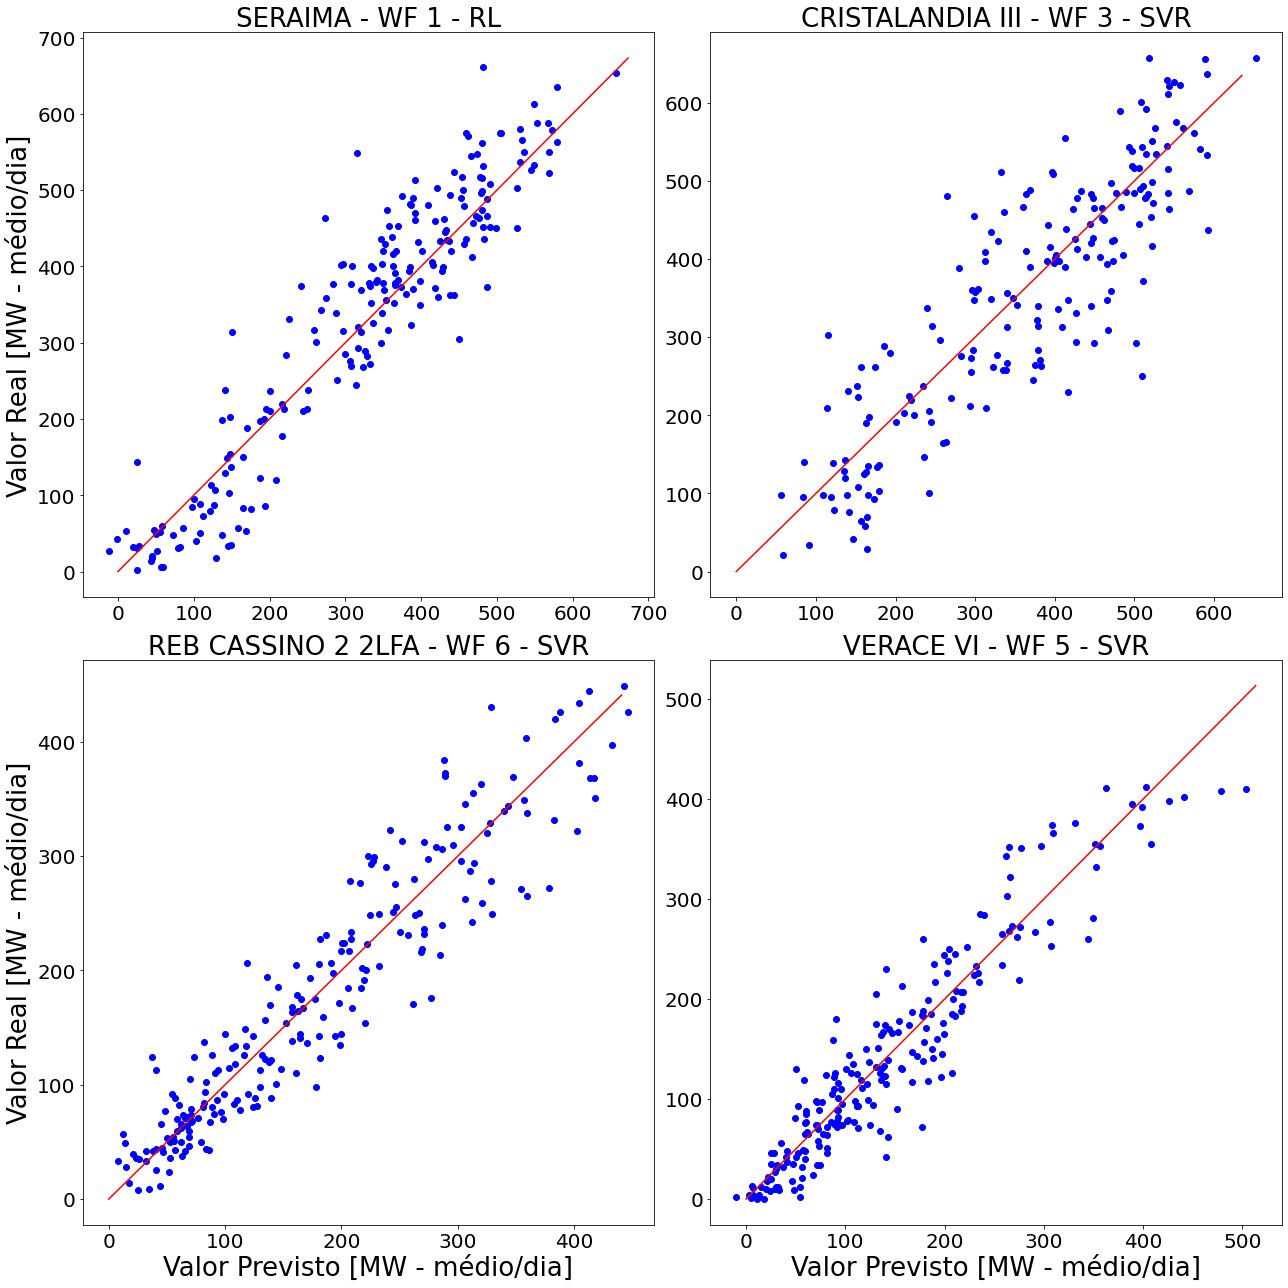

In [13]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(18,18))

L = [[],[],[],[],[],[],[],[]]
x = 1000

inicio = 4
    
linhas = 2
colunas = 2

Limite_Superior = []
Limite_Inferior = []

for i in range(linhas*colunas):
    Limite_Superior.append(max(max(y_pred[i+inicio]),max(y_real[i+inicio])))
    Limite_Inferior.append(min(min(y_pred[i+inicio]),min(y_real[i+inicio])))

    for j in range(0,x):
        aux = (Limite_Superior[i]-Limite_Inferior[i])/x
        L[i].append(aux*(j))

    if Limite_Inferior[i] > 0:
        Limite_Inferior[i] = 0

aux = 0
for i in range(linhas):
    for j in range(colunas):
        axs[i,j].plot(y_pred[aux+inicio], y_real[aux+inicio], 'bo',label="Validação")
        axs[i,j].plot(L[aux], L[aux], 'r')
        aux += 1
aux = 0    
for ax in axs.flat:
    if aux%2 == 0:
        ax.set_ylabel("Valor Real [MW - médio/dia]",fontsize=26)
    ax.set_title(Nome_parque[aux+inicio]+" - WF "+WF_parque[aux+inicio]+" - "+Algoritmo_parque[aux+inicio],fontsize=26)
    if aux == 2 or aux ==3:
        ax.set_xlabel("Valor Previsto [MW - médio/dia]",fontsize=26)
    
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    #ax.set(xlim=(-0.2,5.2))
    #ax.set_title("PE-"+str(cont+1),fontsize=36)
    #if cont%colunas == 0:
    #    ax.set_ylabel("R2",fontsize=36)
    aux += 1
    
fig.tight_layout()

In [74]:
len(y_real[0])+1

193

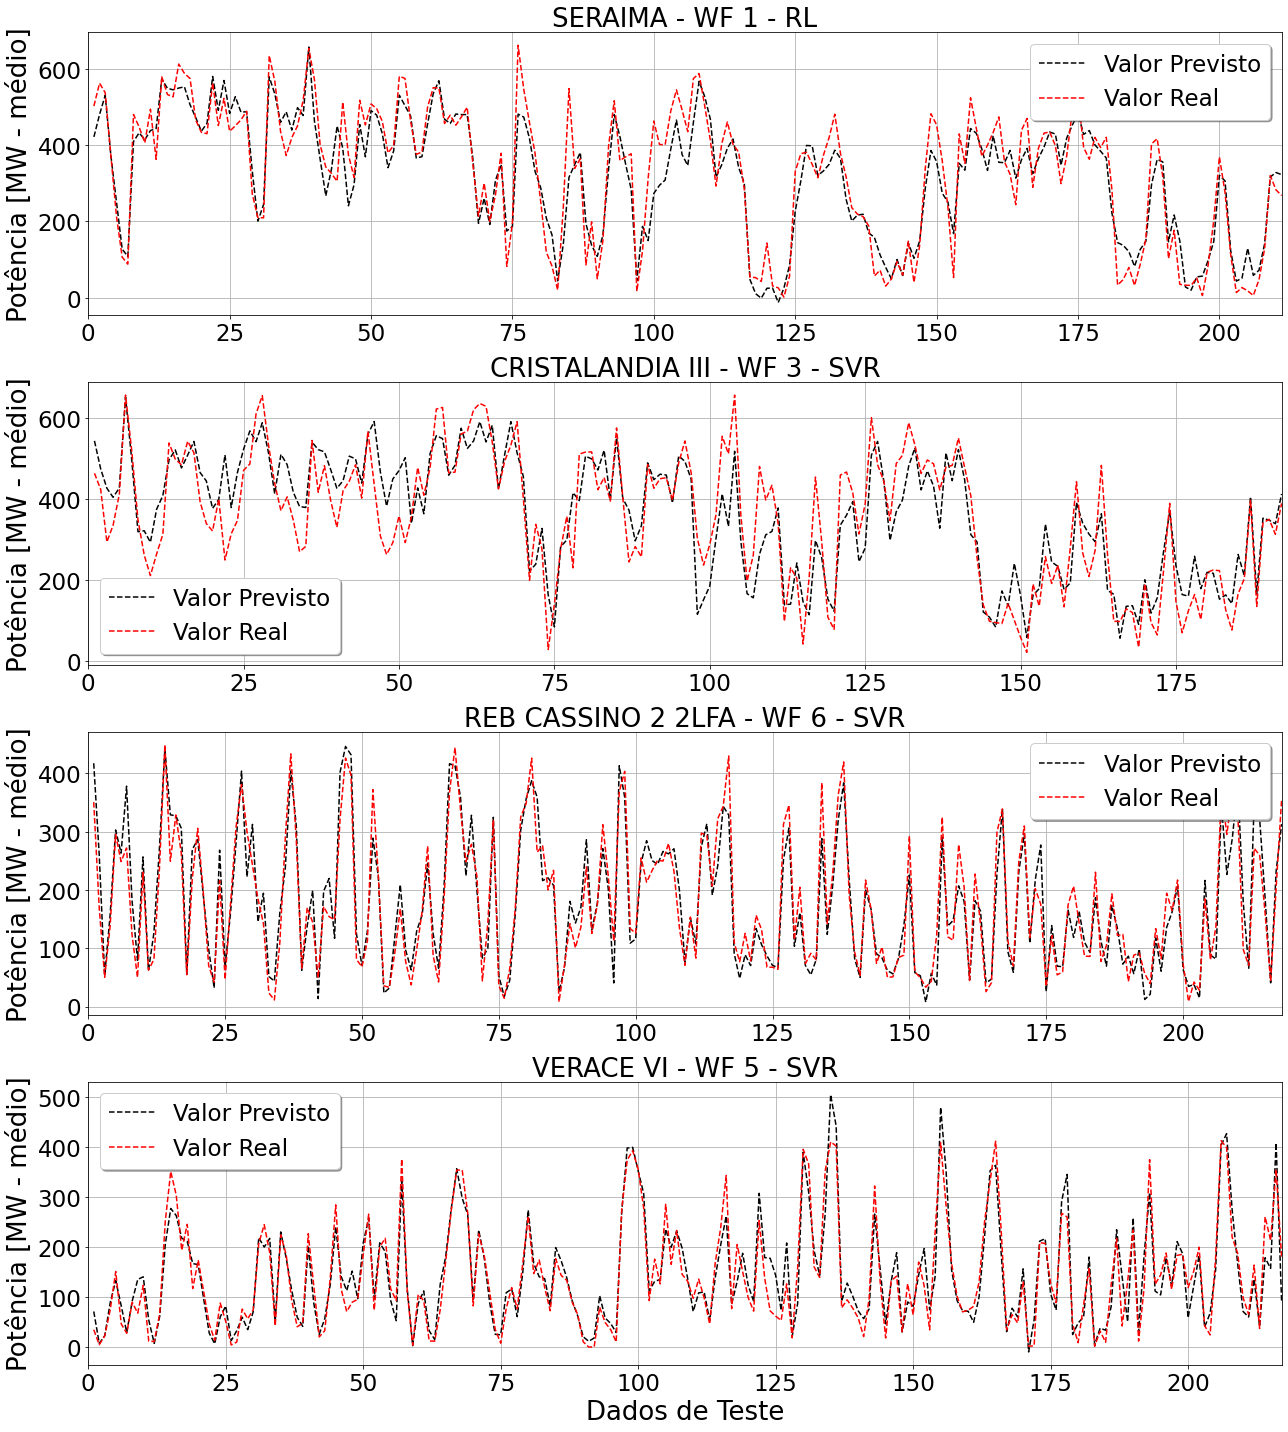

In [15]:
L=[[],[],[],[],[],[],[],[]]
k=[0,0,0,0,0,0,0,0]


linhas = 4
colunas = 1

inicio = 4

fig, axs = plt.subplots(ncols=colunas,nrows=linhas,figsize=(18,20))

for aux in range(len(L)-inicio):
    for i in range(1,len(y_real[aux+inicio])+1):
        L[aux+inicio].append(i)

aux = 0
for i in range(linhas): 
    corte1 = k[aux+inicio]
    corte2 = len(L[aux+inicio])
    
    axs[i].plot(L[aux+inicio][corte1:corte2],y_pred[aux+inicio][corte1:corte2], 'k--', label="Valor Previsto")
    axs[i].plot(L[aux+inicio][corte1:corte2],y_real[aux+inicio][corte1:corte2], 'r--', label="Valor Real")
    aux += 1
        
aux = 0    
for ax in axs.flat:
    corte1 = k[aux+inicio]
    corte2 = len(L[aux+inicio])
    
    ax.set_ylabel("Potência [MW - médio]",fontsize=26)
    
    ax.set_title(Nome_parque[aux+inicio]+" - WF "+WF_parque[aux+inicio]+" - "+Algoritmo_parque[aux+inicio],fontsize=26)
    if aux == (linhas-1):
        ax.set_xlabel("Dados de Teste",fontsize=26)
    ax.grid()
    ax.set_xlim(corte1, corte2)
    ax.tick_params(axis='both', which='major', labelsize=23)
    
    #ax.set(ylim=(np.arange(-100, max(max(y_pred[aux+inicio]),max(y_real[aux+inicio]))*1.3)))
    aux += 1
           
fig.tight_layout()

for i in range(linhas):
    legend = axs[i].legend(loc='best', shadow=True, fontsize=23)
           

In [16]:
# Lista de listas para armazenar os valores de cada modelo
y_pred = []
y_real = []
for i in range(0,len(Modelos)):
  y_pred.append([])
  y_real.append([])

for i in range(0,len(Modelos)):
  if '_SVR_' in Modelos[i]:
    dia = '09-05'
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'+dia+'-SVR/'
  elif '-RNA-' in Modelos[i]:
    dia = '09-07'
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'+dia+'/'
  elif '-RL' in Modelos[i]:
    dia = '09-05'
    path = 'C:/Users/Gabriel/Downloads/UFRJ/IC/4- Resultados/Resultados/'+dia+'-RL/'

  arquivo_excel = load_workbook(path+Modelos[i]+'.xlsx')

  # Lembrando que os arquivos de resultados possuem duas planilhas 'Sheet' e 'Resultados'
  # queremos garantir que estamos pegando os valores da planilha certa
  for s in range(len(arquivo_excel.sheetnames)):
    if arquivo_excel.sheetnames[s] == 'Resultados':
        break
  # "Ativando" a planilha 'Resultados' - dizendo que é ela que vamos usar
  arquivo_excel.active = s
  sheet = arquivo_excel.active

  for coluna in sheet.iter_cols(min_col = 2):
    if coluna[2].value != None:
      y_pred[i].append(coluna[2].value)
    if coluna[3].value != None:
        y_real[i].append(coluna[3].value)

In [17]:
len(y_real[6])

1315

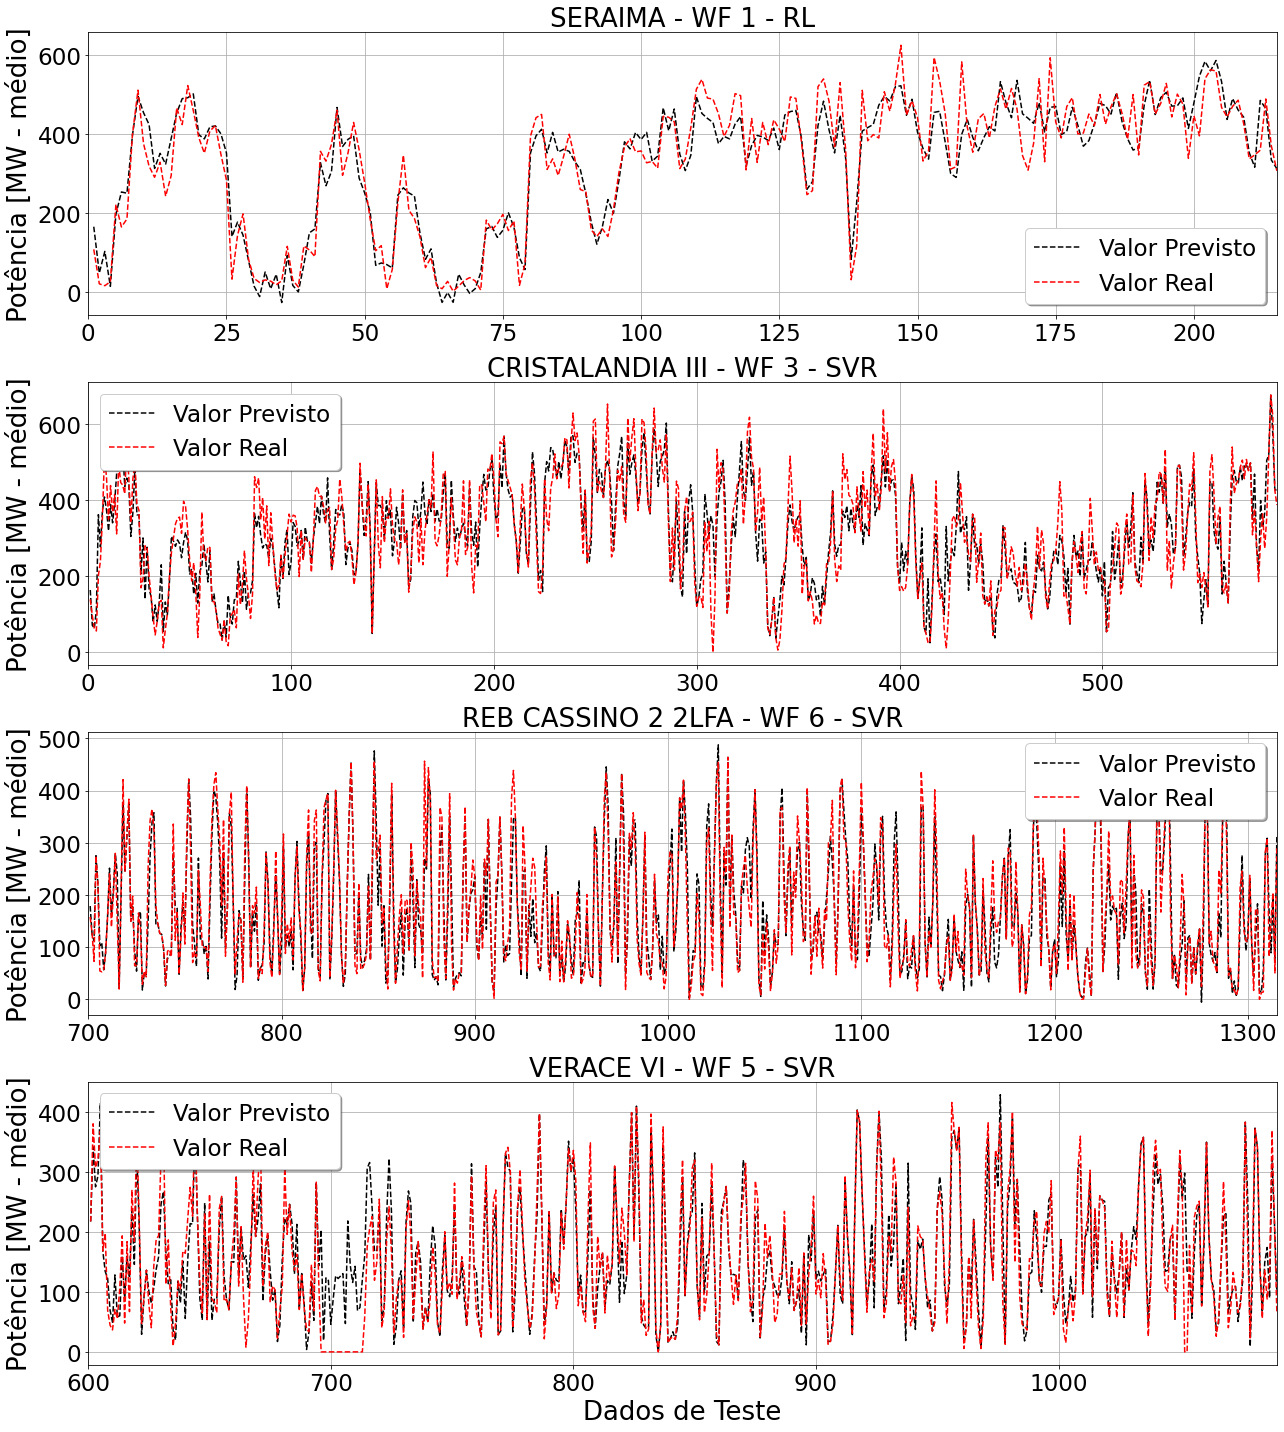

In [22]:
L=[[],[],[],[],[],[],[],[]]
k=[0,0,0,0,0,0,700,600]


linhas = 4
colunas = 1

inicio = 4

fig, axs = plt.subplots(ncols=colunas,nrows=linhas,figsize=(18,20))

for aux in range(len(L)-inicio):
    for i in range(1,len(y_real[aux+inicio])+1):
        L[aux+inicio].append(i)

aux = 0
for i in range(linhas): 
    corte1 = k[aux+inicio]
    corte2 = len(L[aux+inicio])
    
    axs[i].plot(L[aux+inicio][corte1:corte2],y_pred[aux+inicio][corte1:corte2], 'k--', label="Valor Previsto")
    axs[i].plot(L[aux+inicio][corte1:corte2],y_real[aux+inicio][corte1:corte2], 'r--', label="Valor Real")
    aux += 1
        
aux = 0    
for ax in axs.flat:
    corte1 = k[aux+inicio]
    corte2 = len(L[aux+inicio])
    
    ax.set_ylabel("Potência [MW - médio]",fontsize=26)
    
    ax.set_title(Nome_parque[aux+inicio]+" - WF "+WF_parque[aux+inicio]+" - "+Algoritmo_parque[aux+inicio],fontsize=26)
    if aux == (linhas-1):
        ax.set_xlabel("Dados de Teste",fontsize=26)
    ax.grid()
    ax.set_xlim(corte1, corte2)
    ax.tick_params(axis='both', which='major', labelsize=23)
    
    #ax.set(ylim=(np.arange(-100, max(max(y_pred[aux+inicio]),max(y_real[aux+inicio]))*1.3)))
    aux += 1
           
fig.tight_layout()

for i in range(linhas):
    legend = axs[i].legend(loc='best', shadow=True, fontsize=23)
           

# 8) Feature Selection

# Comparando....






*   **0**: Pressão
*   **1**: Pressão_Std
*   **2**: Temperatura
*   **3**: Temperatura_Std
*   **4**: Umidade
*   **5**: Umidade_Std
*   **6**: Direção do vento
*   **7**: Direção do vento_Std
*   **8**: Rajada
*   **9**: Rajada_Std
*   **10**: Velocidade do vento
*   **11**: Velocidade do vento_Std
*   **12**: C1
*   **13**: C2
*   **14**: C3
*   **15**: C4
*   **16**: C5
*   **17**: C6



## 8.1) K Best

In [146]:
Dados_Completos_Normalizados['AMETISTA']

,Pressão Atm,std_press,"Temp, bs",std_temp,Umidade,std_umi,Vent Dir,std_ven_dir,Rajada,std_ven_raj,Vento,std_vent,C1,C2,C3,C4,C5,C6,Pot
0,0.262758,0.727781,0.647453,0.604549,0.402353,0.412222,0.244926,0.395570,0.235347,0.347848,0.164232,0.326369,0.0,0.0,0.0,0.0,0.0,0.0,53.591434
1,0.176086,0.452594,0.561388,0.446770,0.518655,0.416586,0.549163,0.835619,0.169716,0.486582,0.111111,0.397221,0.0,0.0,0.0,0.0,0.0,0.0,20.075307
2,0.209395,0.314036,0.421190,0.434216,0.677276,0.384115,0.182529,0.641523,0.129143,0.630408,0.080730,0.515324,0.0,0.0,0.0,0.0,0.0,0.0,14.788201
3,0.330003,0.559892,0.406212,0.484661,0.739949,0.616276,0.669538,0.737670,0.112873,0.246029,0.070616,0.209561,0.0,0.0,0.0,0.0,0.0,0.0,9.601330
4,0.394903,0.565744,0.500315,0.615666,0.507315,0.595739,0.109736,0.738166,0.273304,0.447157,0.185172,0.423876,0.0,0.0,0.0,0.0,0.0,0.0,133.216825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,0.282312,0.569224,0.525350,0.655044,0.465882,0.609506,0.166186,0.117110,0.332144,0.381619,0.243028,0.350950,0.0,0.0,0.0,0.0,0.0,0.0,135.381311
1547,0.341965,0.573250,0.500248,0.394188,0.520588,0.428517,0.142196,0.086109,0.500476,0.621720,0.388225,0.688779,0.0,0.0,0.0,0.0,0.0,0.0,405.096372
1548,0.333410,0.593590,0.470497,0.613002,0.459412,0.535894,0.131943,0.050657,0.462191,0.488541,0.351040,0.515171,0.0,0.0,0.0,0.0,0.0,0.0,364.465603
1549,0.255210,0.568431,0.499022,0.648177,0.436113,0.591537,0.180595,0.116064,0.350983,0.343722,0.245684,0.389017,0.0,0.0,0.0,0.0,0.0,0.0,147.264954


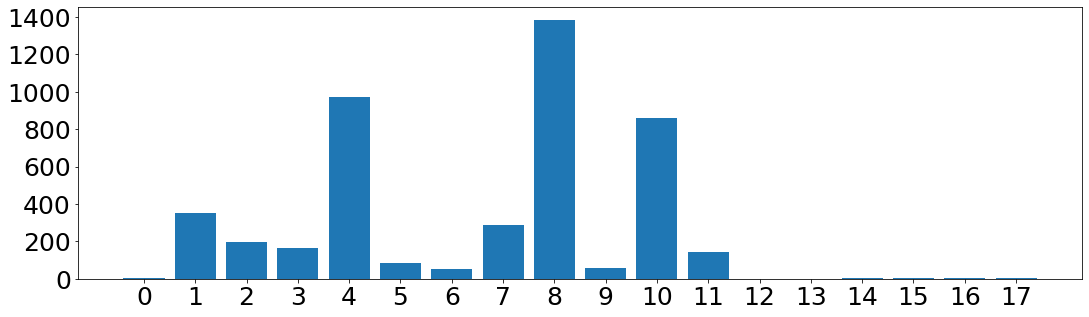

In [129]:
aux = []

def select_features_KBest(X_inicial, y_inicial):
    fs = SelectKBest(score_func = f_regression, k='all')
    fs.fit(X_inicial, y_inicial)
    X_fs = fs.transform(X_inicial)
    return X_fs, fs

for Parque in ['ALEGRIA_I']:
    for Num_modelo in [3]:
        estacao = Combinacao[parque]
        if "A" in estacao:
            Colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi',
                       'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent', 
                       'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
        else:
            Colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi',
                       'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent',
                       'C1', 'C2', 'C3', 'C4', 'C5']
        
        col = Colunas
        col_y = 'Pot'
        
        dados = Dados_Completos_Normalizados[Parque]
    
        for item in col:
            aux.append(item)
        
        X, fs = select_features_KBest(dados[col], dados[col_y])
        fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(18,5))
        ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
        plt.xticks(np.arange(0, len(fs.scores_), step=1), fontsize=25)
        plt.yticks(fontsize=25)
        #plt.title('KBest', fontsize=25)
        plt.show()

In [68]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i])+'\t\t'+aux[i])

Feature 0: 432.938648		Pressão Atm
Feature 1: 18.350270		std_press
Feature 2: 5.435667		Temp, bs
Feature 3: 4.054329		std_temp
Feature 4: 395.864207		Umidade
Feature 5: 1.945992		std_umi
Feature 6: 1540.268962		Vent Dir
Feature 7: 923.746994		std_ven_dir
Feature 8: 3773.524480		Rajada
Feature 9: 9.377139		std_ven_raj
Feature 10: 3354.892037		Vento
Feature 11: 227.700525		std_vent
Feature 12: 21.635089		C1
Feature 13: 21.635089		C2
Feature 14: 21.635089		C3
Feature 15: 21.635089		C4
Feature 16: 21.635089		C5
Feature 17: 21.635089		C6


## 8.2) Decision Tree

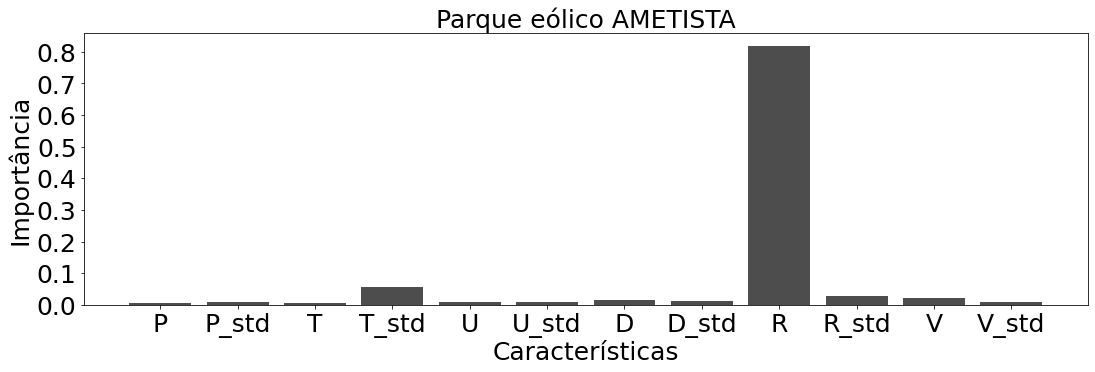

In [65]:
aux = []

# feature selection
def select_features_Forest(X_inicial, y_inicial):
    fs = DecisionTreeRegressor()
    fs.fit(X_inicial, y_inicial)
    return fs

for Parque in ['ALEGRIA_I']:
    for Num_modelo in [3]:
        estacao = Combinacao[parque]
        if "A" in estacao:
            Colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi',
                       'Vent Dir', 'std_ven_dir', 'Rajada', 'std_ven_raj', 'Vento', 'std_vent']
        else:
            Colunas = ['Pressão Atm', 'std_press', 'Temp, bs', 'std_temp', 'Umidade', 'std_umi',
                       'Vent Dir', 'std_ven_dir', 'Vento', 'std_vent']
        
        col = Colunas
        col_y = 'Pot'
        
        dados = Dados_Completos_Normalizados[Parque]
    
        for item in col:
            aux.append(item)
        
        fs = select_features_Forest(dados[col], dados[col_y])
        fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(18,5))
        ax.bar([i for i in range(len(fs.feature_importances_))], fs.feature_importances_, color = ['#4D4D4D'])
        #ax.set_color("r")
        plt.xticks(np.arange(0, len(fs.feature_importances_), step=1), fontsize=25)
        plt.yticks(fontsize=25)
        plt.title('Parque eólico AMETISTA', fontsize=25)
        
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels[0] = 'P'
        labels[1] = 'P_std'
        labels[2] = 'T'
        labels[3] = 'T_std'
        labels[4] = 'U'
        labels[5] = 'U_std'
        labels[6] = 'D'
        labels[7] = 'D_std'
        labels[8] = 'R'
        labels[9] = 'R_std'
        labels[10] = 'V'
        labels[11] = 'V_std'
        #labels[12] = 'C1'
        #labels[13] = 'C2'
        #labels[14] = 'C3'
        #labels[15] = 'C4'
        #labels[16] = 'C5'
        #labels[17] = 'C6'

        ax.set_xticklabels(labels)
        ax.set_ylabel("Importância",fontsize=25)
        ax.set_xlabel("Características",fontsize=25)

        plt.show()



In [71]:
for i in range(len(fs.feature_importances_)):
    print('Feature %d: %f' % (i, fs.feature_importances_[i]*100)+'\t\t'+aux[i])

Feature 0: 2.173913		Pressão Atm
Feature 1: 1.761246		std_press
Feature 2: 1.383948		Temp, bs
Feature 3: 1.588555		std_temp
Feature 4: 1.851102		Umidade
Feature 5: 0.847893		std_umi
Feature 6: 4.532287		Vent Dir
Feature 7: 2.077231		std_ven_dir
Feature 8: 14.344421		Rajada
Feature 9: 1.073416		std_ven_raj
Feature 10: 65.321099		Vento
Feature 11: 2.790432		std_vent
Feature 12: 0.107174		C1
Feature 13: 0.128511		C2
Feature 14: 0.007513		C3
Feature 15: 0.011259		C4
Feature 16: 0.000000		C5
Feature 17: 0.000000		C6


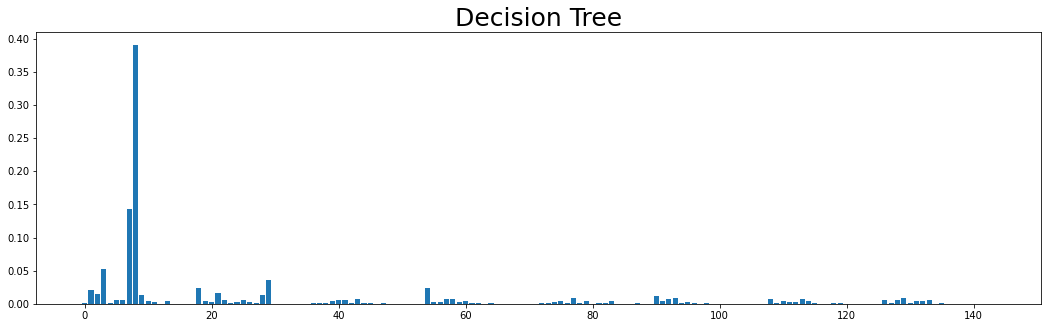

In [116]:
Dados = {'A':dados_normal_A_t7,
         'S':dados_normal_S_t7,
         'R':dados_normal_R_t7,
         'E':dados_normal_E_t7}

Parques = ['E']

M = [6]

delta = 7

aux = []

for Parque in Parques:
    for Num_modelo in M:
        colunas = Modelos[Num_modelo]
        col = colunas
        col_y = 'Pot'
        dados = Dados[Parque]
        
        for item in col:
            aux.append(item)
        for j in range(1,delta+1):
            for item in colunas:
                aux.append(item+' (t-'+str(j)+')')
        
        fs = select_features(dados[aux], dados[col_y])
        fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(18,5))
        plt.title('Decision Tree', fontsize=25)
        ax.bar([i for i in range(len(fs.feature_importances_))], fs.feature_importances_)
        
        plt.show()


In [106]:
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i])+'\t\t'+aux[i])
for i in range(len(fs.feature_importances_)):
    print('Feature %d: %f' % (i, fs.feature_importances_[i]*100)+'\t\t'+aux[i])

Feature 0: 0.057441		Pressao
Feature 1: 2.143323		Press_Std
Feature 2: 1.862945		Temp
Feature 3: 5.221016		Temp_Std
Feature 4: 0.064362		Umidade
Feature 5: 0.327570		Umidade_Std
Feature 6: 0.560471		VenDir
Feature 7: 14.196062		VenDir_Std
Feature 8: 39.050461		Rajada
Feature 9: 1.348778		Rajada_Std
Feature 10: 0.352424		Ven
Feature 11: 0.277604		Ven_Std
Feature 12: 0.000000		C1
Feature 13: 0.408489		C2
Feature 14: 0.000000		C3
Feature 15: 0.000000		C4
Feature 16: 0.011366		C5
Feature 17: 0.002662		C6
Feature 18: 2.469551		Pressao (t-1)
Feature 19: 0.602573		Press_Std (t-1)
Feature 20: 0.299979		Temp (t-1)
Feature 21: 1.723702		Temp_Std (t-1)
Feature 22: 0.548115		Umidade (t-1)
Feature 23: 0.196604		Umidade_Std (t-1)
Feature 24: 0.262028		VenDir (t-1)
Feature 25: 0.495399		VenDir_Std (t-1)
Feature 26: 0.224028		Rajada (t-1)
Feature 27: 0.123339		Rajada_Std (t-1)
Feature 28: 1.280915		Ven (t-1)
Feature 29: 3.576985		Ven_Std (t-1)
Feature 30: 0.000000		C1 (t-1)
Feature 31: 0.000269		C2 (t